In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import ast

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
player_data = pd.read_csv('OverallPredictor.csv')

In [6]:
player_data.head()

,Acceleration,Aggression,Agility,Balance,Ball Control,Best Position,Composure,Crossing,Curve,Dribbling,FK Accuracy,Finishing,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Heading Accuracy,Interceptions,Jumping,Long Passing,Long Shots,Marking,Overall,Penalties,Positioning,Positions,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
0,89,73,88,82,87,RW,81,81,57,90,51,77,15,10,15,11,10,47,23,57,65,68,22,82,66,78,"['CF', 'LM']",77,75,78,28,92,76,29,75,77,61
1,68,71,41,74,68,CB,61,35,31,36,35,27,6,8,12,7,13,78,75,75,31,28,77,75,42,35,['CB'],72,62,45,71,63,79,78,77,40,35
2,81,52,79,83,75,LM,72,67,69,78,67,76,14,8,14,10,7,62,34,62,61,73,49,75,68,78,['RM'],74,67,66,36,78,77,40,63,71,53
3,86,65,83,77,81,RM,77,80,77,81,69,69,8,13,11,8,8,49,71,56,72,70,72,75,67,76,"['CAM', 'RB', 'RM']",76,77,69,69,83,73,70,66,75,72
4,78,78,78,71,73,CB,76,71,65,63,55,36,13,8,10,5,8,75,77,86,73,32,74,78,45,64,"['CB', 'LB']",78,70,61,78,88,77,80,77,60,37


In [7]:
unq_positions = player_data['Best Position'].unique()
unq_positions.sort()
print (unq_positions)

['CAM' 'CB' 'CDM' 'CF' 'CM' 'GK' 'LB' 'LM' 'LW' 'LWB' 'RB' 'RM' 'RW' 'RWB'
 'ST']


In [8]:
count = 0
map_dict = {}
for pos in unq_positions:
    map_dict[pos] = count
    count += 1

In [9]:
data_arr = []
for pos in unq_positions:
    data_arr.append(np.array([], dtype='float32'))

In [10]:
for i in range(player_data.shape[0]):
    pos = player_data.iloc[i,:]['Best Position']
    data_arr[map_dict[pos]] = np.append(data_arr[map_dict[pos]], player_data.iloc[i,:], axis=0)

In [11]:
len(player_data.columns)

37

In [13]:
for i in range(len(data_arr)):
    data_arr[i] = np.array(data_arr[i]).reshape(len(data_arr[i])//37,37)

In [14]:
for i in range(len(data_arr)):
    data_arr[i] = pd.DataFrame(data_arr[i], columns=player_data.columns)

In [15]:
y_arr = []

In [16]:
for i in range(len(data_arr)):
    y_arr.append(np.array(data_arr[i]['Overall']))
    data_arr[i] = data_arr[i].drop(columns=['Overall', 'Best Position', 'Positions'])

In [17]:
for i in range(len(data_arr)):
    data_arr[i] = np.array(pd.DataFrame(data_arr[i].values, dtype='float32'))

In [18]:
data_arr[0]

array([[79., 60., 80., ..., 54., 77., 71.],
       [79., 70., 78., ..., 67., 88., 86.],
       [67., 46., 89., ..., 41., 67., 59.],
       ...,
       [62., 51., 61., ..., 34., 59., 56.],
       [65., 59., 66., ..., 65., 66., 68.],
       [60., 45., 60., ..., 68., 62., 51.]], dtype=float32)

In [19]:
data_arr = np.array(data_arr)
y_arr = np.array(y_arr)

In [53]:
models = []
for i in range(len(data_arr)):
    models.append(tf.keras.Sequential())

In [54]:
for model in models:
    model.add(layers.Dense(units=1, activation=None, use_bias=False, 
                           kernel_regularizer=tf.keras.regularizers.l1(0.5),
                           kernel_constraint=tf.keras.constraints.MinMaxNorm(axis=1)))

In [55]:
learning_rate=0.001

In [56]:
for model in models:
    model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate),
             loss='mse',
             metrics=['mse', 'mae', 'mape'])

In [57]:
histories = []
for index, model in enumerate(models):
    histories.append(model.fit(data_arr[index], y_arr[index], epochs=5000, 
                               callbacks=[tf.keras.callbacks.BaseLogger(), tf.keras.callbacks.History(),
                                         tf.keras.callbacks.EarlyStopping(monitor='loss',patience=20,
                                                                         restore_best_weights=True)]))

Epoch 1/5000
1314/1314 [==============================] - 0s 173us/sample - loss: 1250.8372 - mean_squared_error: 1247.4016 - mean_absolute_error: 28.9562 - mean_absolute_percentage_error: 43.3734
Epoch 2/5000
1314/1314 [==============================] - 0s 39us/sample - loss: 172.8020 - mean_squared_error: 169.3383 - mean_absolute_error: 10.4575 - mean_absolute_percentage_error: 16.0663
Epoch 3/5000
1314/1314 [==============================] - 0s 93us/sample - loss: 167.8076 - mean_squared_error: 164.3549 - mean_absolute_error: 10.2676 - mean_absolute_percentage_error: 15.7344
Epoch 4/5000
1314/1314 [==============================] - 0s 42us/sample - loss: 163.8122 - mean_squared_error: 160.3729 - mean_absolute_error: 10.1042 - mean_absolute_percentage_error: 15.4489
Epoch 5/5000
1314/1314 [==============================] - 0s 43us/sample - loss: 159.3080 - mean_squared_error: 155.8783 - mean_absolute_error: 9.9764 - mean_absolute_percentage_error: 15.2698
Epoch 6/5000
1314/1314 [====

1314/1314 [==============================] - 0s 51us/sample - loss: 40.4845 - mean_squared_error: 37.6780 - mean_absolute_error: 4.8463 - mean_absolute_percentage_error: 7.4652
Epoch 44/5000
1314/1314 [==============================] - 0s 48us/sample - loss: 39.4377 - mean_squared_error: 36.6487 - mean_absolute_error: 4.7983 - mean_absolute_percentage_error: 7.3936
Epoch 45/5000
1314/1314 [==============================] - 0s 74us/sample - loss: 38.9037 - mean_squared_error: 36.1329 - mean_absolute_error: 4.7608 - mean_absolute_percentage_error: 7.3265
Epoch 46/5000
1314/1314 [==============================] - 0s 43us/sample - loss: 37.0285 - mean_squared_error: 34.2740 - mean_absolute_error: 4.6271 - mean_absolute_percentage_error: 7.1375
Epoch 47/5000
1314/1314 [==============================] - 0s 36us/sample - loss: 35.8435 - mean_squared_error: 33.1053 - mean_absolute_error: 4.5361 - mean_absolute_percentage_error: 6.9928
Epoch 48/5000
1314/1314 [==============================] - 

Epoch 86/5000
1314/1314 [==============================] - 0s 50us/sample - loss: 14.8919 - mean_squared_error: 12.8480 - mean_absolute_error: 2.8267 - mean_absolute_percentage_error: 4.4123
Epoch 87/5000
1314/1314 [==============================] - 0s 51us/sample - loss: 14.6608 - mean_squared_error: 12.6338 - mean_absolute_error: 2.7939 - mean_absolute_percentage_error: 4.3609
Epoch 88/5000
1314/1314 [==============================] - 0s 65us/sample - loss: 14.5011 - mean_squared_error: 12.4915 - mean_absolute_error: 2.7648 - mean_absolute_percentage_error: 4.3161
Epoch 89/5000
1314/1314 [==============================] - 0s 78us/sample - loss: 14.5600 - mean_squared_error: 12.5689 - mean_absolute_error: 2.8052 - mean_absolute_percentage_error: 4.3774
Epoch 90/5000
1314/1314 [==============================] - 0s 54us/sample - loss: 13.9889 - mean_squared_error: 12.0145 - mean_absolute_error: 2.7175 - mean_absolute_percentage_error: 4.2424
Epoch 91/5000
1314/1314 [====================

1314/1314 [==============================] - 0s 49us/sample - loss: 7.0429 - mean_squared_error: 5.7383 - mean_absolute_error: 1.8687 - mean_absolute_percentage_error: 2.9304
Epoch 129/5000
1314/1314 [==============================] - 0s 46us/sample - loss: 6.7622 - mean_squared_error: 5.4743 - mean_absolute_error: 1.8197 - mean_absolute_percentage_error: 2.8575
Epoch 130/5000
1314/1314 [==============================] - 0s 106us/sample - loss: 6.6013 - mean_squared_error: 5.3288 - mean_absolute_error: 1.8065 - mean_absolute_percentage_error: 2.8343
Epoch 131/5000
1314/1314 [==============================] - 0s 68us/sample - loss: 6.5698 - mean_squared_error: 5.3139 - mean_absolute_error: 1.7991 - mean_absolute_percentage_error: 2.8273
Epoch 132/5000
1314/1314 [==============================] - 0s 43us/sample - loss: 6.2793 - mean_squared_error: 5.0388 - mean_absolute_error: 1.7489 - mean_absolute_percentage_error: 2.7440
Epoch 133/5000
1314/1314 [==============================] - 0s 4

1314/1314 [==============================] - 0s 55us/sample - loss: 2.8720 - mean_squared_error: 2.1161 - mean_absolute_error: 1.1318 - mean_absolute_percentage_error: 1.7782
Epoch 172/5000
1314/1314 [==============================] - 0s 53us/sample - loss: 2.8276 - mean_squared_error: 2.0795 - mean_absolute_error: 1.1167 - mean_absolute_percentage_error: 1.7581
Epoch 173/5000
1314/1314 [==============================] - 0s 41us/sample - loss: 2.7289 - mean_squared_error: 1.9867 - mean_absolute_error: 1.0990 - mean_absolute_percentage_error: 1.7275
Epoch 174/5000
1314/1314 [==============================] - 0s 39us/sample - loss: 2.7255 - mean_squared_error: 1.9901 - mean_absolute_error: 1.0982 - mean_absolute_percentage_error: 1.7254
Epoch 175/5000
1314/1314 [==============================] - 0s 43us/sample - loss: 2.7298 - mean_squared_error: 2.0023 - mean_absolute_error: 1.1056 - mean_absolute_percentage_error: 1.7356
Epoch 176/5000
1314/1314 [==============================] - 0s 43

1314/1314 [==============================] - 0s 49us/sample - loss: 1.5688 - mean_squared_error: 1.0151 - mean_absolute_error: 0.7782 - mean_absolute_percentage_error: 1.2255
Epoch 215/5000
1314/1314 [==============================] - 0s 48us/sample - loss: 1.6360 - mean_squared_error: 1.0860 - mean_absolute_error: 0.8102 - mean_absolute_percentage_error: 1.2733
Epoch 216/5000
1314/1314 [==============================] - 0s 44us/sample - loss: 1.6004 - mean_squared_error: 1.0539 - mean_absolute_error: 0.8031 - mean_absolute_percentage_error: 1.2588
Epoch 217/5000
1314/1314 [==============================] - 0s 43us/sample - loss: 1.5327 - mean_squared_error: 0.9893 - mean_absolute_error: 0.7706 - mean_absolute_percentage_error: 1.2145
Epoch 218/5000
1314/1314 [==============================] - 0s 36us/sample - loss: 1.5382 - mean_squared_error: 0.9964 - mean_absolute_error: 0.7712 - mean_absolute_percentage_error: 1.2139
Epoch 219/5000
1314/1314 [==============================] - 0s 47

1314/1314 [==============================] - 0s 49us/sample - loss: 1.3071 - mean_squared_error: 0.7949 - mean_absolute_error: 0.6904 - mean_absolute_percentage_error: 1.0838
Epoch 257/5000
1314/1314 [==============================] - 0s 49us/sample - loss: 1.3710 - mean_squared_error: 0.8588 - mean_absolute_error: 0.7063 - mean_absolute_percentage_error: 1.1089
Epoch 258/5000
1314/1314 [==============================] - 0s 46us/sample - loss: 1.3471 - mean_squared_error: 0.8345 - mean_absolute_error: 0.7068 - mean_absolute_percentage_error: 1.1089
Epoch 259/5000
1314/1314 [==============================] - 0s 49us/sample - loss: 1.2742 - mean_squared_error: 0.7620 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 1.0539
Epoch 260/5000
1314/1314 [==============================] - 0s 55us/sample - loss: 1.3623 - mean_squared_error: 0.8503 - mean_absolute_error: 0.7158 - mean_absolute_percentage_error: 1.1218
Epoch 261/5000
1314/1314 [==============================] - 0s 47

2425/2425 [==============================] - 0s 56us/sample - loss: 24.2074 - mean_squared_error: 21.7613 - mean_absolute_error: 3.6971 - mean_absolute_percentage_error: 5.7587
Epoch 21/5000
2425/2425 [==============================] - 0s 59us/sample - loss: 22.3726 - mean_squared_error: 20.0018 - mean_absolute_error: 3.5646 - mean_absolute_percentage_error: 5.5486
Epoch 22/5000
2425/2425 [==============================] - 0s 57us/sample - loss: 21.0082 - mean_squared_error: 18.7093 - mean_absolute_error: 3.4333 - mean_absolute_percentage_error: 5.3467
Epoch 23/5000
2425/2425 [==============================] - 0s 56us/sample - loss: 19.6611 - mean_squared_error: 17.4299 - mean_absolute_error: 3.3204 - mean_absolute_percentage_error: 5.1773
Epoch 24/5000
2425/2425 [==============================] - 0s 123us/sample - loss: 18.1246 - mean_squared_error: 15.9611 - mean_absolute_error: 3.1837 - mean_absolute_percentage_error: 4.9651
Epoch 25/5000
2425/2425 [==============================] -

2425/2425 [==============================] - 0s 54us/sample - loss: 1.9059 - mean_squared_error: 1.2338 - mean_absolute_error: 0.8384 - mean_absolute_percentage_error: 1.3188
Epoch 63/5000
2425/2425 [==============================] - 0s 62us/sample - loss: 1.8542 - mean_squared_error: 1.1972 - mean_absolute_error: 0.8189 - mean_absolute_percentage_error: 1.2881
Epoch 64/5000
2425/2425 [==============================] - 0s 70us/sample - loss: 1.8094 - mean_squared_error: 1.1663 - mean_absolute_error: 0.8046 - mean_absolute_percentage_error: 1.2660
Epoch 65/5000
2425/2425 [==============================] - 0s 65us/sample - loss: 1.7382 - mean_squared_error: 1.1065 - mean_absolute_error: 0.7875 - mean_absolute_percentage_error: 1.2372
Epoch 66/5000
2425/2425 [==============================] - 0s 39us/sample - loss: 1.6756 - mean_squared_error: 1.0572 - mean_absolute_error: 0.7600 - mean_absolute_percentage_error: 1.1952
Epoch 67/5000
2425/2425 [==============================] - 0s 35us/sa

2425/2425 [==============================] - 0s 52us/sample - loss: 1.2574 - mean_squared_error: 0.7345 - mean_absolute_error: 0.5970 - mean_absolute_percentage_error: 0.9336
Epoch 105/5000
2425/2425 [==============================] - 0s 70us/sample - loss: 1.2072 - mean_squared_error: 0.6852 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 0.8910
Epoch 106/5000
2425/2425 [==============================] - 0s 55us/sample - loss: 1.2303 - mean_squared_error: 0.7078 - mean_absolute_error: 0.5807 - mean_absolute_percentage_error: 0.9074
Epoch 107/5000
2425/2425 [==============================] - 0s 56us/sample - loss: 1.1884 - mean_squared_error: 0.6672 - mean_absolute_error: 0.5589 - mean_absolute_percentage_error: 0.8774
Epoch 108/5000
2425/2425 [==============================] - 0s 52us/sample - loss: 1.1700 - mean_squared_error: 0.6496 - mean_absolute_error: 0.5504 - mean_absolute_percentage_error: 0.8622
Epoch 109/5000
2425/2425 [==============================] - 0s 72

2425/2425 [==============================] - 0s 67us/sample - loss: 1.1622 - mean_squared_error: 0.6394 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 0.8496
Epoch 148/5000
2425/2425 [==============================] - 0s 53us/sample - loss: 1.1458 - mean_squared_error: 0.6235 - mean_absolute_error: 0.5371 - mean_absolute_percentage_error: 0.8425
Epoch 149/5000
2425/2425 [==============================] - 0s 53us/sample - loss: 1.1699 - mean_squared_error: 0.6467 - mean_absolute_error: 0.5489 - mean_absolute_percentage_error: 0.8596
Epoch 150/5000
2425/2425 [==============================] - 0s 49us/sample - loss: 1.1377 - mean_squared_error: 0.6152 - mean_absolute_error: 0.5285 - mean_absolute_percentage_error: 0.8268
Epoch 151/5000
2425/2425 [==============================] - 0s 51us/sample - loss: 1.1277 - mean_squared_error: 0.6043 - mean_absolute_error: 0.5180 - mean_absolute_percentage_error: 0.8115
Epoch 152/5000
2425/2425 [==============================] - 0s 49

2425/2425 [==============================] - 0s 37us/sample - loss: 1.1540 - mean_squared_error: 0.6323 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 0.8505
Epoch 190/5000
2425/2425 [==============================] - 0s 34us/sample - loss: 1.2241 - mean_squared_error: 0.6997 - mean_absolute_error: 0.5903 - mean_absolute_percentage_error: 0.9227
Epoch 191/5000
2425/2425 [==============================] - 0s 35us/sample - loss: 1.1445 - mean_squared_error: 0.6213 - mean_absolute_error: 0.5315 - mean_absolute_percentage_error: 0.8320
Epoch 192/5000
2425/2425 [==============================] - 0s 35us/sample - loss: 1.2346 - mean_squared_error: 0.7109 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 0.9156
Epoch 193/5000
2425/2425 [==============================] - 0s 37us/sample - loss: 1.1878 - mean_squared_error: 0.6654 - mean_absolute_error: 0.5561 - mean_absolute_percentage_error: 0.8703
Epoch 194/5000
2425/2425 [==============================] - 0s 33

920/920 [==============================] - 0s 46us/sample - loss: 92.0579 - mean_squared_error: 88.2726 - mean_absolute_error: 7.4964 - mean_absolute_percentage_error: 11.4140
Epoch 32/5000
920/920 [==============================] - 0s 46us/sample - loss: 90.4423 - mean_squared_error: 86.6659 - mean_absolute_error: 7.4091 - mean_absolute_percentage_error: 11.2737
Epoch 33/5000
920/920 [==============================] - 0s 37us/sample - loss: 89.5736 - mean_squared_error: 85.8065 - mean_absolute_error: 7.3594 - mean_absolute_percentage_error: 11.1903
Epoch 34/5000
920/920 [==============================] - 0s 42us/sample - loss: 88.8420 - mean_squared_error: 85.0841 - mean_absolute_error: 7.3255 - mean_absolute_percentage_error: 11.1418
Epoch 35/5000
920/920 [==============================] - 0s 46us/sample - loss: 88.6016 - mean_squared_error: 84.8530 - mean_absolute_error: 7.3191 - mean_absolute_percentage_error: 11.1207
Epoch 36/5000
920/920 [==============================] - 0s 35us

920/920 [==============================] - 0s 49us/sample - loss: 57.4787 - mean_squared_error: 54.2053 - mean_absolute_error: 5.7853 - mean_absolute_percentage_error: 8.7495
Epoch 75/5000
920/920 [==============================] - 0s 57us/sample - loss: 56.5886 - mean_squared_error: 53.3298 - mean_absolute_error: 5.7613 - mean_absolute_percentage_error: 8.7314
Epoch 76/5000
920/920 [==============================] - 0s 63us/sample - loss: 56.0135 - mean_squared_error: 52.7695 - mean_absolute_error: 5.7039 - mean_absolute_percentage_error: 8.6386
Epoch 77/5000
920/920 [==============================] - 0s 55us/sample - loss: 55.5681 - mean_squared_error: 52.3389 - mean_absolute_error: 5.7159 - mean_absolute_percentage_error: 8.6434
Epoch 78/5000
920/920 [==============================] - 0s 37us/sample - loss: 54.6259 - mean_squared_error: 51.4115 - mean_absolute_error: 5.6488 - mean_absolute_percentage_error: 8.5487
Epoch 79/5000
920/920 [==============================] - 0s 42us/samp

920/920 [==============================] - 0s 39us/sample - loss: 32.6156 - mean_squared_error: 29.9974 - mean_absolute_error: 4.3132 - mean_absolute_percentage_error: 6.5464
Epoch 117/5000
920/920 [==============================] - 0s 43us/sample - loss: 31.7952 - mean_squared_error: 29.1937 - mean_absolute_error: 4.2619 - mean_absolute_percentage_error: 6.4701
Epoch 118/5000
920/920 [==============================] - 0s 43us/sample - loss: 31.4396 - mean_squared_error: 28.8550 - mean_absolute_error: 4.2586 - mean_absolute_percentage_error: 6.4665
Epoch 119/5000
920/920 [==============================] - 0s 43us/sample - loss: 31.0785 - mean_squared_error: 28.5104 - mean_absolute_error: 4.2455 - mean_absolute_percentage_error: 6.4518
Epoch 120/5000
920/920 [==============================] - 0s 50us/sample - loss: 30.3545 - mean_squared_error: 27.8032 - mean_absolute_error: 4.1559 - mean_absolute_percentage_error: 6.3144
Epoch 121/5000
920/920 [==============================] - 0s 38us

920/920 [==============================] - 0s 53us/sample - loss: 14.9696 - mean_squared_error: 13.0605 - mean_absolute_error: 2.8574 - mean_absolute_percentage_error: 4.3682
Epoch 160/5000
920/920 [==============================] - 0s 50us/sample - loss: 14.6239 - mean_squared_error: 12.7310 - mean_absolute_error: 2.8171 - mean_absolute_percentage_error: 4.3099
Epoch 161/5000
920/920 [==============================] - 0s 43us/sample - loss: 14.2994 - mean_squared_error: 12.4225 - mean_absolute_error: 2.7993 - mean_absolute_percentage_error: 4.2772
Epoch 162/5000
920/920 [==============================] - 0s 42us/sample - loss: 14.1502 - mean_squared_error: 12.2892 - mean_absolute_error: 2.7744 - mean_absolute_percentage_error: 4.2434
Epoch 163/5000
920/920 [==============================] - 0s 40us/sample - loss: 13.6646 - mean_squared_error: 11.8196 - mean_absolute_error: 2.7294 - mean_absolute_percentage_error: 4.1766
Epoch 164/5000
920/920 [==============================] - 0s 40us

920/920 [==============================] - 0s 47us/sample - loss: 6.0856 - mean_squared_error: 4.8224 - mean_absolute_error: 1.7351 - mean_absolute_percentage_error: 2.6772
Epoch 202/5000
920/920 [==============================] - 0s 48us/sample - loss: 5.9644 - mean_squared_error: 4.7156 - mean_absolute_error: 1.7057 - mean_absolute_percentage_error: 2.6322
Epoch 203/5000
920/920 [==============================] - 0s 39us/sample - loss: 5.8068 - mean_squared_error: 4.5727 - mean_absolute_error: 1.6808 - mean_absolute_percentage_error: 2.5939
Epoch 204/5000
920/920 [==============================] - 0s 38us/sample - loss: 5.6524 - mean_squared_error: 4.4323 - mean_absolute_error: 1.6507 - mean_absolute_percentage_error: 2.5501
Epoch 205/5000
920/920 [==============================] - 0s 42us/sample - loss: 5.4488 - mean_squared_error: 4.2429 - mean_absolute_error: 1.6139 - mean_absolute_percentage_error: 2.4937
Epoch 206/5000
920/920 [==============================] - 0s 40us/sample - 

920/920 [==============================] - 0s 42us/sample - loss: 2.6133 - mean_squared_error: 1.8334 - mean_absolute_error: 1.0422 - mean_absolute_percentage_error: 1.6178
Epoch 245/5000
920/920 [==============================] - 0s 44us/sample - loss: 2.4751 - mean_squared_error: 1.7032 - mean_absolute_error: 1.0077 - mean_absolute_percentage_error: 1.5687
Epoch 246/5000
920/920 [==============================] - 0s 41us/sample - loss: 2.4510 - mean_squared_error: 1.6867 - mean_absolute_error: 1.0022 - mean_absolute_percentage_error: 1.5587
Epoch 247/5000
920/920 [==============================] - 0s 41us/sample - loss: 2.4201 - mean_squared_error: 1.6632 - mean_absolute_error: 0.9957 - mean_absolute_percentage_error: 1.5499
Epoch 248/5000
920/920 [==============================] - 0s 45us/sample - loss: 2.5114 - mean_squared_error: 1.7608 - mean_absolute_error: 1.0272 - mean_absolute_percentage_error: 1.5936
Epoch 249/5000
920/920 [==============================] - 0s 40us/sample - 

920/920 [==============================] - 0s 62us/sample - loss: 1.6491 - mean_squared_error: 1.0814 - mean_absolute_error: 0.8015 - mean_absolute_percentage_error: 1.2474
Epoch 288/5000
920/920 [==============================] - 0s 48us/sample - loss: 1.6421 - mean_squared_error: 1.0766 - mean_absolute_error: 0.7898 - mean_absolute_percentage_error: 1.2320
Epoch 289/5000
920/920 [==============================] - 0s 39us/sample - loss: 1.6389 - mean_squared_error: 1.0767 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 1.2481
Epoch 290/5000
920/920 [==============================] - 0s 43us/sample - loss: 1.6752 - mean_squared_error: 1.1151 - mean_absolute_error: 0.8161 - mean_absolute_percentage_error: 1.2673
Epoch 291/5000
920/920 [==============================] - 0s 42us/sample - loss: 1.5704 - mean_squared_error: 1.0134 - mean_absolute_error: 0.7638 - mean_absolute_percentage_error: 1.1907
Epoch 292/5000
920/920 [==============================] - 0s 42us/sample - 

920/920 [==============================] - 0s 47us/sample - loss: 1.4480 - mean_squared_error: 0.9320 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 1.1364
Epoch 331/5000
920/920 [==============================] - ETA: 0s - loss: 1.1237 - mean_squared_error: 0.6083 - mean_absolute_error: 0.6135 - mean_absolute_percentage_error: 0.942 - 0s 47us/sample - loss: 1.4048 - mean_squared_error: 0.8891 - mean_absolute_error: 0.7170 - mean_absolute_percentage_error: 1.1158
Epoch 332/5000
920/920 [==============================] - 0s 83us/sample - loss: 1.4299 - mean_squared_error: 0.9143 - mean_absolute_error: 0.7266 - mean_absolute_percentage_error: 1.1312
Epoch 333/5000
920/920 [==============================] - 0s 54us/sample - loss: 1.4585 - mean_squared_error: 0.9426 - mean_absolute_error: 0.7274 - mean_absolute_percentage_error: 1.1324
Epoch 334/5000
920/920 [==============================] - 0s 40us/sample - loss: 1.4852 - mean_squared_error: 0.9697 - mean_absolute_error:

920/920 [==============================] - 0s 83us/sample - loss: 1.3665 - mean_squared_error: 0.8543 - mean_absolute_error: 0.6936 - mean_absolute_percentage_error: 1.0806
Epoch 373/5000
920/920 [==============================] - 0s 95us/sample - loss: 1.4717 - mean_squared_error: 0.9600 - mean_absolute_error: 0.7503 - mean_absolute_percentage_error: 1.1618
Epoch 374/5000
920/920 [==============================] - 0s 56us/sample - loss: 1.3825 - mean_squared_error: 0.8712 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 1.0910
Epoch 375/5000
920/920 [==============================] - 0s 55us/sample - loss: 1.3909 - mean_squared_error: 0.8799 - mean_absolute_error: 0.7179 - mean_absolute_percentage_error: 1.1172
Epoch 376/5000
920/920 [==============================] - 0s 56us/sample - loss: 1.3886 - mean_squared_error: 0.8776 - mean_absolute_error: 0.6987 - mean_absolute_percentage_error: 1.0872
Epoch 377/5000
920/920 [==============================] - 0s 51us/sample - 

151/151 [==============================] - 0s 66us/sample - loss: 82.2911 - mean_squared_error: 79.5534 - mean_absolute_error: 7.3345 - mean_absolute_percentage_error: 11.3042
Epoch 30/5000
151/151 [==============================] - 0s 66us/sample - loss: 82.0088 - mean_squared_error: 79.2713 - mean_absolute_error: 7.2974 - mean_absolute_percentage_error: 11.2437
Epoch 31/5000
151/151 [==============================] - 0s 92us/sample - loss: 81.8008 - mean_squared_error: 79.0635 - mean_absolute_error: 7.2577 - mean_absolute_percentage_error: 11.1808
Epoch 32/5000
151/151 [==============================] - 0s 73us/sample - loss: 81.5566 - mean_squared_error: 78.8195 - mean_absolute_error: 7.2291 - mean_absolute_percentage_error: 11.1350
Epoch 33/5000
151/151 [==============================] - 0s 112us/sample - loss: 81.4087 - mean_squared_error: 78.6720 - mean_absolute_error: 7.2092 - mean_absolute_percentage_error: 11.1031
Epoch 34/5000
151/151 [==============================] - 0s 59u

151/151 [==============================] - 0s 79us/sample - loss: 74.0893 - mean_squared_error: 71.3730 - mean_absolute_error: 6.8811 - mean_absolute_percentage_error: 10.5973
Epoch 72/5000
151/151 [==============================] - 0s 59us/sample - loss: 73.9027 - mean_squared_error: 71.1872 - mean_absolute_error: 6.8787 - mean_absolute_percentage_error: 10.5941
Epoch 73/5000
151/151 [==============================] - 0s 53us/sample - loss: 73.6583 - mean_squared_error: 70.9434 - mean_absolute_error: 6.8704 - mean_absolute_percentage_error: 10.5821
Epoch 74/5000
151/151 [==============================] - 0s 66us/sample - loss: 73.4385 - mean_squared_error: 70.7243 - mean_absolute_error: 6.8592 - mean_absolute_percentage_error: 10.5646
Epoch 75/5000
151/151 [==============================] - 0s 106us/sample - loss: 73.2501 - mean_squared_error: 70.5364 - mean_absolute_error: 6.8456 - mean_absolute_percentage_error: 10.5435
Epoch 76/5000
151/151 [==============================] - 0s 86u

151/151 [==============================] - 0s 66us/sample - loss: 64.6980 - mean_squared_error: 62.0121 - mean_absolute_error: 6.4233 - mean_absolute_percentage_error: 9.8915
Epoch 114/5000
151/151 [==============================] - 0s 66us/sample - loss: 64.4481 - mean_squared_error: 61.7630 - mean_absolute_error: 6.4143 - mean_absolute_percentage_error: 9.8785
Epoch 115/5000
151/151 [==============================] - 0s 66us/sample - loss: 64.1989 - mean_squared_error: 61.5146 - mean_absolute_error: 6.4008 - mean_absolute_percentage_error: 9.8577
Epoch 116/5000
151/151 [==============================] - 0s 86us/sample - loss: 64.0345 - mean_squared_error: 61.3510 - mean_absolute_error: 6.3848 - mean_absolute_percentage_error: 9.8321
Epoch 117/5000
151/151 [==============================] - 0s 86us/sample - loss: 63.7611 - mean_squared_error: 61.0784 - mean_absolute_error: 6.3690 - mean_absolute_percentage_error: 9.8073
Epoch 118/5000
151/151 [==============================] - 0s 132u

151/151 [==============================] - 0s 73us/sample - loss: 55.2642 - mean_squared_error: 52.6150 - mean_absolute_error: 5.9312 - mean_absolute_percentage_error: 9.1413
Epoch 156/5000
151/151 [==============================] - 0s 92us/sample - loss: 55.0851 - mean_squared_error: 52.4369 - mean_absolute_error: 5.9145 - mean_absolute_percentage_error: 9.1151
Epoch 157/5000
151/151 [==============================] - 0s 106us/sample - loss: 54.8530 - mean_squared_error: 52.2056 - mean_absolute_error: 5.8983 - mean_absolute_percentage_error: 9.0893
Epoch 158/5000
151/151 [==============================] - 0s 66us/sample - loss: 54.6203 - mean_squared_error: 51.9739 - mean_absolute_error: 5.8863 - mean_absolute_percentage_error: 9.0719
Epoch 159/5000
151/151 [==============================] - 0s 73us/sample - loss: 54.4228 - mean_squared_error: 51.7773 - mean_absolute_error: 5.8770 - mean_absolute_percentage_error: 9.0572
Epoch 160/5000
151/151 [==============================] - 0s 66u

151/151 [==============================] - 0s 99us/sample - loss: 46.8974 - mean_squared_error: 44.2898 - mean_absolute_error: 5.4355 - mean_absolute_percentage_error: 8.3852
Epoch 198/5000
151/151 [==============================] - 0s 66us/sample - loss: 46.7422 - mean_squared_error: 44.1357 - mean_absolute_error: 5.4333 - mean_absolute_percentage_error: 8.3831
Epoch 199/5000
151/151 [==============================] - 0s 106us/sample - loss: 46.5107 - mean_squared_error: 43.9054 - mean_absolute_error: 5.4230 - mean_absolute_percentage_error: 8.3676
Epoch 200/5000
151/151 [==============================] - 0s 79us/sample - loss: 46.3488 - mean_squared_error: 43.7445 - mean_absolute_error: 5.4115 - mean_absolute_percentage_error: 8.3500
Epoch 201/5000
151/151 [==============================] - 0s 92us/sample - loss: 46.1341 - mean_squared_error: 43.5308 - mean_absolute_error: 5.3978 - mean_absolute_percentage_error: 8.3295
Epoch 202/5000
151/151 [==============================] - 0s 92u

151/151 [==============================] - 0s 99us/sample - loss: 39.9403 - mean_squared_error: 37.3768 - mean_absolute_error: 4.9900 - mean_absolute_percentage_error: 7.7113
Epoch 240/5000
151/151 [==============================] - 0s 79us/sample - loss: 39.7932 - mean_squared_error: 37.2308 - mean_absolute_error: 4.9807 - mean_absolute_percentage_error: 7.6970
Epoch 241/5000
151/151 [==============================] - 0s 79us/sample - loss: 39.6419 - mean_squared_error: 37.0804 - mean_absolute_error: 4.9703 - mean_absolute_percentage_error: 7.6815
Epoch 242/5000
151/151 [==============================] - 0s 79us/sample - loss: 39.5253 - mean_squared_error: 36.9646 - mean_absolute_error: 4.9567 - mean_absolute_percentage_error: 7.6593
Epoch 243/5000
151/151 [==============================] - 0s 99us/sample - loss: 39.3490 - mean_squared_error: 36.7893 - mean_absolute_error: 4.9425 - mean_absolute_percentage_error: 7.6381
Epoch 244/5000
151/151 [==============================] - 0s 92us

151/151 [==============================] - 0s 73us/sample - loss: 34.6504 - mean_squared_error: 32.1289 - mean_absolute_error: 4.6061 - mean_absolute_percentage_error: 7.1286
Epoch 281/5000
151/151 [==============================] - 0s 73us/sample - loss: 34.4361 - mean_squared_error: 31.9156 - mean_absolute_error: 4.5889 - mean_absolute_percentage_error: 7.1034
Epoch 282/5000
151/151 [==============================] - 0s 79us/sample - loss: 34.3218 - mean_squared_error: 31.8025 - mean_absolute_error: 4.5813 - mean_absolute_percentage_error: 7.0914
Epoch 283/5000
151/151 [==============================] - 0s 92us/sample - loss: 34.2728 - mean_squared_error: 31.7547 - mean_absolute_error: 4.5748 - mean_absolute_percentage_error: 7.0809
Epoch 284/5000
151/151 [==============================] - 0s 73us/sample - loss: 34.1196 - mean_squared_error: 31.6028 - mean_absolute_error: 4.5686 - mean_absolute_percentage_error: 7.0720
Epoch 285/5000
151/151 [==============================] - 0s 66us

151/151 [==============================] - 0s 106us/sample - loss: 30.4632 - mean_squared_error: 27.9869 - mean_absolute_error: 4.2720 - mean_absolute_percentage_error: 6.6199
Epoch 322/5000
151/151 [==============================] - 0s 73us/sample - loss: 30.3824 - mean_squared_error: 27.9073 - mean_absolute_error: 4.2649 - mean_absolute_percentage_error: 6.6093
Epoch 323/5000
151/151 [==============================] - 0s 93us/sample - loss: 30.2924 - mean_squared_error: 27.8184 - mean_absolute_error: 4.2565 - mean_absolute_percentage_error: 6.5964
Epoch 324/5000
151/151 [==============================] - 0s 112us/sample - loss: 30.2272 - mean_squared_error: 27.7545 - mean_absolute_error: 4.2494 - mean_absolute_percentage_error: 6.5862
Epoch 325/5000
151/151 [==============================] - 0s 92us/sample - loss: 30.1321 - mean_squared_error: 27.6607 - mean_absolute_error: 4.2414 - mean_absolute_percentage_error: 6.5734
Epoch 326/5000
151/151 [==============================] - 0s 10

151/151 [==============================] - 0s 92us/sample - loss: 27.2283 - mean_squared_error: 24.8030 - mean_absolute_error: 3.9965 - mean_absolute_percentage_error: 6.1944
Epoch 365/5000
151/151 [==============================] - 0s 66us/sample - loss: 27.2259 - mean_squared_error: 24.8016 - mean_absolute_error: 3.9943 - mean_absolute_percentage_error: 6.1897
Epoch 366/5000
151/151 [==============================] - 0s 73us/sample - loss: 27.1557 - mean_squared_error: 24.7324 - mean_absolute_error: 3.9944 - mean_absolute_percentage_error: 6.1906
Epoch 367/5000
151/151 [==============================] - 0s 79us/sample - loss: 27.0603 - mean_squared_error: 24.6384 - mean_absolute_error: 3.9837 - mean_absolute_percentage_error: 6.1740
Epoch 368/5000
151/151 [==============================] - 0s 86us/sample - loss: 27.0227 - mean_squared_error: 24.6021 - mean_absolute_error: 3.9822 - mean_absolute_percentage_error: 6.1717
Epoch 369/5000
151/151 [==============================] - 0s 79us

151/151 [==============================] - 0s 79us/sample - loss: 24.7714 - mean_squared_error: 22.3991 - mean_absolute_error: 3.7774 - mean_absolute_percentage_error: 5.8527
Epoch 408/5000
151/151 [==============================] - 0s 66us/sample - loss: 24.7073 - mean_squared_error: 22.3364 - mean_absolute_error: 3.7713 - mean_absolute_percentage_error: 5.8431
Epoch 409/5000
151/151 [==============================] - 0s 73us/sample - loss: 24.6371 - mean_squared_error: 22.2676 - mean_absolute_error: 3.7624 - mean_absolute_percentage_error: 5.8294
Epoch 410/5000
151/151 [==============================] - 0s 92us/sample - loss: 24.6032 - mean_squared_error: 22.2352 - mean_absolute_error: 3.7603 - mean_absolute_percentage_error: 5.8251
Epoch 411/5000
151/151 [==============================] - 0s 73us/sample - loss: 24.5765 - mean_squared_error: 22.2098 - mean_absolute_error: 3.7565 - mean_absolute_percentage_error: 5.8188
Epoch 412/5000
151/151 [==============================] - 0s 73us

151/151 [==============================] - 0s 66us/sample - loss: 22.8309 - mean_squared_error: 20.5152 - mean_absolute_error: 3.5994 - mean_absolute_percentage_error: 5.5747
Epoch 451/5000
151/151 [==============================] - 0s 73us/sample - loss: 22.7542 - mean_squared_error: 20.4399 - mean_absolute_error: 3.5919 - mean_absolute_percentage_error: 5.5636
Epoch 452/5000
151/151 [==============================] - 0s 86us/sample - loss: 22.6987 - mean_squared_error: 20.3857 - mean_absolute_error: 3.5878 - mean_absolute_percentage_error: 5.5568
Epoch 453/5000
151/151 [==============================] - 0s 86us/sample - loss: 22.6589 - mean_squared_error: 20.3472 - mean_absolute_error: 3.5849 - mean_absolute_percentage_error: 5.5523
Epoch 454/5000
151/151 [==============================] - 0s 92us/sample - loss: 22.6148 - mean_squared_error: 20.3043 - mean_absolute_error: 3.5806 - mean_absolute_percentage_error: 5.5455
Epoch 455/5000
151/151 [==============================] - 0s 119u

151/151 [==============================] - 0s 73us/sample - loss: 21.1379 - mean_squared_error: 18.8807 - mean_absolute_error: 3.4521 - mean_absolute_percentage_error: 5.3471
Epoch 494/5000
151/151 [==============================] - 0s 79us/sample - loss: 21.1010 - mean_squared_error: 18.8453 - mean_absolute_error: 3.4404 - mean_absolute_percentage_error: 5.3297
Epoch 495/5000
151/151 [==============================] - 0s 86us/sample - loss: 21.0747 - mean_squared_error: 18.8202 - mean_absolute_error: 3.4443 - mean_absolute_percentage_error: 5.3328
Epoch 496/5000
151/151 [==============================] - 0s 66us/sample - loss: 20.9922 - mean_squared_error: 18.7389 - mean_absolute_error: 3.4363 - mean_absolute_percentage_error: 5.3222
Epoch 497/5000
151/151 [==============================] - 0s 66us/sample - loss: 20.9650 - mean_squared_error: 18.7130 - mean_absolute_error: 3.4347 - mean_absolute_percentage_error: 5.3198
Epoch 498/5000
151/151 [==============================] - 0s 92us

151/151 [==============================] - 0s 73us/sample - loss: 19.6818 - mean_squared_error: 17.4786 - mean_absolute_error: 3.3215 - mean_absolute_percentage_error: 5.1456
Epoch 536/5000
151/151 [==============================] - 0s 73us/sample - loss: 19.6194 - mean_squared_error: 17.4174 - mean_absolute_error: 3.3166 - mean_absolute_percentage_error: 5.1379
Epoch 537/5000
151/151 [==============================] - 0s 66us/sample - loss: 19.6124 - mean_squared_error: 17.4115 - mean_absolute_error: 3.3214 - mean_absolute_percentage_error: 5.1447
Epoch 538/5000
151/151 [==============================] - 0s 92us/sample - loss: 19.5713 - mean_squared_error: 17.3717 - mean_absolute_error: 3.3162 - mean_absolute_percentage_error: 5.1372
Epoch 539/5000
151/151 [==============================] - 0s 66us/sample - loss: 19.5208 - mean_squared_error: 17.3224 - mean_absolute_error: 3.3088 - mean_absolute_percentage_error: 5.1257
Epoch 540/5000
151/151 [==============================] - 0s 106u

151/151 [==============================] - 0s 79us/sample - loss: 18.2506 - mean_squared_error: 16.1032 - mean_absolute_error: 3.1963 - mean_absolute_percentage_error: 4.9536
Epoch 579/5000
151/151 [==============================] - 0s 59us/sample - loss: 18.2123 - mean_squared_error: 16.0661 - mean_absolute_error: 3.1959 - mean_absolute_percentage_error: 4.9530
Epoch 580/5000
151/151 [==============================] - 0s 66us/sample - loss: 18.1882 - mean_squared_error: 16.0433 - mean_absolute_error: 3.1965 - mean_absolute_percentage_error: 4.9531
Epoch 581/5000
151/151 [==============================] - 0s 92us/sample - loss: 18.1634 - mean_squared_error: 16.0199 - mean_absolute_error: 3.1968 - mean_absolute_percentage_error: 4.9535
Epoch 582/5000
151/151 [==============================] - 0s 73us/sample - loss: 18.1176 - mean_squared_error: 15.9754 - mean_absolute_error: 3.1912 - mean_absolute_percentage_error: 4.9451
Epoch 583/5000
151/151 [==============================] - 0s 79us

151/151 [==============================] - 0s 59us/sample - loss: 16.9232 - mean_squared_error: 14.8360 - mean_absolute_error: 3.0799 - mean_absolute_percentage_error: 4.7747
Epoch 622/5000
151/151 [==============================] - 0s 79us/sample - loss: 16.9047 - mean_squared_error: 14.8192 - mean_absolute_error: 3.0738 - mean_absolute_percentage_error: 4.7664
Epoch 623/5000
151/151 [==============================] - ETA: 0s - loss: 15.0637 - mean_squared_error: 12.9791 - mean_absolute_error: 2.7313 - mean_absolute_percentage_error: 4.114 - 0s 79us/sample - loss: 16.8570 - mean_squared_error: 14.7729 - mean_absolute_error: 3.0715 - mean_absolute_percentage_error: 4.7624
Epoch 624/5000
151/151 [==============================] - 0s 59us/sample - loss: 16.8219 - mean_squared_error: 14.7392 - mean_absolute_error: 3.0712 - mean_absolute_percentage_error: 4.7617
Epoch 625/5000
151/151 [==============================] - 0s 86us/sample - loss: 16.8007 - mean_squared_error: 14.7193 - mean_abs

151/151 [==============================] - 0s 59us/sample - loss: 15.6999 - mean_squared_error: 13.6762 - mean_absolute_error: 2.9647 - mean_absolute_percentage_error: 4.5993
Epoch 664/5000
151/151 [==============================] - 0s 92us/sample - loss: 15.6302 - mean_squared_error: 13.6082 - mean_absolute_error: 2.9543 - mean_absolute_percentage_error: 4.5839
Epoch 665/5000
151/151 [==============================] - 0s 66us/sample - loss: 15.5980 - mean_squared_error: 13.5774 - mean_absolute_error: 2.9545 - mean_absolute_percentage_error: 4.5842
Epoch 666/5000
151/151 [==============================] - 0s 99us/sample - loss: 15.5916 - mean_squared_error: 13.5724 - mean_absolute_error: 2.9578 - mean_absolute_percentage_error: 4.5876
Epoch 667/5000
151/151 [==============================] - 0s 79us/sample - loss: 15.5865 - mean_squared_error: 13.5691 - mean_absolute_error: 2.9495 - mean_absolute_percentage_error: 4.5766
Epoch 668/5000
151/151 [==============================] - 0s 88us

151/151 [==============================] - 0s 116us/sample - loss: 14.4151 - mean_squared_error: 12.4596 - mean_absolute_error: 2.8330 - mean_absolute_percentage_error: 4.3975
Epoch 707/5000
151/151 [==============================] - 0s 86us/sample - loss: 14.3995 - mean_squared_error: 12.4458 - mean_absolute_error: 2.8293 - mean_absolute_percentage_error: 4.3925
Epoch 708/5000
151/151 [==============================] - 0s 92us/sample - loss: 14.3592 - mean_squared_error: 12.4071 - mean_absolute_error: 2.8259 - mean_absolute_percentage_error: 4.3870
Epoch 709/5000
151/151 [==============================] - 0s 99us/sample - loss: 14.3264 - mean_squared_error: 12.3759 - mean_absolute_error: 2.8236 - mean_absolute_percentage_error: 4.3834
Epoch 710/5000
151/151 [==============================] - 0s 99us/sample - loss: 14.3140 - mean_squared_error: 12.3651 - mean_absolute_error: 2.8236 - mean_absolute_percentage_error: 4.3835
Epoch 711/5000
151/151 [==============================] - 0s 89u

151/151 [==============================] - 0s 92us/sample - loss: 13.2186 - mean_squared_error: 11.3343 - mean_absolute_error: 2.7056 - mean_absolute_percentage_error: 4.2020
Epoch 750/5000
151/151 [==============================] - 0s 73us/sample - loss: 13.2088 - mean_squared_error: 11.3264 - mean_absolute_error: 2.7002 - mean_absolute_percentage_error: 4.1946
Epoch 751/5000
151/151 [==============================] - 0s 92us/sample - loss: 13.1779 - mean_squared_error: 11.2972 - mean_absolute_error: 2.6969 - mean_absolute_percentage_error: 4.1896
Epoch 752/5000
151/151 [==============================] - 0s 79us/sample - loss: 13.1723 - mean_squared_error: 11.2933 - mean_absolute_error: 2.6961 - mean_absolute_percentage_error: 4.1884
Epoch 753/5000
151/151 [==============================] - 0s 92us/sample - loss: 13.1194 - mean_squared_error: 11.2420 - mean_absolute_error: 2.6971 - mean_absolute_percentage_error: 4.1881
Epoch 754/5000
151/151 [==============================] - 0s 92us

151/151 [==============================] - 0s 73us/sample - loss: 12.1440 - mean_squared_error: 10.3321 - mean_absolute_error: 2.5823 - mean_absolute_percentage_error: 4.0142
Epoch 792/5000
151/151 [==============================] - 0s 106us/sample - loss: 12.1330 - mean_squared_error: 10.3228 - mean_absolute_error: 2.5797 - mean_absolute_percentage_error: 4.0102
Epoch 793/5000
151/151 [==============================] - 0s 225us/sample - loss: 12.0741 - mean_squared_error: 10.2657 - mean_absolute_error: 2.5720 - mean_absolute_percentage_error: 3.9981
Epoch 794/5000
151/151 [==============================] - 0s 86us/sample - loss: 12.0911 - mean_squared_error: 10.2842 - mean_absolute_error: 2.5856 - mean_absolute_percentage_error: 4.0161
Epoch 795/5000
151/151 [==============================] - 0s 92us/sample - loss: 12.0451 - mean_squared_error: 10.2400 - mean_absolute_error: 2.5705 - mean_absolute_percentage_error: 3.9957
Epoch 796/5000
151/151 [==============================] - 0s 86

151/151 [==============================] - 0s 73us/sample - loss: 11.1351 - mean_squared_error: 9.3942 - mean_absolute_error: 2.4533 - mean_absolute_percentage_error: 3.8157
Epoch 834/5000
151/151 [==============================] - 0s 73us/sample - loss: 11.0574 - mean_squared_error: 9.3181 - mean_absolute_error: 2.4510 - mean_absolute_percentage_error: 3.8109
Epoch 835/5000
151/151 [==============================] - 0s 66us/sample - loss: 11.0770 - mean_squared_error: 9.3393 - mean_absolute_error: 2.4616 - mean_absolute_percentage_error: 3.8273
Epoch 836/5000
151/151 [==============================] - 0s 86us/sample - loss: 11.0622 - mean_squared_error: 9.3262 - mean_absolute_error: 2.4535 - mean_absolute_percentage_error: 3.8168
Epoch 837/5000
151/151 [==============================] - 0s 59us/sample - loss: 10.9937 - mean_squared_error: 9.2595 - mean_absolute_error: 2.4438 - mean_absolute_percentage_error: 3.8016
Epoch 838/5000
151/151 [==============================] - 0s 86us/samp

151/151 [==============================] - 0s 66us/sample - loss: 10.2163 - mean_squared_error: 8.5458 - mean_absolute_error: 2.3422 - mean_absolute_percentage_error: 3.6432
Epoch 876/5000
151/151 [==============================] - 0s 73us/sample - loss: 10.1091 - mean_squared_error: 8.4402 - mean_absolute_error: 2.3371 - mean_absolute_percentage_error: 3.6384
Epoch 877/5000
151/151 [==============================] - 0s 79us/sample - loss: 10.1185 - mean_squared_error: 8.4512 - mean_absolute_error: 2.3439 - mean_absolute_percentage_error: 3.6483
Epoch 878/5000
151/151 [==============================] - 0s 73us/sample - loss: 10.1737 - mean_squared_error: 8.5081 - mean_absolute_error: 2.3321 - mean_absolute_percentage_error: 3.6290
Epoch 879/5000
151/151 [==============================] - 0s 92us/sample - loss: 10.0585 - mean_squared_error: 8.3946 - mean_absolute_error: 2.3228 - mean_absolute_percentage_error: 3.6137
Epoch 880/5000
151/151 [==============================] - 0s 66us/samp

151/151 [==============================] - 0s 66us/sample - loss: 9.2208 - mean_squared_error: 7.6157 - mean_absolute_error: 2.2045 - mean_absolute_percentage_error: 3.4320
Epoch 919/5000
151/151 [==============================] - 0s 66us/sample - loss: 9.2943 - mean_squared_error: 7.6900 - mean_absolute_error: 2.2333 - mean_absolute_percentage_error: 3.4760
Epoch 920/5000
151/151 [==============================] - 0s 73us/sample - loss: 9.2678 - mean_squared_error: 7.6647 - mean_absolute_error: 2.2342 - mean_absolute_percentage_error: 3.4777
Epoch 921/5000
151/151 [==============================] - 0s 66us/sample - loss: 9.0978 - mean_squared_error: 7.4967 - mean_absolute_error: 2.2049 - mean_absolute_percentage_error: 3.4323
Epoch 922/5000
151/151 [==============================] - 0s 79us/sample - loss: 9.3314 - mean_squared_error: 7.7323 - mean_absolute_error: 2.2122 - mean_absolute_percentage_error: 3.4407
Epoch 923/5000
151/151 [==============================] - 0s 59us/sample - 

151/151 [==============================] - 0s 86us/sample - loss: 8.4366 - mean_squared_error: 6.8888 - mean_absolute_error: 2.1052 - mean_absolute_percentage_error: 3.2785
Epoch 962/5000
151/151 [==============================] - 0s 73us/sample - loss: 8.4221 - mean_squared_error: 6.8752 - mean_absolute_error: 2.1102 - mean_absolute_percentage_error: 3.2844
Epoch 963/5000
151/151 [==============================] - 0s 73us/sample - loss: 8.3813 - mean_squared_error: 6.8358 - mean_absolute_error: 2.1050 - mean_absolute_percentage_error: 3.2782
Epoch 964/5000
151/151 [==============================] - 0s 66us/sample - loss: 8.4005 - mean_squared_error: 6.8570 - mean_absolute_error: 2.0925 - mean_absolute_percentage_error: 3.2585
Epoch 965/5000
151/151 [==============================] - 0s 53us/sample - loss: 8.4115 - mean_squared_error: 6.8693 - mean_absolute_error: 2.0932 - mean_absolute_percentage_error: 3.2586
Epoch 966/5000
151/151 [==============================] - 0s 66us/sample - 

151/151 [==============================] - 0s 53us/sample - loss: 7.7795 - mean_squared_error: 6.2897 - mean_absolute_error: 2.0252 - mean_absolute_percentage_error: 3.1545
Epoch 1005/5000
151/151 [==============================] - 0s 53us/sample - loss: 7.7171 - mean_squared_error: 6.2293 - mean_absolute_error: 1.9917 - mean_absolute_percentage_error: 3.1005
Epoch 1006/5000
151/151 [==============================] - 0s 69us/sample - loss: 7.6795 - mean_squared_error: 6.1936 - mean_absolute_error: 1.9843 - mean_absolute_percentage_error: 3.0904
Epoch 1007/5000
151/151 [==============================] - 0s 59us/sample - loss: 7.6565 - mean_squared_error: 6.1713 - mean_absolute_error: 1.9995 - mean_absolute_percentage_error: 3.1137
Epoch 1008/5000
151/151 [==============================] - 0s 99us/sample - loss: 7.6435 - mean_squared_error: 6.1594 - mean_absolute_error: 2.0039 - mean_absolute_percentage_error: 3.1214
Epoch 1009/5000
151/151 [==============================] - 0s 66us/samp

151/151 [==============================] - 0s 86us/sample - loss: 7.0388 - mean_squared_error: 5.6078 - mean_absolute_error: 1.8976 - mean_absolute_percentage_error: 2.9559
Epoch 1048/5000
151/151 [==============================] - 0s 79us/sample - loss: 7.0150 - mean_squared_error: 5.5852 - mean_absolute_error: 1.8996 - mean_absolute_percentage_error: 2.9589
Epoch 1049/5000
151/151 [==============================] - 0s 73us/sample - loss: 7.0231 - mean_squared_error: 5.5951 - mean_absolute_error: 1.8950 - mean_absolute_percentage_error: 2.9489
Epoch 1050/5000
151/151 [==============================] - 0s 86us/sample - loss: 6.9729 - mean_squared_error: 5.5462 - mean_absolute_error: 1.8841 - mean_absolute_percentage_error: 2.9346
Epoch 1051/5000
151/151 [==============================] - 0s 106us/sample - loss: 6.9631 - mean_squared_error: 5.5373 - mean_absolute_error: 1.8951 - mean_absolute_percentage_error: 2.9528
Epoch 1052/5000
151/151 [==============================] - 0s 53us/sam

151/151 [==============================] - 0s 86us/sample - loss: 6.4543 - mean_squared_error: 5.0785 - mean_absolute_error: 1.8085 - mean_absolute_percentage_error: 2.8189
Epoch 1089/5000
151/151 [==============================] - 0s 73us/sample - loss: 6.4371 - mean_squared_error: 5.0630 - mean_absolute_error: 1.8011 - mean_absolute_percentage_error: 2.8045
Epoch 1090/5000
151/151 [==============================] - ETA: 0s - loss: 6.3886 - mean_squared_error: 5.0153 - mean_absolute_error: 1.9015 - mean_absolute_percentage_error: 3.092 - 0s 79us/sample - loss: 6.4450 - mean_squared_error: 5.0719 - mean_absolute_error: 1.8097 - mean_absolute_percentage_error: 2.8184
Epoch 1091/5000
151/151 [==============================] - 0s 53us/sample - loss: 6.4683 - mean_squared_error: 5.0967 - mean_absolute_error: 1.8147 - mean_absolute_percentage_error: 2.8271
Epoch 1092/5000
151/151 [==============================] - 0s 106us/sample - loss: 6.4074 - mean_squared_error: 5.0370 - mean_absolute_e

151/151 [==============================] - 0s 79us/sample - loss: 6.0860 - mean_squared_error: 4.7672 - mean_absolute_error: 1.7554 - mean_absolute_percentage_error: 2.7325
Epoch 1131/5000
151/151 [==============================] - 0s 112us/sample - loss: 5.9120 - mean_squared_error: 4.5949 - mean_absolute_error: 1.7225 - mean_absolute_percentage_error: 2.6839
Epoch 1132/5000
151/151 [==============================] - 0s 59us/sample - loss: 5.9902 - mean_squared_error: 4.6748 - mean_absolute_error: 1.7141 - mean_absolute_percentage_error: 2.6680
Epoch 1133/5000
151/151 [==============================] - 0s 125us/sample - loss: 5.8738 - mean_squared_error: 4.5588 - mean_absolute_error: 1.7151 - mean_absolute_percentage_error: 2.6698
Epoch 1134/5000
151/151 [==============================] - 0s 178us/sample - loss: 5.9270 - mean_squared_error: 4.6131 - mean_absolute_error: 1.7298 - mean_absolute_percentage_error: 2.6944
Epoch 1135/5000
151/151 [==============================] - 0s 92us/s

151/151 [==============================] - 0s 59us/sample - loss: 5.4387 - mean_squared_error: 4.1726 - mean_absolute_error: 1.6388 - mean_absolute_percentage_error: 2.5514
Epoch 1173/5000
151/151 [==============================] - 0s 59us/sample - loss: 5.4707 - mean_squared_error: 4.2057 - mean_absolute_error: 1.6465 - mean_absolute_percentage_error: 2.5630
Epoch 1174/5000
151/151 [==============================] - 0s 79us/sample - loss: 5.4188 - mean_squared_error: 4.1552 - mean_absolute_error: 1.6397 - mean_absolute_percentage_error: 2.5538
Epoch 1175/5000
151/151 [==============================] - 0s 73us/sample - loss: 5.4686 - mean_squared_error: 4.2064 - mean_absolute_error: 1.6365 - mean_absolute_percentage_error: 2.5502
Epoch 1176/5000
151/151 [==============================] - 0s 126us/sample - loss: 5.3852 - mean_squared_error: 4.1240 - mean_absolute_error: 1.6274 - mean_absolute_percentage_error: 2.5347
Epoch 1177/5000
151/151 [==============================] - 0s 73us/sam

151/151 [==============================] - 0s 73us/sample - loss: 5.0151 - mean_squared_error: 3.7995 - mean_absolute_error: 1.5712 - mean_absolute_percentage_error: 2.4476
Epoch 1216/5000
151/151 [==============================] - 0s 99us/sample - loss: 5.0890 - mean_squared_error: 3.8748 - mean_absolute_error: 1.5778 - mean_absolute_percentage_error: 2.4526
Epoch 1217/5000
151/151 [==============================] - 0s 66us/sample - loss: 5.0637 - mean_squared_error: 3.8505 - mean_absolute_error: 1.5817 - mean_absolute_percentage_error: 2.4603
Epoch 1218/5000
151/151 [==============================] - 0s 99us/sample - loss: 4.9955 - mean_squared_error: 3.7836 - mean_absolute_error: 1.5670 - mean_absolute_percentage_error: 2.4356
Epoch 1219/5000
151/151 [==============================] - 0s 59us/sample - loss: 5.0006 - mean_squared_error: 3.7900 - mean_absolute_error: 1.5651 - mean_absolute_percentage_error: 2.4335
Epoch 1220/5000
151/151 [==============================] - 0s 79us/samp

151/151 [==============================] - 0s 132us/sample - loss: 4.6258 - mean_squared_error: 3.4576 - mean_absolute_error: 1.5020 - mean_absolute_percentage_error: 2.3381
Epoch 1259/5000
151/151 [==============================] - 0s 73us/sample - loss: 4.7648 - mean_squared_error: 3.5982 - mean_absolute_error: 1.5162 - mean_absolute_percentage_error: 2.3518
Epoch 1260/5000
151/151 [==============================] - 0s 132us/sample - loss: 4.6139 - mean_squared_error: 3.4478 - mean_absolute_error: 1.5051 - mean_absolute_percentage_error: 2.3331
Epoch 1261/5000
151/151 [==============================] - 0s 73us/sample - loss: 4.6582 - mean_squared_error: 3.4931 - mean_absolute_error: 1.5157 - mean_absolute_percentage_error: 2.3644
Epoch 1262/5000
151/151 [==============================] - 0s 106us/sample - loss: 4.5974 - mean_squared_error: 3.4337 - mean_absolute_error: 1.4871 - mean_absolute_percentage_error: 2.3138
Epoch 1263/5000
151/151 [==============================] - 0s 73us/s

151/151 [==============================] - 0s 66us/sample - loss: 4.3394 - mean_squared_error: 3.2181 - mean_absolute_error: 1.4470 - mean_absolute_percentage_error: 2.2519
Epoch 1302/5000
151/151 [==============================] - 0s 106us/sample - loss: 4.2454 - mean_squared_error: 3.1258 - mean_absolute_error: 1.4239 - mean_absolute_percentage_error: 2.2138
Epoch 1303/5000
151/151 [==============================] - ETA: 0s - loss: 4.4600 - mean_squared_error: 3.3412 - mean_absolute_error: 1.3994 - mean_absolute_percentage_error: 2.255 - 0s 86us/sample - loss: 4.2693 - mean_squared_error: 3.1506 - mean_absolute_error: 1.4378 - mean_absolute_percentage_error: 2.2295
Epoch 1304/5000
151/151 [==============================] - 0s 79us/sample - loss: 4.3101 - mean_squared_error: 3.1924 - mean_absolute_error: 1.4421 - mean_absolute_percentage_error: 2.2438
Epoch 1305/5000
151/151 [==============================] - 0s 92us/sample - loss: 4.2014 - mean_squared_error: 3.0848 - mean_absolute_e

151/151 [==============================] - 0s 106us/sample - loss: 3.9859 - mean_squared_error: 2.9105 - mean_absolute_error: 1.3856 - mean_absolute_percentage_error: 2.1551
Epoch 1344/5000
151/151 [==============================] - 0s 79us/sample - loss: 3.9437 - mean_squared_error: 2.8694 - mean_absolute_error: 1.3764 - mean_absolute_percentage_error: 2.1392
Epoch 1345/5000
151/151 [==============================] - 0s 79us/sample - loss: 3.9436 - mean_squared_error: 2.8705 - mean_absolute_error: 1.3704 - mean_absolute_percentage_error: 2.1288
Epoch 1346/5000
151/151 [==============================] - 0s 79us/sample - loss: 3.8995 - mean_squared_error: 2.8274 - mean_absolute_error: 1.3632 - mean_absolute_percentage_error: 2.1190
Epoch 1347/5000
151/151 [==============================] - 0s 66us/sample - loss: 3.9850 - mean_squared_error: 2.9138 - mean_absolute_error: 1.3808 - mean_absolute_percentage_error: 2.1475
Epoch 1348/5000
151/151 [==============================] - 0s 86us/sam

151/151 [==============================] - 0s 79us/sample - loss: 3.5894 - mean_squared_error: 2.5600 - mean_absolute_error: 1.3008 - mean_absolute_percentage_error: 2.0224
Epoch 1387/5000
151/151 [==============================] - 0s 66us/sample - loss: 3.6591 - mean_squared_error: 2.6309 - mean_absolute_error: 1.3104 - mean_absolute_percentage_error: 2.0328
Epoch 1388/5000
151/151 [==============================] - 0s 73us/sample - loss: 3.6704 - mean_squared_error: 2.6430 - mean_absolute_error: 1.3165 - mean_absolute_percentage_error: 2.0462
Epoch 1389/5000
151/151 [==============================] - 0s 119us/sample - loss: 3.6869 - mean_squared_error: 2.6608 - mean_absolute_error: 1.3244 - mean_absolute_percentage_error: 2.0503
Epoch 1390/5000
151/151 [==============================] - 0s 66us/sample - loss: 3.5972 - mean_squared_error: 2.5721 - mean_absolute_error: 1.3024 - mean_absolute_percentage_error: 2.0242
Epoch 1391/5000
151/151 [==============================] - 0s 112us/sa

151/151 [==============================] - 0s 106us/sample - loss: 3.3514 - mean_squared_error: 2.3677 - mean_absolute_error: 1.2463 - mean_absolute_percentage_error: 1.9292
Epoch 1429/5000
151/151 [==============================] - 0s 112us/sample - loss: 3.3096 - mean_squared_error: 2.3266 - mean_absolute_error: 1.2430 - mean_absolute_percentage_error: 1.9307
Epoch 1430/5000
151/151 [==============================] - 0s 145us/sample - loss: 3.3401 - mean_squared_error: 2.3586 - mean_absolute_error: 1.2429 - mean_absolute_percentage_error: 1.9267
Epoch 1431/5000
151/151 [==============================] - 0s 86us/sample - loss: 3.4143 - mean_squared_error: 2.4331 - mean_absolute_error: 1.2765 - mean_absolute_percentage_error: 1.9798
Epoch 1432/5000
151/151 [==============================] - 0s 106us/sample - loss: 3.3582 - mean_squared_error: 2.3784 - mean_absolute_error: 1.2452 - mean_absolute_percentage_error: 1.9326
Epoch 1433/5000
151/151 [==============================] - 0s 92us/

151/151 [==============================] - 0s 86us/sample - loss: 3.0506 - mean_squared_error: 2.1090 - mean_absolute_error: 1.1825 - mean_absolute_percentage_error: 1.8342
Epoch 1471/5000
151/151 [==============================] - 0s 102us/sample - loss: 3.0583 - mean_squared_error: 2.1175 - mean_absolute_error: 1.1834 - mean_absolute_percentage_error: 1.8372
Epoch 1472/5000
151/151 [==============================] - 0s 106us/sample - loss: 3.0452 - mean_squared_error: 2.1057 - mean_absolute_error: 1.1788 - mean_absolute_percentage_error: 1.8283
Epoch 1473/5000
151/151 [==============================] - 0s 119us/sample - loss: 3.0298 - mean_squared_error: 2.0913 - mean_absolute_error: 1.1812 - mean_absolute_percentage_error: 1.8320
Epoch 1474/5000
151/151 [==============================] - 0s 112us/sample - loss: 3.0307 - mean_squared_error: 2.0930 - mean_absolute_error: 1.1775 - mean_absolute_percentage_error: 1.8265
Epoch 1475/5000
151/151 [==============================] - 0s 135us

151/151 [==============================] - 0s 159us/sample - loss: 2.8192 - mean_squared_error: 1.9191 - mean_absolute_error: 1.1273 - mean_absolute_percentage_error: 1.7472
Epoch 1513/5000
151/151 [==============================] - 0s 93us/sample - loss: 2.8216 - mean_squared_error: 1.9224 - mean_absolute_error: 1.1271 - mean_absolute_percentage_error: 1.7478
Epoch 1514/5000
151/151 [==============================] - 0s 92us/sample - loss: 2.7991 - mean_squared_error: 1.9011 - mean_absolute_error: 1.1244 - mean_absolute_percentage_error: 1.7425
Epoch 1515/5000
151/151 [==============================] - 0s 99us/sample - loss: 2.7938 - mean_squared_error: 1.8969 - mean_absolute_error: 1.1210 - mean_absolute_percentage_error: 1.7378
Epoch 1516/5000
151/151 [==============================] - 0s 99us/sample - loss: 2.7870 - mean_squared_error: 1.8909 - mean_absolute_error: 1.1206 - mean_absolute_percentage_error: 1.7373
Epoch 1517/5000
151/151 [==============================] - 0s 99us/sam

Epoch 1555/5000
151/151 [==============================] - 0s 86us/sample - loss: 2.5693 - mean_squared_error: 1.7121 - mean_absolute_error: 1.0665 - mean_absolute_percentage_error: 1.6514
Epoch 1556/5000
151/151 [==============================] - 0s 92us/sample - loss: 2.5913 - mean_squared_error: 1.7349 - mean_absolute_error: 1.0706 - mean_absolute_percentage_error: 1.6583
Epoch 1557/5000
151/151 [==============================] - 0s 79us/sample - loss: 2.5539 - mean_squared_error: 1.6987 - mean_absolute_error: 1.0610 - mean_absolute_percentage_error: 1.6440
Epoch 1558/5000
151/151 [==============================] - 0s 73us/sample - loss: 2.5757 - mean_squared_error: 1.7216 - mean_absolute_error: 1.0694 - mean_absolute_percentage_error: 1.6559
Epoch 1559/5000
151/151 [==============================] - 0s 112us/sample - loss: 2.5682 - mean_squared_error: 1.7148 - mean_absolute_error: 1.0657 - mean_absolute_percentage_error: 1.6511
Epoch 1560/5000
151/151 [=============================

151/151 [==============================] - 0s 73us/sample - loss: 2.5987 - mean_squared_error: 1.7841 - mean_absolute_error: 1.0658 - mean_absolute_percentage_error: 1.6394
Epoch 1598/5000
151/151 [==============================] - 0s 89us/sample - loss: 2.3959 - mean_squared_error: 1.5820 - mean_absolute_error: 1.0251 - mean_absolute_percentage_error: 1.5866
Epoch 1599/5000
151/151 [==============================] - 0s 86us/sample - loss: 2.3620 - mean_squared_error: 1.5496 - mean_absolute_error: 1.0110 - mean_absolute_percentage_error: 1.5654
Epoch 1600/5000
151/151 [==============================] - 0s 86us/sample - loss: 2.3850 - mean_squared_error: 1.5735 - mean_absolute_error: 1.0080 - mean_absolute_percentage_error: 1.5605
Epoch 1601/5000
151/151 [==============================] - 0s 79us/sample - loss: 2.3968 - mean_squared_error: 1.5866 - mean_absolute_error: 1.0037 - mean_absolute_percentage_error: 1.5528
Epoch 1602/5000
151/151 [==============================] - 0s 73us/samp

151/151 [==============================] - 0s 66us/sample - loss: 2.1686 - mean_squared_error: 1.3960 - mean_absolute_error: 0.9525 - mean_absolute_percentage_error: 1.4779
Epoch 1641/5000
151/151 [==============================] - 0s 79us/sample - loss: 2.2341 - mean_squared_error: 1.4624 - mean_absolute_error: 0.9666 - mean_absolute_percentage_error: 1.4943
Epoch 1642/5000
151/151 [==============================] - 0s 139us/sample - loss: 2.1663 - mean_squared_error: 1.3954 - mean_absolute_error: 0.9611 - mean_absolute_percentage_error: 1.4864
Epoch 1643/5000
151/151 [==============================] - 0s 79us/sample - loss: 2.1624 - mean_squared_error: 1.3925 - mean_absolute_error: 0.9558 - mean_absolute_percentage_error: 1.4805
Epoch 1644/5000
151/151 [==============================] - 0s 66us/sample - loss: 2.2008 - mean_squared_error: 1.4319 - mean_absolute_error: 0.9732 - mean_absolute_percentage_error: 1.5067
Epoch 1645/5000
151/151 [==============================] - 0s 92us/sam

151/151 [==============================] - 0s 66us/sample - loss: 2.0021 - mean_squared_error: 1.2715 - mean_absolute_error: 0.9096 - mean_absolute_percentage_error: 1.4058
Epoch 1684/5000
151/151 [==============================] - 0s 46us/sample - loss: 2.0057 - mean_squared_error: 1.2755 - mean_absolute_error: 0.9120 - mean_absolute_percentage_error: 1.4105
Epoch 1685/5000
151/151 [==============================] - 0s 46us/sample - loss: 2.0187 - mean_squared_error: 1.2902 - mean_absolute_error: 0.9157 - mean_absolute_percentage_error: 1.4135
Epoch 1686/5000
151/151 [==============================] - 0s 86us/sample - loss: 1.9972 - mean_squared_error: 1.2692 - mean_absolute_error: 0.9101 - mean_absolute_percentage_error: 1.4092
Epoch 1687/5000
151/151 [==============================] - 0s 106us/sample - loss: 2.0422 - mean_squared_error: 1.3153 - mean_absolute_error: 0.9250 - mean_absolute_percentage_error: 1.4306
Epoch 1688/5000
151/151 [==============================] - 0s 99us/sam

151/151 [==============================] - 0s 53us/sample - loss: 1.9028 - mean_squared_error: 1.2031 - mean_absolute_error: 0.8849 - mean_absolute_percentage_error: 1.3689
Epoch 1727/5000
151/151 [==============================] - 0s 53us/sample - loss: 1.8599 - mean_squared_error: 1.1601 - mean_absolute_error: 0.8679 - mean_absolute_percentage_error: 1.3436
Epoch 1728/5000
151/151 [==============================] - 0s 73us/sample - loss: 1.8631 - mean_squared_error: 1.1650 - mean_absolute_error: 0.8683 - mean_absolute_percentage_error: 1.3420
Epoch 1729/5000
151/151 [==============================] - 0s 46us/sample - loss: 1.8433 - mean_squared_error: 1.1453 - mean_absolute_error: 0.8592 - mean_absolute_percentage_error: 1.3266
Epoch 1730/5000
151/151 [==============================] - 0s 40us/sample - loss: 1.8516 - mean_squared_error: 1.1546 - mean_absolute_error: 0.8688 - mean_absolute_percentage_error: 1.3435
Epoch 1731/5000
151/151 [==============================] - 0s 59us/samp

151/151 [==============================] - 0s 73us/sample - loss: 1.7527 - mean_squared_error: 1.0786 - mean_absolute_error: 0.8261 - mean_absolute_percentage_error: 1.2773
Epoch 1770/5000
151/151 [==============================] - 0s 79us/sample - loss: 1.7245 - mean_squared_error: 1.0513 - mean_absolute_error: 0.8219 - mean_absolute_percentage_error: 1.2690
Epoch 1771/5000
151/151 [==============================] - 0s 112us/sample - loss: 1.7589 - mean_squared_error: 1.0857 - mean_absolute_error: 0.8337 - mean_absolute_percentage_error: 1.2862
Epoch 1772/5000
151/151 [==============================] - 0s 86us/sample - loss: 1.7332 - mean_squared_error: 1.0606 - mean_absolute_error: 0.8289 - mean_absolute_percentage_error: 1.2824
Epoch 1773/5000
151/151 [==============================] - 0s 79us/sample - loss: 1.7361 - mean_squared_error: 1.0645 - mean_absolute_error: 0.8252 - mean_absolute_percentage_error: 1.2756
Epoch 1774/5000
151/151 [==============================] - 0s 99us/sam

151/151 [==============================] - 0s 86us/sample - loss: 1.6086 - mean_squared_error: 0.9546 - mean_absolute_error: 0.7813 - mean_absolute_percentage_error: 1.2084
Epoch 1812/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.6385 - mean_squared_error: 0.9852 - mean_absolute_error: 0.7966 - mean_absolute_percentage_error: 1.2309
Epoch 1813/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.7234 - mean_squared_error: 1.0694 - mean_absolute_error: 0.8268 - mean_absolute_percentage_error: 1.2711
Epoch 1814/5000
151/151 [==============================] - 0s 73us/sample - loss: 1.6183 - mean_squared_error: 0.9659 - mean_absolute_error: 0.7832 - mean_absolute_percentage_error: 1.2126
Epoch 1815/5000
151/151 [==============================] - 0s 59us/sample - loss: 1.6194 - mean_squared_error: 0.9668 - mean_absolute_error: 0.7844 - mean_absolute_percentage_error: 1.2133
Epoch 1816/5000
151/151 [==============================] - 0s 66us/samp

151/151 [==============================] - 0s 46us/sample - loss: 1.5228 - mean_squared_error: 0.8888 - mean_absolute_error: 0.7523 - mean_absolute_percentage_error: 1.1623
Epoch 1855/5000
151/151 [==============================] - 0s 53us/sample - loss: 1.5081 - mean_squared_error: 0.8743 - mean_absolute_error: 0.7432 - mean_absolute_percentage_error: 1.1489
Epoch 1856/5000
151/151 [==============================] - 0s 46us/sample - loss: 1.5124 - mean_squared_error: 0.8788 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 1.1567
Epoch 1857/5000
151/151 [==============================] - 0s 46us/sample - loss: 1.5113 - mean_squared_error: 0.8786 - mean_absolute_error: 0.7539 - mean_absolute_percentage_error: 1.1646
Epoch 1858/5000
151/151 [==============================] - 0s 46us/sample - loss: 1.6380 - mean_squared_error: 1.0048 - mean_absolute_error: 0.8078 - mean_absolute_percentage_error: 1.2475
Epoch 1859/5000
151/151 [==============================] - 0s 40us/samp

151/151 [==============================] - 0s 66us/sample - loss: 1.4949 - mean_squared_error: 0.8776 - mean_absolute_error: 0.7413 - mean_absolute_percentage_error: 1.1437
Epoch 1897/5000
151/151 [==============================] - 0s 86us/sample - loss: 1.4559 - mean_squared_error: 0.8399 - mean_absolute_error: 0.7237 - mean_absolute_percentage_error: 1.1187
Epoch 1898/5000
151/151 [==============================] - 0s 92us/sample - loss: 1.4746 - mean_squared_error: 0.8585 - mean_absolute_error: 0.7410 - mean_absolute_percentage_error: 1.1452
Epoch 1899/5000
151/151 [==============================] - 0s 79us/sample - loss: 1.4781 - mean_squared_error: 0.8627 - mean_absolute_error: 0.7427 - mean_absolute_percentage_error: 1.1475
Epoch 1900/5000
151/151 [==============================] - 0s 73us/sample - loss: 1.4820 - mean_squared_error: 0.8677 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 1.1296
Epoch 1901/5000
151/151 [==============================] - 0s 79us/samp

151/151 [==============================] - 0s 53us/sample - loss: 1.4455 - mean_squared_error: 0.8452 - mean_absolute_error: 0.7211 - mean_absolute_percentage_error: 1.1063
Epoch 1939/5000
151/151 [==============================] - 0s 59us/sample - loss: 1.4022 - mean_squared_error: 0.8026 - mean_absolute_error: 0.7120 - mean_absolute_percentage_error: 1.1002
Epoch 1940/5000
151/151 [==============================] - 0s 53us/sample - loss: 1.4250 - mean_squared_error: 0.8245 - mean_absolute_error: 0.7158 - mean_absolute_percentage_error: 1.1060
Epoch 1941/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.3996 - mean_squared_error: 0.8005 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 1.0879
Epoch 1942/5000
151/151 [==============================] - 0s 53us/sample - loss: 1.4278 - mean_squared_error: 0.8277 - mean_absolute_error: 0.7202 - mean_absolute_percentage_error: 1.1112
Epoch 1943/5000
151/151 [==============================] - 0s 46us/samp

151/151 [==============================] - 0s 66us/sample - loss: 1.3163 - mean_squared_error: 0.7333 - mean_absolute_error: 0.6692 - mean_absolute_percentage_error: 1.0368
Epoch 1982/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.3141 - mean_squared_error: 0.7319 - mean_absolute_error: 0.6699 - mean_absolute_percentage_error: 1.0344
Epoch 1983/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.3660 - mean_squared_error: 0.7834 - mean_absolute_error: 0.6958 - mean_absolute_percentage_error: 1.0798
Epoch 1984/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.3336 - mean_squared_error: 0.7515 - mean_absolute_error: 0.6813 - mean_absolute_percentage_error: 1.0505
Epoch 1985/5000
151/151 [==============================] - 0s 66us/sample - loss: 1.2827 - mean_squared_error: 0.7016 - mean_absolute_error: 0.6589 - mean_absolute_percentage_error: 1.0199
Epoch 1986/5000
151/151 [==============================] - 0s 73us/samp

151/151 [==============================] - 0s 79us/sample - loss: 1.2341 - mean_squared_error: 0.6661 - mean_absolute_error: 0.6422 - mean_absolute_percentage_error: 0.9938
Epoch 2025/5000
151/151 [==============================] - 0s 99us/sample - loss: 1.2560 - mean_squared_error: 0.6878 - mean_absolute_error: 0.6436 - mean_absolute_percentage_error: 0.9965
Epoch 2026/5000
151/151 [==============================] - 0s 99us/sample - loss: 1.2539 - mean_squared_error: 0.6864 - mean_absolute_error: 0.6487 - mean_absolute_percentage_error: 1.0050
Epoch 2027/5000
151/151 [==============================] - 0s 99us/sample - loss: 1.2272 - mean_squared_error: 0.6605 - mean_absolute_error: 0.6358 - mean_absolute_percentage_error: 0.9829
Epoch 2028/5000
151/151 [==============================] - 0s 79us/sample - loss: 1.2938 - mean_squared_error: 0.7259 - mean_absolute_error: 0.6642 - mean_absolute_percentage_error: 1.0313
Epoch 2029/5000
151/151 [==============================] - 0s 112us/sam

151/151 [==============================] - 0s 79us/sample - loss: 1.2687 - mean_squared_error: 0.7088 - mean_absolute_error: 0.6492 - mean_absolute_percentage_error: 1.0031
Epoch 2067/5000
151/151 [==============================] - 0s 79us/sample - loss: 1.1861 - mean_squared_error: 0.6267 - mean_absolute_error: 0.6144 - mean_absolute_percentage_error: 0.9509
Epoch 2068/5000
151/151 [==============================] - 0s 102us/sample - loss: 1.2431 - mean_squared_error: 0.6837 - mean_absolute_error: 0.6330 - mean_absolute_percentage_error: 0.9769
Epoch 2069/5000
151/151 [==============================] - 0s 96us/sample - loss: 1.2203 - mean_squared_error: 0.6606 - mean_absolute_error: 0.6283 - mean_absolute_percentage_error: 0.9759
Epoch 2070/5000
151/151 [==============================] - 0s 112us/sample - loss: 1.1921 - mean_squared_error: 0.6336 - mean_absolute_error: 0.6215 - mean_absolute_percentage_error: 0.9622
Epoch 2071/5000
151/151 [==============================] - 0s 99us/sa

151/151 [==============================] - 0s 79us/sample - loss: 1.1779 - mean_squared_error: 0.6228 - mean_absolute_error: 0.6120 - mean_absolute_percentage_error: 0.9459
Epoch 2110/5000
151/151 [==============================] - 0s 106us/sample - loss: 1.1770 - mean_squared_error: 0.6217 - mean_absolute_error: 0.6114 - mean_absolute_percentage_error: 0.9458
Epoch 2111/5000
151/151 [==============================] - 0s 132us/sample - loss: 1.1526 - mean_squared_error: 0.5981 - mean_absolute_error: 0.5944 - mean_absolute_percentage_error: 0.9196
Epoch 2112/5000
151/151 [==============================] - 0s 86us/sample - loss: 1.2329 - mean_squared_error: 0.6781 - mean_absolute_error: 0.6380 - mean_absolute_percentage_error: 0.9835
Epoch 2113/5000
151/151 [==============================] - 0s 99us/sample - loss: 1.1961 - mean_squared_error: 0.6410 - mean_absolute_error: 0.6297 - mean_absolute_percentage_error: 0.9707
Epoch 2114/5000
151/151 [==============================] - 0s 92us/sa

640/640 [==============================] - 0s 38us/sample - loss: 62.7851 - mean_squared_error: 59.2470 - mean_absolute_error: 6.0702 - mean_absolute_percentage_error: 9.1689
Epoch 36/5000
640/640 [==============================] - 0s 33us/sample - loss: 62.6343 - mean_squared_error: 59.0989 - mean_absolute_error: 6.0630 - mean_absolute_percentage_error: 9.1558
Epoch 37/5000
640/640 [==============================] - 0s 45us/sample - loss: 62.4369 - mean_squared_error: 58.9045 - mean_absolute_error: 6.0452 - mean_absolute_percentage_error: 9.1362
Epoch 38/5000
640/640 [==============================] - 0s 47us/sample - loss: 62.1375 - mean_squared_error: 58.6077 - mean_absolute_error: 6.0416 - mean_absolute_percentage_error: 9.1227
Epoch 39/5000
640/640 [==============================] - 0s 44us/sample - loss: 61.8926 - mean_squared_error: 58.3657 - mean_absolute_error: 6.0208 - mean_absolute_percentage_error: 9.0964
Epoch 40/5000
640/640 [==============================] - 0s 47us/samp

640/640 [==============================] - 0s 36us/sample - loss: 52.9887 - mean_squared_error: 49.5974 - mean_absolute_error: 5.5550 - mean_absolute_percentage_error: 8.4094
Epoch 79/5000
640/640 [==============================] - 0s 36us/sample - loss: 52.4990 - mean_squared_error: 49.1109 - mean_absolute_error: 5.5492 - mean_absolute_percentage_error: 8.3827
Epoch 80/5000
640/640 [==============================] - 0s 45us/sample - loss: 52.3357 - mean_squared_error: 48.9531 - mean_absolute_error: 5.5237 - mean_absolute_percentage_error: 8.3602
Epoch 81/5000
640/640 [==============================] - 0s 73us/sample - loss: 52.4691 - mean_squared_error: 49.0895 - mean_absolute_error: 5.5520 - mean_absolute_percentage_error: 8.3829
Epoch 82/5000
640/640 [==============================] - 0s 72us/sample - loss: 51.8395 - mean_squared_error: 48.4655 - mean_absolute_error: 5.4953 - mean_absolute_percentage_error: 8.3136
Epoch 83/5000
640/640 [==============================] - 0s 37us/samp

640/640 [==============================] - 0s 83us/sample - loss: 42.4407 - mean_squared_error: 39.2624 - mean_absolute_error: 4.9863 - mean_absolute_percentage_error: 7.5379
Epoch 122/5000
640/640 [==============================] - 0s 97us/sample - loss: 42.1398 - mean_squared_error: 38.9677 - mean_absolute_error: 4.9552 - mean_absolute_percentage_error: 7.4959
Epoch 123/5000
640/640 [==============================] - 0s 99us/sample - loss: 41.9583 - mean_squared_error: 38.7917 - mean_absolute_error: 4.9542 - mean_absolute_percentage_error: 7.4917
Epoch 124/5000
640/640 [==============================] - 0s 115us/sample - loss: 41.6555 - mean_squared_error: 38.4955 - mean_absolute_error: 4.9284 - mean_absolute_percentage_error: 7.4589
Epoch 125/5000
640/640 [==============================] - 0s 104us/sample - loss: 41.7760 - mean_squared_error: 38.6217 - mean_absolute_error: 4.9458 - mean_absolute_percentage_error: 7.4821
Epoch 126/5000
640/640 [==============================] - 0s 84

640/640 [==============================] - 0s 90us/sample - loss: 31.8877 - mean_squared_error: 29.0094 - mean_absolute_error: 4.2873 - mean_absolute_percentage_error: 6.4810
Epoch 165/5000
640/640 [==============================] - 0s 75us/sample - loss: 31.6308 - mean_squared_error: 28.7603 - mean_absolute_error: 4.2862 - mean_absolute_percentage_error: 6.4814
Epoch 166/5000
640/640 [==============================] - 0s 83us/sample - loss: 31.6971 - mean_squared_error: 28.8353 - mean_absolute_error: 4.2772 - mean_absolute_percentage_error: 6.4685
Epoch 167/5000
640/640 [==============================] - 0s 76us/sample - loss: 31.2417 - mean_squared_error: 28.3877 - mean_absolute_error: 4.2474 - mean_absolute_percentage_error: 6.4260
Epoch 168/5000
640/640 [==============================] - 0s 72us/sample - loss: 31.3445 - mean_squared_error: 28.4988 - mean_absolute_error: 4.2626 - mean_absolute_percentage_error: 6.4454
Epoch 169/5000
640/640 [==============================] - ETA: 0s

640/640 [==============================] - 0s 59us/sample - loss: 22.6312 - mean_squared_error: 20.1007 - mean_absolute_error: 3.5600 - mean_absolute_percentage_error: 5.3929
Epoch 206/5000
640/640 [==============================] - 0s 64us/sample - loss: 22.7771 - mean_squared_error: 20.2562 - mean_absolute_error: 3.6069 - mean_absolute_percentage_error: 5.4563
Epoch 207/5000
640/640 [==============================] - 0s 47us/sample - loss: 22.2691 - mean_squared_error: 19.7573 - mean_absolute_error: 3.5453 - mean_absolute_percentage_error: 5.3669
Epoch 208/5000
640/640 [==============================] - 0s 45us/sample - loss: 22.1342 - mean_squared_error: 19.6312 - mean_absolute_error: 3.5279 - mean_absolute_percentage_error: 5.3386
Epoch 209/5000
640/640 [==============================] - 0s 42us/sample - loss: 22.5282 - mean_squared_error: 20.0349 - mean_absolute_error: 3.5873 - mean_absolute_percentage_error: 5.4308
Epoch 210/5000
640/640 [==============================] - 0s 37us

640/640 [==============================] - 0s 37us/sample - loss: 15.0399 - mean_squared_error: 12.9140 - mean_absolute_error: 2.8474 - mean_absolute_percentage_error: 4.3125
Epoch 248/5000
640/640 [==============================] - 0s 36us/sample - loss: 14.8428 - mean_squared_error: 12.7268 - mean_absolute_error: 2.8346 - mean_absolute_percentage_error: 4.2932
Epoch 249/5000
640/640 [==============================] - 0s 39us/sample - loss: 14.7220 - mean_squared_error: 12.6164 - mean_absolute_error: 2.8169 - mean_absolute_percentage_error: 4.2670
Epoch 250/5000
640/640 [==============================] - 0s 34us/sample - loss: 14.5963 - mean_squared_error: 12.5009 - mean_absolute_error: 2.8044 - mean_absolute_percentage_error: 4.2500
Epoch 251/5000
640/640 [==============================] - 0s 36us/sample - loss: 14.4660 - mean_squared_error: 12.3806 - mean_absolute_error: 2.7887 - mean_absolute_percentage_error: 4.2268
Epoch 252/5000
640/640 [==============================] - 0s 42us

640/640 [==============================] - 0s 31us/sample - loss: 9.8333 - mean_squared_error: 8.1400 - mean_absolute_error: 2.2786 - mean_absolute_percentage_error: 3.4535
Epoch 291/5000
640/640 [==============================] - 0s 31us/sample - loss: 9.5188 - mean_squared_error: 7.8353 - mean_absolute_error: 2.2088 - mean_absolute_percentage_error: 3.3559
Epoch 292/5000
640/640 [==============================] - 0s 31us/sample - loss: 9.2811 - mean_squared_error: 7.6071 - mean_absolute_error: 2.1873 - mean_absolute_percentage_error: 3.3167
Epoch 293/5000
640/640 [==============================] - 0s 36us/sample - loss: 9.3343 - mean_squared_error: 7.6703 - mean_absolute_error: 2.1852 - mean_absolute_percentage_error: 3.3153
Epoch 294/5000
640/640 [==============================] - 0s 31us/sample - loss: 9.0784 - mean_squared_error: 7.4242 - mean_absolute_error: 2.1635 - mean_absolute_percentage_error: 3.2818
Epoch 295/5000
640/640 [==============================] - 0s 31us/sample - 

640/640 [==============================] - 0s 39us/sample - loss: 6.1952 - mean_squared_error: 4.8966 - mean_absolute_error: 1.7388 - mean_absolute_percentage_error: 2.6436
Epoch 334/5000
640/640 [==============================] - 0s 36us/sample - loss: 6.0271 - mean_squared_error: 4.7369 - mean_absolute_error: 1.7101 - mean_absolute_percentage_error: 2.5972
Epoch 335/5000
640/640 [==============================] - 0s 41us/sample - loss: 5.8999 - mean_squared_error: 4.6180 - mean_absolute_error: 1.6968 - mean_absolute_percentage_error: 2.5815
Epoch 336/5000
640/640 [==============================] - 0s 39us/sample - loss: 5.9505 - mean_squared_error: 4.6766 - mean_absolute_error: 1.7126 - mean_absolute_percentage_error: 2.6017
Epoch 337/5000
640/640 [==============================] - 0s 41us/sample - loss: 5.8501 - mean_squared_error: 4.5841 - mean_absolute_error: 1.6857 - mean_absolute_percentage_error: 2.5691
Epoch 338/5000
640/640 [==============================] - 0s 41us/sample - 

640/640 [==============================] - 0s 33us/sample - loss: 3.8608 - mean_squared_error: 2.8642 - mean_absolute_error: 1.3308 - mean_absolute_percentage_error: 2.0248
Epoch 377/5000
640/640 [==============================] - 0s 36us/sample - loss: 3.7992 - mean_squared_error: 2.8080 - mean_absolute_error: 1.3234 - mean_absolute_percentage_error: 2.0176
Epoch 378/5000
640/640 [==============================] - 0s 35us/sample - loss: 3.7393 - mean_squared_error: 2.7533 - mean_absolute_error: 1.3133 - mean_absolute_percentage_error: 2.0056
Epoch 379/5000
640/640 [==============================] - 0s 41us/sample - loss: 3.6544 - mean_squared_error: 2.6736 - mean_absolute_error: 1.2844 - mean_absolute_percentage_error: 1.9600
Epoch 380/5000
640/640 [==============================] - 0s 58us/sample - loss: 3.6855 - mean_squared_error: 2.7101 - mean_absolute_error: 1.2904 - mean_absolute_percentage_error: 1.9650
Epoch 381/5000
640/640 [==============================] - 0s 69us/sample - 

640/640 [==============================] - 0s 58us/sample - loss: 2.8622 - mean_squared_error: 2.0626 - mean_absolute_error: 1.1196 - mean_absolute_percentage_error: 1.7008
Epoch 420/5000
640/640 [==============================] - 0s 73us/sample - loss: 2.4689 - mean_squared_error: 1.6731 - mean_absolute_error: 1.0106 - mean_absolute_percentage_error: 1.5436
Epoch 421/5000
640/640 [==============================] - 0s 58us/sample - loss: 2.4401 - mean_squared_error: 1.6485 - mean_absolute_error: 1.0015 - mean_absolute_percentage_error: 1.5281
Epoch 422/5000
640/640 [==============================] - 0s 58us/sample - loss: 2.3938 - mean_squared_error: 1.6058 - mean_absolute_error: 0.9902 - mean_absolute_percentage_error: 1.5111
Epoch 423/5000
640/640 [==============================] - 0s 75us/sample - loss: 2.4080 - mean_squared_error: 1.6238 - mean_absolute_error: 1.0010 - mean_absolute_percentage_error: 1.5281
Epoch 424/5000
640/640 [==============================] - 0s 67us/sample - 

640/640 [==============================] - 0s 31us/sample - loss: 1.7095 - mean_squared_error: 1.0586 - mean_absolute_error: 0.7830 - mean_absolute_percentage_error: 1.1923
Epoch 463/5000
640/640 [==============================] - 0s 31us/sample - loss: 1.7609 - mean_squared_error: 1.1126 - mean_absolute_error: 0.8075 - mean_absolute_percentage_error: 1.2266
Epoch 464/5000
640/640 [==============================] - 0s 37us/sample - loss: 1.7908 - mean_squared_error: 1.1451 - mean_absolute_error: 0.8277 - mean_absolute_percentage_error: 1.2554
Epoch 465/5000
640/640 [==============================] - 0s 33us/sample - loss: 1.6669 - mean_squared_error: 1.0240 - mean_absolute_error: 0.7769 - mean_absolute_percentage_error: 1.1849
Epoch 466/5000
640/640 [==============================] - 0s 30us/sample - loss: 1.6692 - mean_squared_error: 1.0297 - mean_absolute_error: 0.7661 - mean_absolute_percentage_error: 1.1648
Epoch 467/5000
640/640 [==============================] - 0s 36us/sample - 

640/640 [==============================] - 0s 34us/sample - loss: 1.4456 - mean_squared_error: 0.8965 - mean_absolute_error: 0.7148 - mean_absolute_percentage_error: 1.0756
Epoch 506/5000
640/640 [==============================] - 0s 36us/sample - loss: 1.3765 - mean_squared_error: 0.8277 - mean_absolute_error: 0.6907 - mean_absolute_percentage_error: 1.0458
Epoch 507/5000
640/640 [==============================] - 0s 31us/sample - loss: 1.3713 - mean_squared_error: 0.8225 - mean_absolute_error: 0.6897 - mean_absolute_percentage_error: 1.0396
Epoch 508/5000
640/640 [==============================] - 0s 31us/sample - loss: 1.4066 - mean_squared_error: 0.8590 - mean_absolute_error: 0.7180 - mean_absolute_percentage_error: 1.0858
Epoch 509/5000
640/640 [==============================] - 0s 30us/sample - loss: 1.3448 - mean_squared_error: 0.7980 - mean_absolute_error: 0.6576 - mean_absolute_percentage_error: 0.9914
Epoch 510/5000
640/640 [==============================] - 0s 33us/sample - 

640/640 [==============================] - 0s 34us/sample - loss: 1.1677 - mean_squared_error: 0.6437 - mean_absolute_error: 0.5926 - mean_absolute_percentage_error: 0.8891
Epoch 549/5000
640/640 [==============================] - 0s 33us/sample - loss: 1.1428 - mean_squared_error: 0.6192 - mean_absolute_error: 0.5692 - mean_absolute_percentage_error: 0.8576
Epoch 550/5000
640/640 [==============================] - 0s 31us/sample - loss: 1.1164 - mean_squared_error: 0.5931 - mean_absolute_error: 0.5716 - mean_absolute_percentage_error: 0.8579
Epoch 551/5000
640/640 [==============================] - 0s 33us/sample - loss: 1.0863 - mean_squared_error: 0.5636 - mean_absolute_error: 0.5388 - mean_absolute_percentage_error: 0.8096
Epoch 552/5000
640/640 [==============================] - 0s 36us/sample - loss: 1.0840 - mean_squared_error: 0.5616 - mean_absolute_error: 0.5386 - mean_absolute_percentage_error: 0.8109
Epoch 553/5000
640/640 [==============================] - 0s 30us/sample - 

640/640 [==============================] - 0s 30us/sample - loss: 1.0170 - mean_squared_error: 0.5064 - mean_absolute_error: 0.5107 - mean_absolute_percentage_error: 0.7646
Epoch 591/5000
640/640 [==============================] - 0s 30us/sample - loss: 1.0099 - mean_squared_error: 0.4988 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 0.7553
Epoch 592/5000
640/640 [==============================] - 0s 33us/sample - loss: 1.0233 - mean_squared_error: 0.5122 - mean_absolute_error: 0.4990 - mean_absolute_percentage_error: 0.7490
Epoch 593/5000
640/640 [==============================] - 0s 32us/sample - loss: 1.0444 - mean_squared_error: 0.5338 - mean_absolute_error: 0.5358 - mean_absolute_percentage_error: 0.8026
Epoch 594/5000
640/640 [==============================] - 0s 30us/sample - loss: 1.0212 - mean_squared_error: 0.5097 - mean_absolute_error: 0.5044 - mean_absolute_percentage_error: 0.7529
Epoch 595/5000
640/640 [==============================] - 0s 31us/sample - 

1346/1346 [==============================] - 0s 32us/sample - loss: 79.4919 - mean_squared_error: 76.0812 - mean_absolute_error: 6.7584 - mean_absolute_percentage_error: 10.8146
Epoch 14/5000
1346/1346 [==============================] - 0s 33us/sample - loss: 77.3694 - mean_squared_error: 73.9719 - mean_absolute_error: 6.6197 - mean_absolute_percentage_error: 10.6078
Epoch 15/5000
1346/1346 [==============================] - 0s 31us/sample - loss: 75.7909 - mean_squared_error: 72.4122 - mean_absolute_error: 6.5753 - mean_absolute_percentage_error: 10.5265
Epoch 16/5000
1346/1346 [==============================] - 0s 33us/sample - loss: 74.0611 - mean_squared_error: 70.6978 - mean_absolute_error: 6.4750 - mean_absolute_percentage_error: 10.3776
Epoch 17/5000
1346/1346 [==============================] - 0s 31us/sample - loss: 72.2746 - mean_squared_error: 68.9287 - mean_absolute_error: 6.3944 - mean_absolute_percentage_error: 10.2506
Epoch 18/5000
1346/1346 [=============================

1346/1346 [==============================] - 0s 47us/sample - loss: 21.8296 - mean_squared_error: 19.3960 - mean_absolute_error: 3.4887 - mean_absolute_percentage_error: 5.6408
Epoch 56/5000
1346/1346 [==============================] - 0s 45us/sample - loss: 21.2955 - mean_squared_error: 18.8893 - mean_absolute_error: 3.4316 - mean_absolute_percentage_error: 5.5517
Epoch 57/5000
1346/1346 [==============================] - 0s 50us/sample - loss: 20.3980 - mean_squared_error: 18.0192 - mean_absolute_error: 3.3606 - mean_absolute_percentage_error: 5.4333
Epoch 58/5000
1346/1346 [==============================] - 0s 39us/sample - loss: 19.7342 - mean_squared_error: 17.3821 - mean_absolute_error: 3.3020 - mean_absolute_percentage_error: 5.3422
Epoch 59/5000
1346/1346 [==============================] - 0s 39us/sample - loss: 19.1374 - mean_squared_error: 16.8119 - mean_absolute_error: 3.2491 - mean_absolute_percentage_error: 5.2602
Epoch 60/5000
1346/1346 [==============================] - 

1346/1346 [==============================] - 0s 67us/sample - loss: 4.8313 - mean_squared_error: 3.5322 - mean_absolute_error: 1.4845 - mean_absolute_percentage_error: 2.4344
Epoch 99/5000
1346/1346 [==============================] - 0s 68us/sample - loss: 4.7303 - mean_squared_error: 3.4536 - mean_absolute_error: 1.4690 - mean_absolute_percentage_error: 2.4113
Epoch 100/5000
1346/1346 [==============================] - 0s 50us/sample - loss: 4.5103 - mean_squared_error: 3.2571 - mean_absolute_error: 1.4330 - mean_absolute_percentage_error: 2.3523
Epoch 101/5000
1346/1346 [==============================] - 0s 40us/sample - loss: 4.3406 - mean_squared_error: 3.1098 - mean_absolute_error: 1.3909 - mean_absolute_percentage_error: 2.2825
Epoch 102/5000
1346/1346 [==============================] - 0s 37us/sample - loss: 4.2049 - mean_squared_error: 2.9974 - mean_absolute_error: 1.3639 - mean_absolute_percentage_error: 2.2402
Epoch 103/5000
1346/1346 [==============================] - 0s 37u

1346/1346 [==============================] - 0s 44us/sample - loss: 1.2310 - mean_squared_error: 0.6442 - mean_absolute_error: 0.6153 - mean_absolute_percentage_error: 1.0249
Epoch 141/5000
1346/1346 [==============================] - 0s 55us/sample - loss: 1.2160 - mean_squared_error: 0.6378 - mean_absolute_error: 0.6114 - mean_absolute_percentage_error: 1.0176
Epoch 142/5000
1346/1346 [==============================] - 0s 51us/sample - loss: 1.1726 - mean_squared_error: 0.6033 - mean_absolute_error: 0.5959 - mean_absolute_percentage_error: 0.9916
Epoch 143/5000
1346/1346 [==============================] - 0s 39us/sample - loss: 1.1447 - mean_squared_error: 0.5836 - mean_absolute_error: 0.5855 - mean_absolute_percentage_error: 0.9750
Epoch 144/5000
1346/1346 [==============================] - 0s 68us/sample - loss: 1.1312 - mean_squared_error: 0.5777 - mean_absolute_error: 0.5826 - mean_absolute_percentage_error: 0.9684
Epoch 145/5000
1346/1346 [==============================] - 0s 36

1346/1346 [==============================] - 0s 31us/sample - loss: 0.7442 - mean_squared_error: 0.2344 - mean_absolute_error: 0.3805 - mean_absolute_percentage_error: 0.6237
Epoch 184/5000
1346/1346 [==============================] - 0s 31us/sample - loss: 0.7270 - mean_squared_error: 0.2173 - mean_absolute_error: 0.3667 - mean_absolute_percentage_error: 0.6027
Epoch 185/5000
1346/1346 [==============================] - 0s 32us/sample - loss: 0.7383 - mean_squared_error: 0.2278 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 0.6256
Epoch 186/5000
1346/1346 [==============================] - 0s 32us/sample - loss: 0.7110 - mean_squared_error: 0.2010 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 0.5874
Epoch 187/5000
1346/1346 [==============================] - 0s 32us/sample - loss: 0.7068 - mean_squared_error: 0.1974 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 0.5834
Epoch 188/5000
1346/1346 [==============================] - 0s 32

1346/1346 [==============================] - 0s 32us/sample - loss: 0.6464 - mean_squared_error: 0.1358 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 0.4892
Epoch 227/5000
1346/1346 [==============================] - 0s 31us/sample - loss: 0.6611 - mean_squared_error: 0.1500 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 0.5058
Epoch 228/5000
1346/1346 [==============================] - ETA: 0s - loss: 0.6707 - mean_squared_error: 0.1612 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 0.518 - 0s 35us/sample - loss: 0.6354 - mean_squared_error: 0.1256 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 0.4733
Epoch 229/5000
1346/1346 [==============================] - 0s 39us/sample - loss: 0.6439 - mean_squared_error: 0.1337 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 0.4858
Epoch 230/5000
1346/1346 [==============================] - 0s 61us/sample - loss: 0.6460 - mean_squared_error: 0.1355 - mean_absol

1346/1346 [==============================] - 0s 97us/sample - loss: 0.6446 - mean_squared_error: 0.1337 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 0.4947
Epoch 269/5000
1346/1346 [==============================] - 0s 60us/sample - loss: 0.6257 - mean_squared_error: 0.1157 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 0.4635
Epoch 270/5000
1346/1346 [==============================] - 0s 60us/sample - loss: 0.6275 - mean_squared_error: 0.1173 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 0.4591
Epoch 271/5000
1346/1346 [==============================] - 0s 59us/sample - loss: 0.6755 - mean_squared_error: 0.1637 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 0.5326
Epoch 272/5000
1346/1346 [==============================] - 0s 45us/sample - loss: 0.6460 - mean_squared_error: 0.1352 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 0.4927
Epoch 273/5000
1346/1346 [==============================] - 0s 40

534/534 [==============================] - 0s 53us/sample - loss: 220.5441 - mean_squared_error: 216.6591 - mean_absolute_error: 11.8431 - mean_absolute_percentage_error: 19.0521
Epoch 6/5000
534/534 [==============================] - 0s 41us/sample - loss: 217.6161 - mean_squared_error: 213.7381 - mean_absolute_error: 11.7672 - mean_absolute_percentage_error: 19.0458
Epoch 7/5000
534/534 [==============================] - 0s 45us/sample - loss: 214.7976 - mean_squared_error: 210.9239 - mean_absolute_error: 11.6957 - mean_absolute_percentage_error: 18.9380
Epoch 8/5000
534/534 [==============================] - 0s 54us/sample - loss: 212.0758 - mean_squared_error: 208.2057 - mean_absolute_error: 11.5891 - mean_absolute_percentage_error: 18.7368
Epoch 9/5000
534/534 [==============================] - 0s 60us/sample - loss: 208.9423 - mean_squared_error: 205.0771 - mean_absolute_error: 11.5113 - mean_absolute_percentage_error: 18.6195
Epoch 10/5000
534/534 [==============================

Epoch 47/5000
534/534 [==============================] - 0s 39us/sample - loss: 98.0285 - mean_squared_error: 94.4582 - mean_absolute_error: 7.6111 - mean_absolute_percentage_error: 12.4179
Epoch 48/5000
534/534 [==============================] - 0s 39us/sample - loss: 96.2290 - mean_squared_error: 92.6670 - mean_absolute_error: 7.5161 - mean_absolute_percentage_error: 12.2456
Epoch 49/5000
534/534 [==============================] - 0s 39us/sample - loss: 94.8234 - mean_squared_error: 91.2721 - mean_absolute_error: 7.4903 - mean_absolute_percentage_error: 12.2220
Epoch 50/5000
534/534 [==============================] - 0s 37us/sample - loss: 92.2172 - mean_squared_error: 88.6745 - mean_absolute_error: 7.3592 - mean_absolute_percentage_error: 12.0031
Epoch 51/5000
534/534 [==============================] - 0s 35us/sample - loss: 90.7739 - mean_squared_error: 87.2405 - mean_absolute_error: 7.2933 - mean_absolute_percentage_error: 11.8933
Epoch 52/5000
534/534 [===========================

534/534 [==============================] - 0s 35us/sample - loss: 52.3236 - mean_squared_error: 49.1391 - mean_absolute_error: 5.4981 - mean_absolute_percentage_error: 8.9225
Epoch 91/5000
534/534 [==============================] - 0s 35us/sample - loss: 52.0081 - mean_squared_error: 48.8324 - mean_absolute_error: 5.4799 - mean_absolute_percentage_error: 8.8952
Epoch 92/5000
534/534 [==============================] - 0s 37us/sample - loss: 51.6990 - mean_squared_error: 48.5336 - mean_absolute_error: 5.4782 - mean_absolute_percentage_error: 8.8847
Epoch 93/5000
534/534 [==============================] - 0s 34us/sample - loss: 50.8579 - mean_squared_error: 47.7011 - mean_absolute_error: 5.4234 - mean_absolute_percentage_error: 8.7985
Epoch 94/5000
534/534 [==============================] - 0s 35us/sample - loss: 50.3292 - mean_squared_error: 47.1816 - mean_absolute_error: 5.3776 - mean_absolute_percentage_error: 8.7254
Epoch 95/5000
534/534 [==============================] - 0s 37us/samp

534/534 [==============================] - 0s 35us/sample - loss: 34.3334 - mean_squared_error: 31.5784 - mean_absolute_error: 4.4064 - mean_absolute_percentage_error: 7.1188
Epoch 134/5000
534/534 [==============================] - 0s 62us/sample - loss: 33.2442 - mean_squared_error: 30.4994 - mean_absolute_error: 4.3402 - mean_absolute_percentage_error: 7.0195
Epoch 135/5000
534/534 [==============================] - 0s 62us/sample - loss: 32.9337 - mean_squared_error: 30.1995 - mean_absolute_error: 4.3187 - mean_absolute_percentage_error: 6.9814
Epoch 136/5000
534/534 [==============================] - 0s 39us/sample - loss: 32.6064 - mean_squared_error: 29.8827 - mean_absolute_error: 4.2934 - mean_absolute_percentage_error: 6.9346
Epoch 137/5000
534/534 [==============================] - 0s 35us/sample - loss: 32.2729 - mean_squared_error: 29.5591 - mean_absolute_error: 4.2776 - mean_absolute_percentage_error: 6.9158
Epoch 138/5000
534/534 [==============================] - 0s 35us

534/534 [==============================] - 0s 32us/sample - loss: 20.6570 - mean_squared_error: 18.3285 - mean_absolute_error: 3.3812 - mean_absolute_percentage_error: 5.4580
Epoch 177/5000
534/534 [==============================] - 0s 35us/sample - loss: 20.4061 - mean_squared_error: 18.0874 - mean_absolute_error: 3.3450 - mean_absolute_percentage_error: 5.4073
Epoch 178/5000
534/534 [==============================] - 0s 34us/sample - loss: 20.4197 - mean_squared_error: 18.1116 - mean_absolute_error: 3.3477 - mean_absolute_percentage_error: 5.4045
Epoch 179/5000
534/534 [==============================] - 0s 35us/sample - loss: 20.3738 - mean_squared_error: 18.0761 - mean_absolute_error: 3.3647 - mean_absolute_percentage_error: 5.4279
Epoch 180/5000
534/534 [==============================] - 0s 35us/sample - loss: 19.7059 - mean_squared_error: 17.4178 - mean_absolute_error: 3.2942 - mean_absolute_percentage_error: 5.3176
Epoch 181/5000
534/534 [==============================] - 0s 35us

534/534 [==============================] - 0s 54us/sample - loss: 12.1904 - mean_squared_error: 10.2902 - mean_absolute_error: 2.5469 - mean_absolute_percentage_error: 4.1071
Epoch 219/5000
534/534 [==============================] - 0s 60us/sample - loss: 12.2120 - mean_squared_error: 10.3222 - mean_absolute_error: 2.5484 - mean_absolute_percentage_error: 4.1068
Epoch 220/5000
534/534 [==============================] - 0s 60us/sample - loss: 12.0624 - mean_squared_error: 10.1831 - mean_absolute_error: 2.5604 - mean_absolute_percentage_error: 4.1202
Epoch 221/5000
534/534 [==============================] - 0s 62us/sample - loss: 12.3126 - mean_squared_error: 10.4433 - mean_absolute_error: 2.5707 - mean_absolute_percentage_error: 4.1446
Epoch 222/5000
534/534 [==============================] - 0s 62us/sample - loss: 11.5958 - mean_squared_error: 9.7371 - mean_absolute_error: 2.4924 - mean_absolute_percentage_error: 4.0165
Epoch 223/5000
534/534 [==============================] - 0s 58us/

534/534 [==============================] - 0s 35us/sample - loss: 7.0292 - mean_squared_error: 5.5444 - mean_absolute_error: 1.8609 - mean_absolute_percentage_error: 3.0014
Epoch 261/5000
534/534 [==============================] - 0s 35us/sample - loss: 6.9808 - mean_squared_error: 5.5054 - mean_absolute_error: 1.8618 - mean_absolute_percentage_error: 2.9995
Epoch 262/5000
534/534 [==============================] - 0s 49us/sample - loss: 6.7232 - mean_squared_error: 5.2569 - mean_absolute_error: 1.8126 - mean_absolute_percentage_error: 2.9237
Epoch 263/5000
534/534 [==============================] - 0s 45us/sample - loss: 6.7503 - mean_squared_error: 5.2935 - mean_absolute_error: 1.8257 - mean_absolute_percentage_error: 2.9400
Epoch 264/5000
534/534 [==============================] - 0s 60us/sample - loss: 6.5752 - mean_squared_error: 5.1279 - mean_absolute_error: 1.7937 - mean_absolute_percentage_error: 2.8916
Epoch 265/5000
534/534 [==============================] - 0s 50us/sample - 

534/534 [==============================] - 0s 37us/sample - loss: 3.8025 - mean_squared_error: 2.6974 - mean_absolute_error: 1.2970 - mean_absolute_percentage_error: 2.0902
Epoch 304/5000
534/534 [==============================] - 0s 49us/sample - loss: 3.7627 - mean_squared_error: 2.6652 - mean_absolute_error: 1.2884 - mean_absolute_percentage_error: 2.0775
Epoch 305/5000
534/534 [==============================] - 0s 65us/sample - loss: 3.7247 - mean_squared_error: 2.6346 - mean_absolute_error: 1.2831 - mean_absolute_percentage_error: 2.0687
Epoch 306/5000
534/534 [==============================] - 0s 54us/sample - loss: 3.7925 - mean_squared_error: 2.7095 - mean_absolute_error: 1.3068 - mean_absolute_percentage_error: 2.1057
Epoch 307/5000
534/534 [==============================] - 0s 81us/sample - loss: 3.6333 - mean_squared_error: 2.5575 - mean_absolute_error: 1.2758 - mean_absolute_percentage_error: 2.0605
Epoch 308/5000
534/534 [==============================] - 0s 114us/sample -

534/534 [==============================] - 0s 60us/sample - loss: 2.1377 - mean_squared_error: 1.3066 - mean_absolute_error: 0.9065 - mean_absolute_percentage_error: 1.4626
Epoch 347/5000
534/534 [==============================] - 0s 69us/sample - loss: 2.1215 - mean_squared_error: 1.2960 - mean_absolute_error: 0.9007 - mean_absolute_percentage_error: 1.4536
Epoch 348/5000
534/534 [==============================] - 0s 59us/sample - loss: 2.1459 - mean_squared_error: 1.3263 - mean_absolute_error: 0.9138 - mean_absolute_percentage_error: 1.4755
Epoch 349/5000
534/534 [==============================] - 0s 58us/sample - loss: 2.0357 - mean_squared_error: 1.2221 - mean_absolute_error: 0.8758 - mean_absolute_percentage_error: 1.4126
Epoch 350/5000
534/534 [==============================] - 0s 47us/sample - loss: 2.0565 - mean_squared_error: 1.2482 - mean_absolute_error: 0.8827 - mean_absolute_percentage_error: 1.4249
Epoch 351/5000
534/534 [==============================] - 0s 47us/sample - 

534/534 [==============================] - 0s 72us/sample - loss: 1.3398 - mean_squared_error: 0.7030 - mean_absolute_error: 0.6467 - mean_absolute_percentage_error: 1.0405
Epoch 390/5000
534/534 [==============================] - 0s 56us/sample - loss: 1.2962 - mean_squared_error: 0.6627 - mean_absolute_error: 0.6396 - mean_absolute_percentage_error: 1.0297
Epoch 391/5000
534/534 [==============================] - 0s 154us/sample - loss: 1.2732 - mean_squared_error: 0.6429 - mean_absolute_error: 0.6173 - mean_absolute_percentage_error: 0.9931
Epoch 392/5000
534/534 [==============================] - 0s 64us/sample - loss: 1.2726 - mean_squared_error: 0.6450 - mean_absolute_error: 0.6322 - mean_absolute_percentage_error: 1.0168
Epoch 393/5000
534/534 [==============================] - 0s 49us/sample - loss: 1.3990 - mean_squared_error: 0.7735 - mean_absolute_error: 0.6951 - mean_absolute_percentage_error: 1.1127
Epoch 394/5000
534/534 [==============================] - 0s 65us/sample -

534/534 [==============================] - 0s 73us/sample - loss: 0.9150 - mean_squared_error: 0.3656 - mean_absolute_error: 0.4564 - mean_absolute_percentage_error: 0.7313
Epoch 433/5000
534/534 [==============================] - 0s 88us/sample - loss: 0.9026 - mean_squared_error: 0.3548 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 0.7252
Epoch 434/5000
534/534 [==============================] - 0s 88us/sample - loss: 0.8965 - mean_squared_error: 0.3503 - mean_absolute_error: 0.4456 - mean_absolute_percentage_error: 0.7141
Epoch 435/5000
534/534 [==============================] - 0s 86us/sample - loss: 0.9041 - mean_squared_error: 0.3595 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 0.7217
Epoch 436/5000
534/534 [==============================] - 0s 168us/sample - loss: 0.9351 - mean_squared_error: 0.3912 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 0.7590
Epoch 437/5000
534/534 [==============================] - 0s 86us/sample -

534/534 [==============================] - 0s 64us/sample - loss: 0.8002 - mean_squared_error: 0.2821 - mean_absolute_error: 0.3941 - mean_absolute_percentage_error: 0.6292
Epoch 475/5000
534/534 [==============================] - 0s 58us/sample - loss: 0.7668 - mean_squared_error: 0.2492 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 0.5903
Epoch 476/5000
534/534 [==============================] - 0s 65us/sample - loss: 0.7905 - mean_squared_error: 0.2734 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 0.6259
Epoch 477/5000
534/534 [==============================] - 0s 71us/sample - loss: 0.7694 - mean_squared_error: 0.2531 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 0.5959
Epoch 478/5000
534/534 [==============================] - 0s 60us/sample - loss: 0.7773 - mean_squared_error: 0.2611 - mean_absolute_error: 0.3803 - mean_absolute_percentage_error: 0.6073
Epoch 479/5000
534/534 [==============================] - 0s 64us/sample - 

534/534 [==============================] - 0s 77us/sample - loss: 0.7365 - mean_squared_error: 0.2278 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 0.5652
Epoch 518/5000
534/534 [==============================] - 0s 77us/sample - loss: 0.7238 - mean_squared_error: 0.2150 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 0.5371
Epoch 519/5000
534/534 [==============================] - 0s 71us/sample - loss: 0.7247 - mean_squared_error: 0.2160 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 0.5407
Epoch 520/5000
534/534 [==============================] - 0s 80us/sample - loss: 0.7199 - mean_squared_error: 0.2110 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 0.5420
Epoch 521/5000
534/534 [==============================] - 0s 78us/sample - loss: 0.7464 - mean_squared_error: 0.2372 - mean_absolute_error: 0.3595 - mean_absolute_percentage_error: 0.5739
Epoch 522/5000
534/534 [==============================] - 0s 75us/sample - 

534/534 [==============================] - 0s 53us/sample - loss: 0.6965 - mean_squared_error: 0.1881 - mean_absolute_error: 0.3181 - mean_absolute_percentage_error: 0.5073
Epoch 561/5000
534/534 [==============================] - 0s 69us/sample - loss: 0.7020 - mean_squared_error: 0.1932 - mean_absolute_error: 0.3226 - mean_absolute_percentage_error: 0.5147
Epoch 562/5000
534/534 [==============================] - 0s 64us/sample - loss: 0.6973 - mean_squared_error: 0.1885 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 0.4964
Epoch 563/5000
534/534 [==============================] - 0s 73us/sample - loss: 0.7091 - mean_squared_error: 0.2001 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 0.5253
Epoch 564/5000
534/534 [==============================] - 0s 71us/sample - loss: 0.7166 - mean_squared_error: 0.2078 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 0.5318
Epoch 565/5000
534/534 [==============================] - 0s 71us/sample - 

436/436 [==============================] - 0s 87us/sample - loss: 349.9846 - mean_squared_error: 346.8099 - mean_absolute_error: 15.8646 - mean_absolute_percentage_error: 24.6721
Epoch 8/5000
436/436 [==============================] - 0s 69us/sample - loss: 200.7698 - mean_squared_error: 197.5859 - mean_absolute_error: 11.3386 - mean_absolute_percentage_error: 17.6705
Epoch 9/5000
436/436 [==============================] - 0s 78us/sample - loss: 145.1865 - mean_squared_error: 141.9965 - mean_absolute_error: 9.5158 - mean_absolute_percentage_error: 14.8909
Epoch 10/5000
436/436 [==============================] - 0s 69us/sample - loss: 128.4248 - mean_squared_error: 125.2315 - mean_absolute_error: 8.8640 - mean_absolute_percentage_error: 13.8986
Epoch 11/5000
436/436 [==============================] - 0s 69us/sample - loss: 123.9235 - mean_squared_error: 120.7288 - mean_absolute_error: 8.6777 - mean_absolute_percentage_error: 13.6261
Epoch 12/5000
436/436 [==============================]

436/436 [==============================] - 0s 80us/sample - loss: 105.6510 - mean_squared_error: 102.5100 - mean_absolute_error: 7.9827 - mean_absolute_percentage_error: 12.5430
Epoch 50/5000
436/436 [==============================] - 0s 78us/sample - loss: 105.1954 - mean_squared_error: 102.0563 - mean_absolute_error: 7.9668 - mean_absolute_percentage_error: 12.5172
Epoch 51/5000
436/436 [==============================] - 0s 94us/sample - loss: 104.6544 - mean_squared_error: 101.5174 - mean_absolute_error: 7.9435 - mean_absolute_percentage_error: 12.4786
Epoch 52/5000
436/436 [==============================] - 0s 78us/sample - loss: 104.1866 - mean_squared_error: 101.0513 - mean_absolute_error: 7.9295 - mean_absolute_percentage_error: 12.4589
Epoch 53/5000
436/436 [==============================] - 0s 76us/sample - loss: 103.6970 - mean_squared_error: 100.5635 - mean_absolute_error: 7.9137 - mean_absolute_percentage_error: 12.4351
Epoch 54/5000
436/436 [==============================]

436/436 [==============================] - 0s 78us/sample - loss: 83.8302 - mean_squared_error: 80.7948 - mean_absolute_error: 7.0957 - mean_absolute_percentage_error: 11.1367
Epoch 93/5000
436/436 [==============================] - 0s 62us/sample - loss: 83.3566 - mean_squared_error: 80.3242 - mean_absolute_error: 7.0734 - mean_absolute_percentage_error: 11.1011
Epoch 94/5000
436/436 [==============================] - 0s 65us/sample - loss: 82.9172 - mean_squared_error: 79.8884 - mean_absolute_error: 7.0487 - mean_absolute_percentage_error: 11.0573
Epoch 95/5000
436/436 [==============================] - 0s 64us/sample - loss: 82.3513 - mean_squared_error: 79.3256 - mean_absolute_error: 7.0274 - mean_absolute_percentage_error: 11.0259
Epoch 96/5000
436/436 [==============================] - 0s 74us/sample - loss: 82.0142 - mean_squared_error: 78.9912 - mean_absolute_error: 7.0182 - mean_absolute_percentage_error: 11.0167
Epoch 97/5000
436/436 [==============================] - 0s 71us

Epoch 134/5000
436/436 [==============================] - 0s 73us/sample - loss: 65.4440 - mean_squared_error: 62.5629 - mean_absolute_error: 6.2188 - mean_absolute_percentage_error: 9.7487
Epoch 135/5000
436/436 [==============================] - 0s 160us/sample - loss: 65.1447 - mean_squared_error: 62.2677 - mean_absolute_error: 6.2084 - mean_absolute_percentage_error: 9.7317
Epoch 136/5000
436/436 [==============================] - 0s 162us/sample - loss: 64.7651 - mean_squared_error: 61.8913 - mean_absolute_error: 6.1922 - mean_absolute_percentage_error: 9.7124
Epoch 137/5000
436/436 [==============================] - 0s 106us/sample - loss: 64.2557 - mean_squared_error: 61.3866 - mean_absolute_error: 6.1625 - mean_absolute_percentage_error: 9.6649
Epoch 138/5000
436/436 [==============================] - 0s 85us/sample - loss: 63.8659 - mean_squared_error: 61.0017 - mean_absolute_error: 6.1411 - mean_absolute_percentage_error: 9.6265
Epoch 139/5000
436/436 [=======================

436/436 [==============================] - 0s 75us/sample - loss: 49.7068 - mean_squared_error: 47.0264 - mean_absolute_error: 5.3757 - mean_absolute_percentage_error: 8.4361
Epoch 177/5000
436/436 [==============================] - 0s 73us/sample - loss: 49.2539 - mean_squared_error: 46.5797 - mean_absolute_error: 5.3560 - mean_absolute_percentage_error: 8.3972
Epoch 178/5000
436/436 [==============================] - 0s 85us/sample - loss: 48.8483 - mean_squared_error: 46.1792 - mean_absolute_error: 5.3282 - mean_absolute_percentage_error: 8.3557
Epoch 179/5000
436/436 [==============================] - 0s 75us/sample - loss: 48.5842 - mean_squared_error: 45.9205 - mean_absolute_error: 5.3138 - mean_absolute_percentage_error: 8.3346
Epoch 180/5000
436/436 [==============================] - 0s 77us/sample - loss: 48.1409 - mean_squared_error: 45.4824 - mean_absolute_error: 5.2929 - mean_absolute_percentage_error: 8.3055
Epoch 181/5000
436/436 [==============================] - 0s 91us

436/436 [==============================] - 0s 81us/sample - loss: 36.0032 - mean_squared_error: 33.5773 - mean_absolute_error: 4.5379 - mean_absolute_percentage_error: 7.1143
Epoch 220/5000
436/436 [==============================] - 0s 78us/sample - loss: 35.4619 - mean_squared_error: 33.0406 - mean_absolute_error: 4.4805 - mean_absolute_percentage_error: 7.0396
Epoch 221/5000
436/436 [==============================] - 0s 85us/sample - loss: 35.0957 - mean_squared_error: 32.6818 - mean_absolute_error: 4.4678 - mean_absolute_percentage_error: 7.0077
Epoch 222/5000
436/436 [==============================] - 0s 84us/sample - loss: 34.7741 - mean_squared_error: 32.3666 - mean_absolute_error: 4.4333 - mean_absolute_percentage_error: 6.9562
Epoch 223/5000
436/436 [==============================] - 0s 91us/sample - loss: 34.7368 - mean_squared_error: 32.3352 - mean_absolute_error: 4.4371 - mean_absolute_percentage_error: 6.9660
Epoch 224/5000
436/436 [==============================] - 0s 85us

436/436 [==============================] - 0s 55us/sample - loss: 25.6633 - mean_squared_error: 23.4930 - mean_absolute_error: 3.7772 - mean_absolute_percentage_error: 5.9507
Epoch 261/5000
436/436 [==============================] - 0s 57us/sample - loss: 25.1402 - mean_squared_error: 22.9794 - mean_absolute_error: 3.7340 - mean_absolute_percentage_error: 5.8544
Epoch 262/5000
436/436 [==============================] - 0s 78us/sample - loss: 24.7410 - mean_squared_error: 22.5843 - mean_absolute_error: 3.6834 - mean_absolute_percentage_error: 5.8002
Epoch 263/5000
436/436 [==============================] - 0s 64us/sample - loss: 24.4563 - mean_squared_error: 22.3077 - mean_absolute_error: 3.6588 - mean_absolute_percentage_error: 5.7445
Epoch 264/5000
436/436 [==============================] - 0s 96us/sample - loss: 24.8218 - mean_squared_error: 22.6778 - mean_absolute_error: 3.7039 - mean_absolute_percentage_error: 5.8250
Epoch 265/5000
436/436 [==============================] - 0s 191u

436/436 [==============================] - 0s 105us/sample - loss: 17.1609 - mean_squared_error: 15.2727 - mean_absolute_error: 3.0222 - mean_absolute_percentage_error: 4.7673
Epoch 304/5000
436/436 [==============================] - 0s 85us/sample - loss: 16.9268 - mean_squared_error: 15.0473 - mean_absolute_error: 2.9784 - mean_absolute_percentage_error: 4.6807
Epoch 305/5000
436/436 [==============================] - 0s 66us/sample - loss: 16.6277 - mean_squared_error: 14.7536 - mean_absolute_error: 2.9493 - mean_absolute_percentage_error: 4.6460
Epoch 306/5000
436/436 [==============================] - ETA: 0s - loss: 13.3517 - mean_squared_error: 11.4818 - mean_absolute_error: 2.6375 - mean_absolute_percentage_error: 4.311 - 0s 84us/sample - loss: 16.5786 - mean_squared_error: 14.7126 - mean_absolute_error: 2.9513 - mean_absolute_percentage_error: 4.6318
Epoch 307/5000
436/436 [==============================] - 0s 69us/sample - loss: 16.6278 - mean_squared_error: 14.7661 - mean_ab

436/436 [==============================] - 0s 80us/sample - loss: 11.6913 - mean_squared_error: 10.0685 - mean_absolute_error: 2.4146 - mean_absolute_percentage_error: 3.8016
Epoch 345/5000
436/436 [==============================] - 0s 94us/sample - loss: 11.5233 - mean_squared_error: 9.9059 - mean_absolute_error: 2.4216 - mean_absolute_percentage_error: 3.8146
Epoch 346/5000
436/436 [==============================] - 0s 73us/sample - loss: 11.3614 - mean_squared_error: 9.7505 - mean_absolute_error: 2.3931 - mean_absolute_percentage_error: 3.7701
Epoch 347/5000
436/436 [==============================] - 0s 78us/sample - loss: 11.2755 - mean_squared_error: 9.6702 - mean_absolute_error: 2.3900 - mean_absolute_percentage_error: 3.7693
Epoch 348/5000
436/436 [==============================] - 0s 85us/sample - loss: 11.2283 - mean_squared_error: 9.6303 - mean_absolute_error: 2.3741 - mean_absolute_percentage_error: 3.7380
Epoch 349/5000
436/436 [==============================] - 0s 103us/sa

436/436 [==============================] - 0s 73us/sample - loss: 7.9370 - mean_squared_error: 6.5690 - mean_absolute_error: 1.9761 - mean_absolute_percentage_error: 3.1156
Epoch 388/5000
436/436 [==============================] - 0s 57us/sample - loss: 8.0944 - mean_squared_error: 6.7299 - mean_absolute_error: 1.9919 - mean_absolute_percentage_error: 3.1411
Epoch 389/5000
436/436 [==============================] - 0s 92us/sample - loss: 7.7353 - mean_squared_error: 6.3757 - mean_absolute_error: 1.9384 - mean_absolute_percentage_error: 3.0596
Epoch 390/5000
436/436 [==============================] - 0s 71us/sample - loss: 7.6898 - mean_squared_error: 6.3358 - mean_absolute_error: 1.9305 - mean_absolute_percentage_error: 3.0444
Epoch 391/5000
436/436 [==============================] - 0s 96us/sample - loss: 7.6158 - mean_squared_error: 6.2658 - mean_absolute_error: 1.9375 - mean_absolute_percentage_error: 3.0548
Epoch 392/5000
436/436 [==============================] - 0s 94us/sample - 

436/436 [==============================] - 0s 64us/sample - loss: 5.5504 - mean_squared_error: 4.3701 - mean_absolute_error: 1.6176 - mean_absolute_percentage_error: 2.5598
Epoch 431/5000
436/436 [==============================] - 0s 69us/sample - loss: 5.5612 - mean_squared_error: 4.3862 - mean_absolute_error: 1.6132 - mean_absolute_percentage_error: 2.5530
Epoch 432/5000
436/436 [==============================] - 0s 75us/sample - loss: 5.4718 - mean_squared_error: 4.3008 - mean_absolute_error: 1.5886 - mean_absolute_percentage_error: 2.5061
Epoch 433/5000
436/436 [==============================] - 0s 73us/sample - loss: 5.4759 - mean_squared_error: 4.3083 - mean_absolute_error: 1.6015 - mean_absolute_percentage_error: 2.5348
Epoch 434/5000
436/436 [==============================] - 0s 94us/sample - loss: 5.4702 - mean_squared_error: 4.3075 - mean_absolute_error: 1.6072 - mean_absolute_percentage_error: 2.5382
Epoch 435/5000
436/436 [==============================] - 0s 80us/sample - 

Epoch 473/5000
436/436 [==============================] - 0s 75us/sample - loss: 4.0735 - mean_squared_error: 3.0578 - mean_absolute_error: 1.3467 - mean_absolute_percentage_error: 2.1326
Epoch 474/5000
436/436 [==============================] - 0s 82us/sample - loss: 3.9930 - mean_squared_error: 2.9804 - mean_absolute_error: 1.3232 - mean_absolute_percentage_error: 2.0982
Epoch 475/5000
436/436 [==============================] - 0s 69us/sample - loss: 4.0557 - mean_squared_error: 3.0462 - mean_absolute_error: 1.3437 - mean_absolute_percentage_error: 2.1249
Epoch 476/5000
436/436 [==============================] - 0s 85us/sample - loss: 3.9858 - mean_squared_error: 2.9800 - mean_absolute_error: 1.3269 - mean_absolute_percentage_error: 2.1030
Epoch 477/5000
436/436 [==============================] - 0s 74us/sample - loss: 3.9647 - mean_squared_error: 2.9623 - mean_absolute_error: 1.3300 - mean_absolute_percentage_error: 2.1072
Epoch 478/5000
436/436 [==============================] - 0s

436/436 [==============================] - 0s 78us/sample - loss: 3.1430 - mean_squared_error: 2.2616 - mean_absolute_error: 1.1551 - mean_absolute_percentage_error: 1.8365
Epoch 514/5000
436/436 [==============================] - 0s 82us/sample - loss: 3.1062 - mean_squared_error: 2.2281 - mean_absolute_error: 1.1506 - mean_absolute_percentage_error: 1.8290
Epoch 515/5000
436/436 [==============================] - 0s 80us/sample - loss: 3.1090 - mean_squared_error: 2.2340 - mean_absolute_error: 1.1364 - mean_absolute_percentage_error: 1.8088
Epoch 516/5000
436/436 [==============================] - 0s 66us/sample - loss: 3.0231 - mean_squared_error: 2.1517 - mean_absolute_error: 1.1221 - mean_absolute_percentage_error: 1.7845
Epoch 517/5000
436/436 [==============================] - 0s 55us/sample - loss: 3.0990 - mean_squared_error: 2.2308 - mean_absolute_error: 1.1405 - mean_absolute_percentage_error: 1.8131
Epoch 518/5000
436/436 [==============================] - 0s 82us/sample - 

436/436 [==============================] - 0s 66us/sample - loss: 2.4287 - mean_squared_error: 1.6791 - mean_absolute_error: 0.9816 - mean_absolute_percentage_error: 1.5650
Epoch 557/5000
436/436 [==============================] - 0s 83us/sample - loss: 2.4652 - mean_squared_error: 1.7184 - mean_absolute_error: 0.9962 - mean_absolute_percentage_error: 1.5890
Epoch 558/5000
436/436 [==============================] - 0s 71us/sample - loss: 2.4115 - mean_squared_error: 1.6679 - mean_absolute_error: 0.9746 - mean_absolute_percentage_error: 1.5566
Epoch 559/5000
436/436 [==============================] - 0s 80us/sample - loss: 2.3971 - mean_squared_error: 1.6563 - mean_absolute_error: 0.9690 - mean_absolute_percentage_error: 1.5438
Epoch 560/5000
436/436 [==============================] - 0s 79us/sample - loss: 2.5148 - mean_squared_error: 1.7762 - mean_absolute_error: 0.9965 - mean_absolute_percentage_error: 1.5880
Epoch 561/5000
436/436 [==============================] - 0s 75us/sample - 

436/436 [==============================] - 0s 92us/sample - loss: 2.1239 - mean_squared_error: 1.4798 - mean_absolute_error: 0.9415 - mean_absolute_percentage_error: 1.4980
Epoch 600/5000
436/436 [==============================] - 0s 75us/sample - loss: 1.9803 - mean_squared_error: 1.3390 - mean_absolute_error: 0.8719 - mean_absolute_percentage_error: 1.3940
Epoch 601/5000
436/436 [==============================] - 0s 82us/sample - loss: 1.9561 - mean_squared_error: 1.3169 - mean_absolute_error: 0.8596 - mean_absolute_percentage_error: 1.3733
Epoch 602/5000
436/436 [==============================] - 0s 69us/sample - loss: 2.0211 - mean_squared_error: 1.3839 - mean_absolute_error: 0.9021 - mean_absolute_percentage_error: 1.4412
Epoch 603/5000
436/436 [==============================] - 0s 82us/sample - loss: 1.9979 - mean_squared_error: 1.3620 - mean_absolute_error: 0.8702 - mean_absolute_percentage_error: 1.3881
Epoch 604/5000
436/436 [==============================] - 0s 69us/sample - 

436/436 [==============================] - 0s 57us/sample - loss: 1.7389 - mean_squared_error: 1.1517 - mean_absolute_error: 0.8019 - mean_absolute_percentage_error: 1.2816
Epoch 643/5000
436/436 [==============================] - 0s 64us/sample - loss: 1.7583 - mean_squared_error: 1.1723 - mean_absolute_error: 0.8076 - mean_absolute_percentage_error: 1.2875
Epoch 644/5000
436/436 [==============================] - 0s 69us/sample - loss: 1.7275 - mean_squared_error: 1.1422 - mean_absolute_error: 0.7888 - mean_absolute_percentage_error: 1.2587
Epoch 645/5000
436/436 [==============================] - 0s 55us/sample - loss: 1.7684 - mean_squared_error: 1.1836 - mean_absolute_error: 0.8104 - mean_absolute_percentage_error: 1.2903
Epoch 646/5000
436/436 [==============================] - 0s 57us/sample - loss: 1.7925 - mean_squared_error: 1.2091 - mean_absolute_error: 0.8293 - mean_absolute_percentage_error: 1.3206
Epoch 647/5000
436/436 [==============================] - 0s 59us/sample - 

436/436 [==============================] - 0s 64us/sample - loss: 1.5714 - mean_squared_error: 1.0203 - mean_absolute_error: 0.7542 - mean_absolute_percentage_error: 1.2011
Epoch 686/5000
436/436 [==============================] - 0s 64us/sample - loss: 1.5588 - mean_squared_error: 1.0081 - mean_absolute_error: 0.7496 - mean_absolute_percentage_error: 1.1963
Epoch 687/5000
436/436 [==============================] - 0s 64us/sample - loss: 1.5959 - mean_squared_error: 1.0455 - mean_absolute_error: 0.7644 - mean_absolute_percentage_error: 1.2204
Epoch 688/5000
436/436 [==============================] - 0s 55us/sample - loss: 1.6216 - mean_squared_error: 1.0724 - mean_absolute_error: 0.7738 - mean_absolute_percentage_error: 1.2354
Epoch 689/5000
436/436 [==============================] - 0s 57us/sample - loss: 1.5140 - mean_squared_error: 0.9655 - mean_absolute_error: 0.7284 - mean_absolute_percentage_error: 1.1641
Epoch 690/5000
436/436 [==============================] - 0s 59us/sample - 

436/436 [==============================] - 0s 64us/sample - loss: 1.6335 - mean_squared_error: 1.1010 - mean_absolute_error: 0.7781 - mean_absolute_percentage_error: 1.2387
Epoch 729/5000
436/436 [==============================] - 0s 62us/sample - loss: 1.4858 - mean_squared_error: 0.9546 - mean_absolute_error: 0.7280 - mean_absolute_percentage_error: 1.1593
Epoch 730/5000
436/436 [==============================] - 0s 73us/sample - loss: 1.4844 - mean_squared_error: 0.9533 - mean_absolute_error: 0.7242 - mean_absolute_percentage_error: 1.1546
Epoch 731/5000
436/436 [==============================] - 0s 51us/sample - loss: 1.4611 - mean_squared_error: 0.9306 - mean_absolute_error: 0.7181 - mean_absolute_percentage_error: 1.1441
Epoch 732/5000
436/436 [==============================] - 0s 64us/sample - loss: 1.4063 - mean_squared_error: 0.8760 - mean_absolute_error: 0.6865 - mean_absolute_percentage_error: 1.0966
Epoch 733/5000
436/436 [==============================] - 0s 57us/sample - 

307/307 [==============================] - 0s 65us/sample - loss: 157.5741 - mean_squared_error: 153.8595 - mean_absolute_error: 9.7338 - mean_absolute_percentage_error: 15.2394
Epoch 16/5000
307/307 [==============================] - 0s 52us/sample - loss: 156.6812 - mean_squared_error: 152.9711 - mean_absolute_error: 9.7050 - mean_absolute_percentage_error: 15.1779
Epoch 17/5000
307/307 [==============================] - 0s 68us/sample - loss: 156.2726 - mean_squared_error: 152.5665 - mean_absolute_error: 9.6897 - mean_absolute_percentage_error: 15.1694
Epoch 18/5000
307/307 [==============================] - 0s 68us/sample - loss: 155.1615 - mean_squared_error: 151.4599 - mean_absolute_error: 9.6613 - mean_absolute_percentage_error: 15.1219
Epoch 19/5000
307/307 [==============================] - 0s 71us/sample - loss: 154.4280 - mean_squared_error: 150.7310 - mean_absolute_error: 9.6387 - mean_absolute_percentage_error: 15.0825
Epoch 20/5000
307/307 [==============================]

307/307 [==============================] - 0s 58us/sample - loss: 119.2694 - mean_squared_error: 115.8068 - mean_absolute_error: 8.4185 - mean_absolute_percentage_error: 13.1914
Epoch 58/5000
307/307 [==============================] - 0s 71us/sample - loss: 117.9635 - mean_squared_error: 114.5084 - mean_absolute_error: 8.3755 - mean_absolute_percentage_error: 13.1193
Epoch 59/5000
307/307 [==============================] - 0s 71us/sample - loss: 117.5577 - mean_squared_error: 114.1094 - mean_absolute_error: 8.3576 - mean_absolute_percentage_error: 13.1100
Epoch 60/5000
307/307 [==============================] - 0s 68us/sample - loss: 116.5648 - mean_squared_error: 113.1246 - mean_absolute_error: 8.3317 - mean_absolute_percentage_error: 13.0491
Epoch 61/5000
307/307 [==============================] - 0s 62us/sample - loss: 114.7704 - mean_squared_error: 111.3374 - mean_absolute_error: 8.2595 - mean_absolute_percentage_error: 12.9457
Epoch 62/5000
307/307 [==============================]

Epoch 100/5000
307/307 [==============================] - 0s 71us/sample - loss: 79.4229 - mean_squared_error: 76.2765 - mean_absolute_error: 6.7606 - mean_absolute_percentage_error: 10.6195
Epoch 101/5000
307/307 [==============================] - 0s 81us/sample - loss: 78.9299 - mean_squared_error: 75.7905 - mean_absolute_error: 6.7645 - mean_absolute_percentage_error: 10.6558
Epoch 102/5000
307/307 [==============================] - 0s 69us/sample - loss: 77.8648 - mean_squared_error: 74.7328 - mean_absolute_error: 6.7079 - mean_absolute_percentage_error: 10.5561
Epoch 103/5000
307/307 [==============================] - 0s 55us/sample - loss: 77.0170 - mean_squared_error: 73.8925 - mean_absolute_error: 6.6502 - mean_absolute_percentage_error: 10.4475
Epoch 104/5000
307/307 [==============================] - 0s 68us/sample - loss: 76.2901 - mean_squared_error: 73.1729 - mean_absolute_error: 6.6239 - mean_absolute_percentage_error: 10.4112
Epoch 105/5000
307/307 [=====================

307/307 [==============================] - 0s 68us/sample - loss: 51.1134 - mean_squared_error: 48.2694 - mean_absolute_error: 5.3631 - mean_absolute_percentage_error: 8.4561
Epoch 144/5000
307/307 [==============================] - 0s 75us/sample - loss: 50.6572 - mean_squared_error: 47.8200 - mean_absolute_error: 5.3343 - mean_absolute_percentage_error: 8.4094
Epoch 145/5000
307/307 [==============================] - 0s 62us/sample - loss: 50.3111 - mean_squared_error: 47.4810 - mean_absolute_error: 5.3063 - mean_absolute_percentage_error: 8.3442
Epoch 146/5000
307/307 [==============================] - 0s 65us/sample - loss: 50.1998 - mean_squared_error: 47.3758 - mean_absolute_error: 5.3157 - mean_absolute_percentage_error: 8.3900
Epoch 147/5000
307/307 [==============================] - 0s 81us/sample - loss: 49.1421 - mean_squared_error: 46.3251 - mean_absolute_error: 5.2779 - mean_absolute_percentage_error: 8.3103
Epoch 148/5000
307/307 [==============================] - 0s 62us

307/307 [==============================] - 0s 62us/sample - loss: 34.3055 - mean_squared_error: 31.7332 - mean_absolute_error: 4.3531 - mean_absolute_percentage_error: 6.8723
Epoch 186/5000
307/307 [==============================] - 0s 62us/sample - loss: 34.0241 - mean_squared_error: 31.4571 - mean_absolute_error: 4.3229 - mean_absolute_percentage_error: 6.8258
Epoch 187/5000
307/307 [==============================] - 0s 68us/sample - loss: 33.7441 - mean_squared_error: 31.1826 - mean_absolute_error: 4.3067 - mean_absolute_percentage_error: 6.7909
Epoch 188/5000
307/307 [==============================] - 0s 55us/sample - loss: 33.4460 - mean_squared_error: 30.8896 - mean_absolute_error: 4.2882 - mean_absolute_percentage_error: 6.7701
Epoch 189/5000
307/307 [==============================] - 0s 65us/sample - loss: 33.2403 - mean_squared_error: 30.6891 - mean_absolute_error: 4.2702 - mean_absolute_percentage_error: 6.7383
Epoch 190/5000
307/307 [==============================] - 0s 65us

307/307 [==============================] - 0s 45us/sample - loss: 24.7560 - mean_squared_error: 22.3953 - mean_absolute_error: 3.6378 - mean_absolute_percentage_error: 5.7488
Epoch 228/5000
307/307 [==============================] - 0s 49us/sample - loss: 24.6458 - mean_squared_error: 22.2901 - mean_absolute_error: 3.6250 - mean_absolute_percentage_error: 5.7302
Epoch 229/5000
307/307 [==============================] - 0s 81us/sample - loss: 24.5720 - mean_squared_error: 22.2207 - mean_absolute_error: 3.6438 - mean_absolute_percentage_error: 5.7617
Epoch 230/5000
307/307 [==============================] - 0s 65us/sample - loss: 24.4546 - mean_squared_error: 22.1092 - mean_absolute_error: 3.6124 - mean_absolute_percentage_error: 5.7046
Epoch 231/5000
307/307 [==============================] - 0s 75us/sample - loss: 24.0456 - mean_squared_error: 21.7046 - mean_absolute_error: 3.5862 - mean_absolute_percentage_error: 5.6721
Epoch 232/5000
307/307 [==============================] - 0s 75us

307/307 [==============================] - 0s 110us/sample - loss: 19.3715 - mean_squared_error: 17.2184 - mean_absolute_error: 3.2733 - mean_absolute_percentage_error: 5.1678
Epoch 270/5000
307/307 [==============================] - 0s 94us/sample - loss: 19.2933 - mean_squared_error: 17.1468 - mean_absolute_error: 3.1975 - mean_absolute_percentage_error: 5.0519
Epoch 271/5000
307/307 [==============================] - 0s 78us/sample - loss: 18.9081 - mean_squared_error: 16.7652 - mean_absolute_error: 3.2185 - mean_absolute_percentage_error: 5.0814
Epoch 272/5000
307/307 [==============================] - 0s 89us/sample - loss: 18.4494 - mean_squared_error: 16.3127 - mean_absolute_error: 3.1172 - mean_absolute_percentage_error: 4.9245
Epoch 273/5000
307/307 [==============================] - 0s 88us/sample - loss: 18.5547 - mean_squared_error: 16.4224 - mean_absolute_error: 3.1538 - mean_absolute_percentage_error: 4.9865
Epoch 274/5000
307/307 [==============================] - 0s 68u

307/307 [==============================] - 0s 71us/sample - loss: 14.6100 - mean_squared_error: 12.6496 - mean_absolute_error: 2.7876 - mean_absolute_percentage_error: 4.4070
Epoch 311/5000
307/307 [==============================] - 0s 65us/sample - loss: 14.4238 - mean_squared_error: 12.4677 - mean_absolute_error: 2.7554 - mean_absolute_percentage_error: 4.3578
Epoch 312/5000
307/307 [==============================] - 0s 84us/sample - loss: 14.4251 - mean_squared_error: 12.4733 - mean_absolute_error: 2.7830 - mean_absolute_percentage_error: 4.3972
Epoch 313/5000
307/307 [==============================] - 0s 65us/sample - loss: 14.3388 - mean_squared_error: 12.3914 - mean_absolute_error: 2.7318 - mean_absolute_percentage_error: 4.3239
Epoch 314/5000
307/307 [==============================] - 0s 68us/sample - loss: 14.2522 - mean_squared_error: 12.3090 - mean_absolute_error: 2.7649 - mean_absolute_percentage_error: 4.3708
Epoch 315/5000
307/307 [==============================] - 0s 84us

307/307 [==============================] - 0s 55us/sample - loss: 11.8813 - mean_squared_error: 10.1093 - mean_absolute_error: 2.5155 - mean_absolute_percentage_error: 3.9701
Epoch 354/5000
307/307 [==============================] - 0s 71us/sample - loss: 11.2332 - mean_squared_error: 9.4656 - mean_absolute_error: 2.4390 - mean_absolute_percentage_error: 3.8551
Epoch 355/5000
307/307 [==============================] - 0s 68us/sample - loss: 10.9931 - mean_squared_error: 9.2298 - mean_absolute_error: 2.4120 - mean_absolute_percentage_error: 3.8163
Epoch 356/5000
307/307 [==============================] - 0s 78us/sample - loss: 10.8584 - mean_squared_error: 9.0994 - mean_absolute_error: 2.3881 - mean_absolute_percentage_error: 3.7783
Epoch 357/5000
307/307 [==============================] - 0s 88us/sample - loss: 10.8565 - mean_squared_error: 9.1020 - mean_absolute_error: 2.3681 - mean_absolute_percentage_error: 3.7509
Epoch 358/5000
307/307 [==============================] - 0s 81us/sam

307/307 [==============================] - 0s 101us/sample - loss: 8.4480 - mean_squared_error: 6.8576 - mean_absolute_error: 2.0903 - mean_absolute_percentage_error: 3.3114
Epoch 396/5000
307/307 [==============================] - 0s 58us/sample - loss: 8.5073 - mean_squared_error: 6.9218 - mean_absolute_error: 2.0614 - mean_absolute_percentage_error: 3.2654
Epoch 397/5000
307/307 [==============================] - 0s 65us/sample - loss: 8.4227 - mean_squared_error: 6.8408 - mean_absolute_error: 2.0887 - mean_absolute_percentage_error: 3.3077
Epoch 398/5000
307/307 [==============================] - 0s 91us/sample - loss: 8.3454 - mean_squared_error: 6.7677 - mean_absolute_error: 2.0756 - mean_absolute_percentage_error: 3.2884
Epoch 399/5000
307/307 [==============================] - 0s 71us/sample - loss: 8.5388 - mean_squared_error: 6.9659 - mean_absolute_error: 2.0916 - mean_absolute_percentage_error: 3.3085
Epoch 400/5000
307/307 [==============================] - 0s 71us/sample -

307/307 [==============================] - 0s 62us/sample - loss: 6.5613 - mean_squared_error: 5.1542 - mean_absolute_error: 1.8278 - mean_absolute_percentage_error: 2.9014
Epoch 439/5000
307/307 [==============================] - 0s 58us/sample - loss: 6.5858 - mean_squared_error: 5.1836 - mean_absolute_error: 1.8284 - mean_absolute_percentage_error: 2.9049
Epoch 440/5000
307/307 [==============================] - 0s 58us/sample - loss: 6.3955 - mean_squared_error: 4.9978 - mean_absolute_error: 1.7870 - mean_absolute_percentage_error: 2.8367
Epoch 441/5000
307/307 [==============================] - 0s 88us/sample - loss: 6.2394 - mean_squared_error: 4.8456 - mean_absolute_error: 1.7703 - mean_absolute_percentage_error: 2.8092
Epoch 442/5000
307/307 [==============================] - 0s 62us/sample - loss: 6.2717 - mean_squared_error: 4.8825 - mean_absolute_error: 1.7432 - mean_absolute_percentage_error: 2.7659
Epoch 443/5000
307/307 [==============================] - 0s 65us/sample - 

307/307 [==============================] - 0s 65us/sample - loss: 4.8139 - mean_squared_error: 3.5874 - mean_absolute_error: 1.5243 - mean_absolute_percentage_error: 2.4217
Epoch 482/5000
307/307 [==============================] - 0s 62us/sample - loss: 4.7630 - mean_squared_error: 3.5408 - mean_absolute_error: 1.5030 - mean_absolute_percentage_error: 2.3896
Epoch 483/5000
307/307 [==============================] - 0s 62us/sample - loss: 4.7407 - mean_squared_error: 3.5223 - mean_absolute_error: 1.5090 - mean_absolute_percentage_error: 2.3983
Epoch 484/5000
307/307 [==============================] - 0s 84us/sample - loss: 4.7306 - mean_squared_error: 3.5163 - mean_absolute_error: 1.4974 - mean_absolute_percentage_error: 2.3776
Epoch 485/5000
307/307 [==============================] - 0s 81us/sample - loss: 4.8105 - mean_squared_error: 3.6000 - mean_absolute_error: 1.5377 - mean_absolute_percentage_error: 2.4341
Epoch 486/5000
307/307 [==============================] - 0s 115us/sample -

Epoch 524/5000
307/307 [==============================] - 0s 78us/sample - loss: 3.8242 - mean_squared_error: 2.7678 - mean_absolute_error: 1.3281 - mean_absolute_percentage_error: 2.1105
Epoch 525/5000
307/307 [==============================] - 0s 84us/sample - loss: 3.6898 - mean_squared_error: 2.6373 - mean_absolute_error: 1.2967 - mean_absolute_percentage_error: 2.0632
Epoch 526/5000
307/307 [==============================] - 0s 62us/sample - loss: 3.8335 - mean_squared_error: 2.7844 - mean_absolute_error: 1.3348 - mean_absolute_percentage_error: 2.1242
Epoch 527/5000
307/307 [==============================] - 0s 71us/sample - loss: 3.5697 - mean_squared_error: 2.5244 - mean_absolute_error: 1.2645 - mean_absolute_percentage_error: 2.0125
Epoch 528/5000
307/307 [==============================] - 0s 71us/sample - loss: 3.5534 - mean_squared_error: 2.5121 - mean_absolute_error: 1.2650 - mean_absolute_percentage_error: 2.0122
Epoch 529/5000
307/307 [==============================] - 0s

307/307 [==============================] - 0s 58us/sample - loss: 2.8868 - mean_squared_error: 1.9794 - mean_absolute_error: 1.1234 - mean_absolute_percentage_error: 1.7843
Epoch 568/5000
307/307 [==============================] - 0s 75us/sample - loss: 2.7747 - mean_squared_error: 1.8708 - mean_absolute_error: 1.0928 - mean_absolute_percentage_error: 1.7342
Epoch 569/5000
307/307 [==============================] - 0s 62us/sample - loss: 2.9400 - mean_squared_error: 2.0386 - mean_absolute_error: 1.1529 - mean_absolute_percentage_error: 1.8247
Epoch 570/5000
307/307 [==============================] - 0s 78us/sample - loss: 2.8209 - mean_squared_error: 1.9224 - mean_absolute_error: 1.1144 - mean_absolute_percentage_error: 1.7704
Epoch 571/5000
307/307 [==============================] - 0s 75us/sample - loss: 2.7668 - mean_squared_error: 1.8713 - mean_absolute_error: 1.0952 - mean_absolute_percentage_error: 1.7394
Epoch 572/5000
307/307 [==============================] - 0s 58us/sample - 

Epoch 610/5000
307/307 [==============================] - 0s 75us/sample - loss: 2.2201 - mean_squared_error: 1.4309 - mean_absolute_error: 0.9554 - mean_absolute_percentage_error: 1.5190
Epoch 611/5000
307/307 [==============================] - 0s 68us/sample - loss: 2.2951 - mean_squared_error: 1.5086 - mean_absolute_error: 0.9955 - mean_absolute_percentage_error: 1.5755
Epoch 612/5000
307/307 [==============================] - 0s 78us/sample - loss: 2.2446 - mean_squared_error: 1.4606 - mean_absolute_error: 0.9637 - mean_absolute_percentage_error: 1.5288
Epoch 613/5000
307/307 [==============================] - 0s 91us/sample - loss: 2.2212 - mean_squared_error: 1.4396 - mean_absolute_error: 0.9597 - mean_absolute_percentage_error: 1.5264
Epoch 614/5000
307/307 [==============================] - 0s 104us/sample - loss: 2.1591 - mean_squared_error: 1.3801 - mean_absolute_error: 0.9328 - mean_absolute_percentage_error: 1.4806
Epoch 615/5000
307/307 [==============================] - 0

307/307 [==============================] - 0s 75us/sample - loss: 1.8303 - mean_squared_error: 1.1405 - mean_absolute_error: 0.8507 - mean_absolute_percentage_error: 1.3468
Epoch 654/5000
307/307 [==============================] - 0s 81us/sample - loss: 1.7754 - mean_squared_error: 1.0871 - mean_absolute_error: 0.8368 - mean_absolute_percentage_error: 1.3250
Epoch 655/5000
307/307 [==============================] - 0s 65us/sample - loss: 1.8430 - mean_squared_error: 1.1569 - mean_absolute_error: 0.8636 - mean_absolute_percentage_error: 1.3711
Epoch 656/5000
307/307 [==============================] - 0s 71us/sample - loss: 1.7951 - mean_squared_error: 1.1108 - mean_absolute_error: 0.8501 - mean_absolute_percentage_error: 1.3436
Epoch 657/5000
307/307 [==============================] - 0s 75us/sample - loss: 1.7743 - mean_squared_error: 1.0920 - mean_absolute_error: 0.8417 - mean_absolute_percentage_error: 1.3356
Epoch 658/5000
307/307 [==============================] - 0s 68us/sample - 

Epoch 696/5000
307/307 [==============================] - 0s 65us/sample - loss: 1.5964 - mean_squared_error: 0.9864 - mean_absolute_error: 0.7963 - mean_absolute_percentage_error: 1.2569
Epoch 697/5000
307/307 [==============================] - 0s 52us/sample - loss: 1.4980 - mean_squared_error: 0.8894 - mean_absolute_error: 0.7507 - mean_absolute_percentage_error: 1.1918
Epoch 698/5000
307/307 [==============================] - 0s 71us/sample - loss: 1.6173 - mean_squared_error: 1.0104 - mean_absolute_error: 0.8044 - mean_absolute_percentage_error: 1.2723
Epoch 699/5000
307/307 [==============================] - 0s 88us/sample - loss: 1.4737 - mean_squared_error: 0.8679 - mean_absolute_error: 0.7324 - mean_absolute_percentage_error: 1.1573
Epoch 700/5000
307/307 [==============================] - 0s 117us/sample - loss: 1.4713 - mean_squared_error: 0.8677 - mean_absolute_error: 0.7498 - mean_absolute_percentage_error: 1.1847
Epoch 701/5000
307/307 [==============================] - 0

307/307 [==============================] - 0s 52us/sample - loss: 1.3316 - mean_squared_error: 0.7792 - mean_absolute_error: 0.6895 - mean_absolute_percentage_error: 1.0890
Epoch 739/5000
307/307 [==============================] - 0s 62us/sample - loss: 1.2524 - mean_squared_error: 0.7013 - mean_absolute_error: 0.6640 - mean_absolute_percentage_error: 1.0493
Epoch 740/5000
307/307 [==============================] - 0s 68us/sample - loss: 1.2321 - mean_squared_error: 0.6822 - mean_absolute_error: 0.6571 - mean_absolute_percentage_error: 1.0383
Epoch 741/5000
307/307 [==============================] - 0s 84us/sample - loss: 1.2264 - mean_squared_error: 0.6779 - mean_absolute_error: 0.6572 - mean_absolute_percentage_error: 1.0379
Epoch 742/5000
307/307 [==============================] - 0s 94us/sample - loss: 1.2271 - mean_squared_error: 0.6797 - mean_absolute_error: 0.6563 - mean_absolute_percentage_error: 1.0367
Epoch 743/5000
307/307 [==============================] - 0s 55us/sample - 

Epoch 781/5000
307/307 [==============================] - 0s 78us/sample - loss: 1.0891 - mean_squared_error: 0.5743 - mean_absolute_error: 0.6028 - mean_absolute_percentage_error: 0.9505
Epoch 782/5000
307/307 [==============================] - 0s 68us/sample - loss: 1.1095 - mean_squared_error: 0.5946 - mean_absolute_error: 0.6056 - mean_absolute_percentage_error: 0.9556
Epoch 783/5000
307/307 [==============================] - 0s 97us/sample - loss: 1.1377 - mean_squared_error: 0.6227 - mean_absolute_error: 0.6181 - mean_absolute_percentage_error: 0.9730
Epoch 784/5000
307/307 [==============================] - 0s 88us/sample - loss: 1.1145 - mean_squared_error: 0.5999 - mean_absolute_error: 0.6126 - mean_absolute_percentage_error: 0.9662
Epoch 785/5000
307/307 [==============================] - 0s 102us/sample - loss: 1.1074 - mean_squared_error: 0.5928 - mean_absolute_error: 0.6090 - mean_absolute_percentage_error: 0.9611
Epoch 786/5000
307/307 [==============================] - 0

307/307 [==============================] - 0s 68us/sample - loss: 1.0910 - mean_squared_error: 0.5818 - mean_absolute_error: 0.6125 - mean_absolute_percentage_error: 0.9578
Epoch 824/5000
307/307 [==============================] - 0s 62us/sample - loss: 1.0266 - mean_squared_error: 0.5176 - mean_absolute_error: 0.5754 - mean_absolute_percentage_error: 0.9049
Epoch 825/5000
307/307 [==============================] - 0s 55us/sample - loss: 1.0187 - mean_squared_error: 0.5098 - mean_absolute_error: 0.5629 - mean_absolute_percentage_error: 0.8851
Epoch 826/5000
307/307 [==============================] - 0s 71us/sample - loss: 1.0244 - mean_squared_error: 0.5161 - mean_absolute_error: 0.5556 - mean_absolute_percentage_error: 0.8755
Epoch 827/5000
307/307 [==============================] - 0s 71us/sample - loss: 1.0659 - mean_squared_error: 0.5570 - mean_absolute_error: 0.5987 - mean_absolute_percentage_error: 0.9423
Epoch 828/5000
307/307 [==============================] - 0s 62us/sample - 

307/307 [==============================] - 0s 55us/sample - loss: 0.9832 - mean_squared_error: 0.4783 - mean_absolute_error: 0.5402 - mean_absolute_percentage_error: 0.8467
Epoch 867/5000
307/307 [==============================] - 0s 81us/sample - loss: 1.0018 - mean_squared_error: 0.4969 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 0.8452
Epoch 868/5000
307/307 [==============================] - 0s 52us/sample - loss: 0.9960 - mean_squared_error: 0.4910 - mean_absolute_error: 0.5415 - mean_absolute_percentage_error: 0.8477
Epoch 869/5000
307/307 [==============================] - 0s 78us/sample - loss: 1.0765 - mean_squared_error: 0.5709 - mean_absolute_error: 0.5695 - mean_absolute_percentage_error: 0.8920
Epoch 870/5000
307/307 [==============================] - 0s 75us/sample - loss: 1.0182 - mean_squared_error: 0.5133 - mean_absolute_error: 0.5635 - mean_absolute_percentage_error: 0.8850
Epoch 871/5000
307/307 [==============================] - 0s 58us/sample - 

307/307 [==============================] - 0s 71us/sample - loss: 0.9274 - mean_squared_error: 0.4231 - mean_absolute_error: 0.5058 - mean_absolute_percentage_error: 0.7943
Epoch 910/5000
307/307 [==============================] - 0s 65us/sample - loss: 0.9582 - mean_squared_error: 0.4536 - mean_absolute_error: 0.5189 - mean_absolute_percentage_error: 0.8120
Epoch 911/5000
307/307 [==============================] - 0s 81us/sample - loss: 0.9274 - mean_squared_error: 0.4235 - mean_absolute_error: 0.5062 - mean_absolute_percentage_error: 0.7967
Epoch 912/5000
307/307 [==============================] - 0s 78us/sample - loss: 0.9429 - mean_squared_error: 0.4388 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 0.8013
Epoch 913/5000
307/307 [==============================] - 0s 79us/sample - loss: 0.9459 - mean_squared_error: 0.4414 - mean_absolute_error: 0.5074 - mean_absolute_percentage_error: 0.7948
Epoch 914/5000
307/307 [==============================] - 0s 72us/sample - 

Epoch 952/5000
307/307 [==============================] - 0s 159us/sample - loss: 0.9523 - mean_squared_error: 0.4482 - mean_absolute_error: 0.5110 - mean_absolute_percentage_error: 0.8031
Epoch 953/5000
307/307 [==============================] - 0s 94us/sample - loss: 0.9386 - mean_squared_error: 0.4337 - mean_absolute_error: 0.5021 - mean_absolute_percentage_error: 0.7870
Epoch 954/5000
307/307 [==============================] - 0s 127us/sample - loss: 0.9218 - mean_squared_error: 0.4176 - mean_absolute_error: 0.4985 - mean_absolute_percentage_error: 0.7801
Epoch 955/5000
307/307 [==============================] - 0s 62us/sample - loss: 0.9079 - mean_squared_error: 0.4034 - mean_absolute_error: 0.4855 - mean_absolute_percentage_error: 0.7603
Epoch 956/5000
307/307 [==============================] - 0s 72us/sample - loss: 0.9414 - mean_squared_error: 0.4374 - mean_absolute_error: 0.5096 - mean_absolute_percentage_error: 0.7995
Epoch 957/5000
307/307 [==============================] - 

200/200 [==============================] - 0s 65us/sample - loss: 193.6572 - mean_squared_error: 190.3833 - mean_absolute_error: 11.2126 - mean_absolute_percentage_error: 16.6690
Epoch 29/5000
200/200 [==============================] - 0s 90us/sample - loss: 193.2393 - mean_squared_error: 189.9665 - mean_absolute_error: 11.1891 - mean_absolute_percentage_error: 16.6483
Epoch 30/5000
200/200 [==============================] - 0s 100us/sample - loss: 193.0593 - mean_squared_error: 189.7874 - mean_absolute_error: 11.1754 - mean_absolute_percentage_error: 16.6395
Epoch 31/5000
200/200 [==============================] - 0s 80us/sample - loss: 192.8206 - mean_squared_error: 189.5494 - mean_absolute_error: 11.1677 - mean_absolute_percentage_error: 16.6303
Epoch 32/5000
200/200 [==============================] - 0s 100us/sample - loss: 192.6038 - mean_squared_error: 189.3332 - mean_absolute_error: 11.1606 - mean_absolute_percentage_error: 16.6176
Epoch 33/5000
200/200 [========================

200/200 [==============================] - 0s 65us/sample - loss: 182.7205 - mean_squared_error: 179.4808 - mean_absolute_error: 10.8188 - mean_absolute_percentage_error: 16.1250
Epoch 70/5000
200/200 [==============================] - 0s 90us/sample - loss: 182.4843 - mean_squared_error: 179.2457 - mean_absolute_error: 10.8066 - mean_absolute_percentage_error: 16.1093
Epoch 71/5000
200/200 [==============================] - 0s 85us/sample - loss: 182.1279 - mean_squared_error: 178.8904 - mean_absolute_error: 10.7915 - mean_absolute_percentage_error: 16.0932
Epoch 72/5000
200/200 [==============================] - 0s 90us/sample - loss: 181.7897 - mean_squared_error: 178.5531 - mean_absolute_error: 10.7813 - mean_absolute_percentage_error: 16.0751
Epoch 73/5000
200/200 [==============================] - 0s 90us/sample - loss: 181.4556 - mean_squared_error: 178.2199 - mean_absolute_error: 10.7731 - mean_absolute_percentage_error: 16.0602
Epoch 74/5000
200/200 [==========================

200/200 [==============================] - 0s 95us/sample - loss: 169.0201 - mean_squared_error: 165.8253 - mean_absolute_error: 10.3760 - mean_absolute_percentage_error: 15.4388
Epoch 111/5000
200/200 [==============================] - 0s 90us/sample - loss: 168.4069 - mean_squared_error: 165.2138 - mean_absolute_error: 10.3504 - mean_absolute_percentage_error: 15.4120
Epoch 112/5000
200/200 [==============================] - 0s 80us/sample - loss: 168.0697 - mean_squared_error: 164.8778 - mean_absolute_error: 10.3389 - mean_absolute_percentage_error: 15.3950
Epoch 113/5000
200/200 [==============================] - 0s 90us/sample - loss: 168.2094 - mean_squared_error: 165.0184 - mean_absolute_error: 10.3635 - mean_absolute_percentage_error: 15.4164
Epoch 114/5000
200/200 [==============================] - 0s 105us/sample - loss: 167.5791 - mean_squared_error: 164.3894 - mean_absolute_error: 10.3337 - mean_absolute_percentage_error: 15.3737
Epoch 115/5000
200/200 [====================

200/200 [==============================] - 0s 100us/sample - loss: 152.8686 - mean_squared_error: 149.7299 - mean_absolute_error: 9.8419 - mean_absolute_percentage_error: 14.6201
Epoch 153/5000
200/200 [==============================] - 0s 80us/sample - loss: 152.3998 - mean_squared_error: 149.2627 - mean_absolute_error: 9.8190 - mean_absolute_percentage_error: 14.5936
Epoch 154/5000
200/200 [==============================] - 0s 80us/sample - loss: 151.9978 - mean_squared_error: 148.8622 - mean_absolute_error: 9.8012 - mean_absolute_percentage_error: 14.5700
Epoch 155/5000
200/200 [==============================] - 0s 105us/sample - loss: 151.4935 - mean_squared_error: 148.3594 - mean_absolute_error: 9.7774 - mean_absolute_percentage_error: 14.5411
Epoch 156/5000
200/200 [==============================] - 0s 80us/sample - loss: 151.2177 - mean_squared_error: 148.0855 - mean_absolute_error: 9.7378 - mean_absolute_percentage_error: 14.5032
Epoch 157/5000
200/200 [========================

200/200 [==============================] - 0s 95us/sample - loss: 136.4609 - mean_squared_error: 133.3829 - mean_absolute_error: 9.2168 - mean_absolute_percentage_error: 13.6988
Epoch 195/5000
200/200 [==============================] - 0s 70us/sample - loss: 136.2255 - mean_squared_error: 133.1491 - mean_absolute_error: 9.1909 - mean_absolute_percentage_error: 13.6749
Epoch 196/5000
200/200 [==============================] - 0s 85us/sample - loss: 135.4117 - mean_squared_error: 132.3369 - mean_absolute_error: 9.1536 - mean_absolute_percentage_error: 13.6311
Epoch 197/5000
200/200 [==============================] - 0s 85us/sample - loss: 134.9525 - mean_squared_error: 131.8791 - mean_absolute_error: 9.1458 - mean_absolute_percentage_error: 13.6103
Epoch 198/5000
200/200 [==============================] - 0s 90us/sample - loss: 134.7799 - mean_squared_error: 131.7078 - mean_absolute_error: 9.1535 - mean_absolute_percentage_error: 13.6054
Epoch 199/5000
200/200 [==========================

200/200 [==============================] - 0s 115us/sample - loss: 120.6601 - mean_squared_error: 117.6455 - mean_absolute_error: 8.5876 - mean_absolute_percentage_error: 12.7768
Epoch 236/5000
200/200 [==============================] - 0s 85us/sample - loss: 120.2966 - mean_squared_error: 117.2838 - mean_absolute_error: 8.5681 - mean_absolute_percentage_error: 12.7492
Epoch 237/5000
200/200 [==============================] - 0s 85us/sample - loss: 119.8825 - mean_squared_error: 116.8715 - mean_absolute_error: 8.5561 - mean_absolute_percentage_error: 12.7274
Epoch 238/5000
200/200 [==============================] - 0s 90us/sample - loss: 119.5245 - mean_squared_error: 116.5153 - mean_absolute_error: 8.5383 - mean_absolute_percentage_error: 12.7040
Epoch 239/5000
200/200 [==============================] - 0s 110us/sample - loss: 119.2961 - mean_squared_error: 116.2887 - mean_absolute_error: 8.5219 - mean_absolute_percentage_error: 12.6870
Epoch 240/5000
200/200 [========================

200/200 [==============================] - 0s 65us/sample - loss: 106.2111 - mean_squared_error: 103.2704 - mean_absolute_error: 7.9624 - mean_absolute_percentage_error: 11.8686
Epoch 278/5000
200/200 [==============================] - 0s 135us/sample - loss: 105.8188 - mean_squared_error: 102.8794 - mean_absolute_error: 7.9853 - mean_absolute_percentage_error: 11.8830
Epoch 279/5000
200/200 [==============================] - 0s 95us/sample - loss: 105.0700 - mean_squared_error: 102.1320 - mean_absolute_error: 7.9836 - mean_absolute_percentage_error: 11.8648
Epoch 280/5000
200/200 [==============================] - 0s 175us/sample - loss: 104.7291 - mean_squared_error: 101.7929 - mean_absolute_error: 7.9721 - mean_absolute_percentage_error: 11.8445
Epoch 281/5000
200/200 [==============================] - 0s 90us/sample - loss: 104.3856 - mean_squared_error: 101.4511 - mean_absolute_error: 7.9660 - mean_absolute_percentage_error: 11.8310
Epoch 282/5000
200/200 [========================

200/200 [==============================] - 0s 105us/sample - loss: 92.3682 - mean_squared_error: 89.5057 - mean_absolute_error: 7.4999 - mean_absolute_percentage_error: 11.1352
Epoch 320/5000
200/200 [==============================] - 0s 90us/sample - loss: 92.1077 - mean_squared_error: 89.2472 - mean_absolute_error: 7.4874 - mean_absolute_percentage_error: 11.1173
Epoch 321/5000
200/200 [==============================] - 0s 90us/sample - loss: 91.7692 - mean_squared_error: 88.9109 - mean_absolute_error: 7.4467 - mean_absolute_percentage_error: 11.0677
Epoch 322/5000
200/200 [==============================] - 0s 105us/sample - loss: 91.5527 - mean_squared_error: 88.6966 - mean_absolute_error: 7.4180 - mean_absolute_percentage_error: 11.0340
Epoch 323/5000
200/200 [==============================] - 0s 110us/sample - loss: 91.2632 - mean_squared_error: 88.4089 - mean_absolute_error: 7.4321 - mean_absolute_percentage_error: 11.0405
Epoch 324/5000
200/200 [==============================] -

200/200 [==============================] - 0s 112us/sample - loss: 80.4699 - mean_squared_error: 77.6932 - mean_absolute_error: 6.9483 - mean_absolute_percentage_error: 10.3401
Epoch 362/5000
200/200 [==============================] - 0s 80us/sample - loss: 80.2017 - mean_squared_error: 77.4271 - mean_absolute_error: 6.9328 - mean_absolute_percentage_error: 10.3191
Epoch 363/5000
200/200 [==============================] - ETA: 0s - loss: 62.8743 - mean_squared_error: 60.1010 - mean_absolute_error: 6.4697 - mean_absolute_percentage_error: 9.995 - 0s 95us/sample - loss: 79.9813 - mean_squared_error: 77.2086 - mean_absolute_error: 6.9485 - mean_absolute_percentage_error: 10.3337
Epoch 364/5000
200/200 [==============================] - 0s 85us/sample - loss: 79.6623 - mean_squared_error: 76.8917 - mean_absolute_error: 6.9366 - mean_absolute_percentage_error: 10.3148
Epoch 365/5000
200/200 [==============================] - 0s 65us/sample - loss: 79.4288 - mean_squared_error: 76.6603 - mea

200/200 [==============================] - 0s 80us/sample - loss: 69.8199 - mean_squared_error: 67.1354 - mean_absolute_error: 6.4948 - mean_absolute_percentage_error: 9.6624
Epoch 404/5000
200/200 [==============================] - 0s 65us/sample - loss: 69.8513 - mean_squared_error: 67.1691 - mean_absolute_error: 6.4687 - mean_absolute_percentage_error: 9.6337
Epoch 405/5000
200/200 [==============================] - 0s 90us/sample - loss: 69.4728 - mean_squared_error: 66.7928 - mean_absolute_error: 6.4710 - mean_absolute_percentage_error: 9.6315
Epoch 406/5000
200/200 [==============================] - 0s 80us/sample - loss: 69.1992 - mean_squared_error: 66.5213 - mean_absolute_error: 6.4715 - mean_absolute_percentage_error: 9.6267
Epoch 407/5000
200/200 [==============================] - 0s 80us/sample - loss: 68.9444 - mean_squared_error: 66.2688 - mean_absolute_error: 6.4485 - mean_absolute_percentage_error: 9.5962
Epoch 408/5000
200/200 [==============================] - 0s 100u

200/200 [==============================] - 0s 100us/sample - loss: 60.5275 - mean_squared_error: 57.9409 - mean_absolute_error: 6.0456 - mean_absolute_percentage_error: 9.0033
Epoch 446/5000
200/200 [==============================] - 0s 90us/sample - loss: 61.0993 - mean_squared_error: 58.5153 - mean_absolute_error: 6.0283 - mean_absolute_percentage_error: 8.9910
Epoch 447/5000
200/200 [==============================] - 0s 80us/sample - loss: 60.5490 - mean_squared_error: 57.9672 - mean_absolute_error: 6.0424 - mean_absolute_percentage_error: 9.0022
Epoch 448/5000
200/200 [==============================] - 0s 115us/sample - loss: 60.4489 - mean_squared_error: 57.8691 - mean_absolute_error: 6.0877 - mean_absolute_percentage_error: 9.0380
Epoch 449/5000
200/200 [==============================] - 0s 95us/sample - loss: 60.5448 - mean_squared_error: 57.9676 - mean_absolute_error: 6.1005 - mean_absolute_percentage_error: 9.0541
Epoch 450/5000
200/200 [==============================] - 0s 14

200/200 [==============================] - 0s 85us/sample - loss: 52.6705 - mean_squared_error: 50.1872 - mean_absolute_error: 5.6593 - mean_absolute_percentage_error: 8.4115
Epoch 489/5000
200/200 [==============================] - 0s 105us/sample - loss: 52.4363 - mean_squared_error: 49.9551 - mean_absolute_error: 5.6539 - mean_absolute_percentage_error: 8.3999
Epoch 490/5000
200/200 [==============================] - 0s 75us/sample - loss: 51.9545 - mean_squared_error: 49.4762 - mean_absolute_error: 5.5843 - mean_absolute_percentage_error: 8.3119
Epoch 491/5000
200/200 [==============================] - 0s 90us/sample - loss: 51.8709 - mean_squared_error: 49.3951 - mean_absolute_error: 5.5857 - mean_absolute_percentage_error: 8.3164
Epoch 492/5000
200/200 [==============================] - ETA: 0s - loss: 78.3164 - mean_squared_error: 75.8420 - mean_absolute_error: 6.6018 - mean_absolute_percentage_error: 10.35 - 0s 95us/sample - loss: 51.6225 - mean_squared_error: 49.1491 - mean_ab

200/200 [==============================] - 0s 65us/sample - loss: 44.9249 - mean_squared_error: 42.5367 - mean_absolute_error: 5.1897 - mean_absolute_percentage_error: 7.7285
Epoch 530/5000
200/200 [==============================] - 0s 75us/sample - loss: 45.1359 - mean_squared_error: 42.7501 - mean_absolute_error: 5.1912 - mean_absolute_percentage_error: 7.7356
Epoch 531/5000
200/200 [==============================] - 0s 95us/sample - loss: 44.8458 - mean_squared_error: 42.4622 - mean_absolute_error: 5.1762 - mean_absolute_percentage_error: 7.7109
Epoch 532/5000
200/200 [==============================] - 0s 95us/sample - loss: 44.5633 - mean_squared_error: 42.1818 - mean_absolute_error: 5.1682 - mean_absolute_percentage_error: 7.6922
Epoch 533/5000
200/200 [==============================] - 0s 100us/sample - loss: 44.6867 - mean_squared_error: 42.3073 - mean_absolute_error: 5.1911 - mean_absolute_percentage_error: 7.7202
Epoch 534/5000
200/200 [==============================] - 0s 150

200/200 [==============================] - 0s 62us/sample - loss: 38.4593 - mean_squared_error: 36.1718 - mean_absolute_error: 4.8030 - mean_absolute_percentage_error: 7.1548
Epoch 572/5000
200/200 [==============================] - 0s 90us/sample - loss: 38.3093 - mean_squared_error: 36.0242 - mean_absolute_error: 4.7929 - mean_absolute_percentage_error: 7.1387
Epoch 573/5000
200/200 [==============================] - 0s 105us/sample - loss: 38.6517 - mean_squared_error: 36.3687 - mean_absolute_error: 4.8324 - mean_absolute_percentage_error: 7.1937
Epoch 574/5000
200/200 [==============================] - 0s 157us/sample - loss: 38.0965 - mean_squared_error: 35.8162 - mean_absolute_error: 4.7864 - mean_absolute_percentage_error: 7.1307
Epoch 575/5000
200/200 [==============================] - 0s 60us/sample - loss: 38.4588 - mean_squared_error: 36.1813 - mean_absolute_error: 4.7916 - mean_absolute_percentage_error: 7.1447
Epoch 576/5000
200/200 [==============================] - 0s 75

200/200 [==============================] - 0s 85us/sample - loss: 32.8466 - mean_squared_error: 30.6613 - mean_absolute_error: 4.4318 - mean_absolute_percentage_error: 6.6047
Epoch 614/5000
200/200 [==============================] - 0s 65us/sample - loss: 32.4730 - mean_squared_error: 30.2906 - mean_absolute_error: 4.4096 - mean_absolute_percentage_error: 6.5753
Epoch 615/5000
200/200 [==============================] - 0s 65us/sample - loss: 32.8105 - mean_squared_error: 30.6308 - mean_absolute_error: 4.4190 - mean_absolute_percentage_error: 6.5888
Epoch 616/5000
200/200 [==============================] - 0s 102us/sample - loss: 32.4586 - mean_squared_error: 30.2812 - mean_absolute_error: 4.3923 - mean_absolute_percentage_error: 6.5506
Epoch 617/5000
200/200 [==============================] - 0s 130us/sample - loss: 32.6116 - mean_squared_error: 30.4367 - mean_absolute_error: 4.3976 - mean_absolute_percentage_error: 6.5616
Epoch 618/5000
200/200 [==============================] - 0s 95

200/200 [==============================] - 0s 60us/sample - loss: 27.9360 - mean_squared_error: 25.8575 - mean_absolute_error: 4.0814 - mean_absolute_percentage_error: 6.0819
Epoch 657/5000
200/200 [==============================] - 0s 80us/sample - loss: 27.5382 - mean_squared_error: 25.4625 - mean_absolute_error: 4.0628 - mean_absolute_percentage_error: 6.0643
Epoch 658/5000
200/200 [==============================] - 0s 80us/sample - loss: 27.3565 - mean_squared_error: 25.2836 - mean_absolute_error: 4.0217 - mean_absolute_percentage_error: 6.0025
Epoch 659/5000
200/200 [==============================] - 0s 70us/sample - loss: 27.1919 - mean_squared_error: 25.1216 - mean_absolute_error: 4.0097 - mean_absolute_percentage_error: 5.9846
Epoch 660/5000
200/200 [==============================] - 0s 120us/sample - loss: 27.0030 - mean_squared_error: 24.9355 - mean_absolute_error: 4.0015 - mean_absolute_percentage_error: 5.9706
Epoch 661/5000
200/200 [==============================] - 0s 150

200/200 [==============================] - 0s 80us/sample - loss: 23.2234 - mean_squared_error: 21.2590 - mean_absolute_error: 3.6989 - mean_absolute_percentage_error: 5.5192
Epoch 699/5000
200/200 [==============================] - 0s 70us/sample - loss: 23.1834 - mean_squared_error: 21.2218 - mean_absolute_error: 3.6855 - mean_absolute_percentage_error: 5.5027
Epoch 700/5000
200/200 [==============================] - 0s 95us/sample - loss: 22.8054 - mean_squared_error: 20.8466 - mean_absolute_error: 3.6362 - mean_absolute_percentage_error: 5.4271
Epoch 701/5000
200/200 [==============================] - 0s 100us/sample - loss: 22.6552 - mean_squared_error: 20.6994 - mean_absolute_error: 3.6431 - mean_absolute_percentage_error: 5.4406
Epoch 702/5000
200/200 [==============================] - 0s 95us/sample - loss: 22.5606 - mean_squared_error: 20.6079 - mean_absolute_error: 3.6228 - mean_absolute_percentage_error: 5.4110
Epoch 703/5000
200/200 [==============================] - 0s 105

200/200 [==============================] - 0s 80us/sample - loss: 19.3786 - mean_squared_error: 17.5257 - mean_absolute_error: 3.3509 - mean_absolute_percentage_error: 5.0079
Epoch 740/5000
200/200 [==============================] - 0s 95us/sample - loss: 19.1986 - mean_squared_error: 17.3484 - mean_absolute_error: 3.3307 - mean_absolute_percentage_error: 4.9788
Epoch 741/5000
200/200 [==============================] - 0s 85us/sample - loss: 19.2674 - mean_squared_error: 17.4196 - mean_absolute_error: 3.3571 - mean_absolute_percentage_error: 5.0118
Epoch 742/5000
200/200 [==============================] - 0s 100us/sample - loss: 19.0458 - mean_squared_error: 17.2008 - mean_absolute_error: 3.3087 - mean_absolute_percentage_error: 4.9451
Epoch 743/5000
200/200 [==============================] - 0s 90us/sample - loss: 18.9527 - mean_squared_error: 17.1106 - mean_absolute_error: 3.2849 - mean_absolute_percentage_error: 4.9098
Epoch 744/5000
200/200 [==============================] - 0s 125

200/200 [==============================] - 0s 110us/sample - loss: 16.7440 - mean_squared_error: 15.0003 - mean_absolute_error: 3.1050 - mean_absolute_percentage_error: 4.6398
Epoch 781/5000
200/200 [==============================] - 0s 125us/sample - loss: 16.0652 - mean_squared_error: 14.3245 - mean_absolute_error: 3.0173 - mean_absolute_percentage_error: 4.5111
Epoch 782/5000
200/200 [==============================] - 0s 115us/sample - loss: 15.9911 - mean_squared_error: 14.2530 - mean_absolute_error: 3.0176 - mean_absolute_percentage_error: 4.5121
Epoch 783/5000
200/200 [==============================] - 0s 130us/sample - loss: 16.2610 - mean_squared_error: 14.5263 - mean_absolute_error: 3.0209 - mean_absolute_percentage_error: 4.5196
Epoch 784/5000
200/200 [==============================] - 0s 95us/sample - loss: 16.0749 - mean_squared_error: 14.3426 - mean_absolute_error: 3.0191 - mean_absolute_percentage_error: 4.5181
Epoch 785/5000
200/200 [==============================] - 0s 

200/200 [==============================] - 0s 120us/sample - loss: 13.6314 - mean_squared_error: 11.9967 - mean_absolute_error: 2.7464 - mean_absolute_percentage_error: 4.1062
Epoch 823/5000
200/200 [==============================] - 0s 90us/sample - loss: 13.3394 - mean_squared_error: 11.7072 - mean_absolute_error: 2.7491 - mean_absolute_percentage_error: 4.1083
Epoch 824/5000
200/200 [==============================] - 0s 80us/sample - loss: 13.5103 - mean_squared_error: 11.8805 - mean_absolute_error: 2.7306 - mean_absolute_percentage_error: 4.0869
Epoch 825/5000
200/200 [==============================] - 0s 100us/sample - loss: 13.3025 - mean_squared_error: 11.6751 - mean_absolute_error: 2.7240 - mean_absolute_percentage_error: 4.0771
Epoch 826/5000
200/200 [==============================] - 0s 120us/sample - loss: 13.2316 - mean_squared_error: 11.6065 - mean_absolute_error: 2.7208 - mean_absolute_percentage_error: 4.0687
Epoch 827/5000
200/200 [==============================] - 0s 1

200/200 [==============================] - 0s 115us/sample - loss: 11.3231 - mean_squared_error: 9.7863 - mean_absolute_error: 2.4803 - mean_absolute_percentage_error: 3.7124
Epoch 865/5000
200/200 [==============================] - 0s 105us/sample - loss: 11.2856 - mean_squared_error: 9.7513 - mean_absolute_error: 2.4857 - mean_absolute_percentage_error: 3.7242
Epoch 866/5000
200/200 [==============================] - 0s 110us/sample - loss: 11.2823 - mean_squared_error: 9.7498 - mean_absolute_error: 2.4853 - mean_absolute_percentage_error: 3.7202
Epoch 867/5000
200/200 [==============================] - 0s 115us/sample - loss: 11.2202 - mean_squared_error: 9.6902 - mean_absolute_error: 2.4689 - mean_absolute_percentage_error: 3.6959
Epoch 868/5000
200/200 [==============================] - 0s 85us/sample - loss: 11.3555 - mean_squared_error: 9.8272 - mean_absolute_error: 2.5013 - mean_absolute_percentage_error: 3.7448
Epoch 869/5000
200/200 [==============================] - 0s 85us/

200/200 [==============================] - 0s 150us/sample - loss: 9.5582 - mean_squared_error: 8.1028 - mean_absolute_error: 2.2736 - mean_absolute_percentage_error: 3.4086
Epoch 905/5000
200/200 [==============================] - 0s 110us/sample - loss: 9.4723 - mean_squared_error: 8.0197 - mean_absolute_error: 2.2627 - mean_absolute_percentage_error: 3.3920
Epoch 906/5000
200/200 [==============================] - 0s 97us/sample - loss: 9.4577 - mean_squared_error: 8.0071 - mean_absolute_error: 2.2632 - mean_absolute_percentage_error: 3.3928
Epoch 907/5000
200/200 [==============================] - 0s 105us/sample - loss: 9.7385 - mean_squared_error: 8.2885 - mean_absolute_error: 2.2862 - mean_absolute_percentage_error: 3.4207
Epoch 908/5000
200/200 [==============================] - 0s 95us/sample - loss: 9.4604 - mean_squared_error: 8.0137 - mean_absolute_error: 2.2656 - mean_absolute_percentage_error: 3.3973
Epoch 909/5000
200/200 [==============================] - 0s 110us/sampl

200/200 [==============================] - 0s 90us/sample - loss: 8.0845 - mean_squared_error: 6.7123 - mean_absolute_error: 2.0626 - mean_absolute_percentage_error: 3.0902
Epoch 947/5000
200/200 [==============================] - 0s 102us/sample - loss: 8.2589 - mean_squared_error: 6.8887 - mean_absolute_error: 2.1189 - mean_absolute_percentage_error: 3.1727
Epoch 948/5000
200/200 [==============================] - 0s 65us/sample - loss: 8.2802 - mean_squared_error: 6.9101 - mean_absolute_error: 2.1034 - mean_absolute_percentage_error: 3.1526
Epoch 949/5000
200/200 [==============================] - 0s 130us/sample - loss: 8.0088 - mean_squared_error: 6.6425 - mean_absolute_error: 2.0655 - mean_absolute_percentage_error: 3.0930
Epoch 950/5000
200/200 [==============================] - 0s 75us/sample - loss: 8.1956 - mean_squared_error: 6.8300 - mean_absolute_error: 2.1209 - mean_absolute_percentage_error: 3.1792
Epoch 951/5000
200/200 [==============================] - 0s 107us/sample

200/200 [==============================] - 0s 90us/sample - loss: 7.1487 - mean_squared_error: 5.8615 - mean_absolute_error: 1.9211 - mean_absolute_percentage_error: 2.8763
Epoch 989/5000
200/200 [==============================] - 0s 80us/sample - loss: 6.6030 - mean_squared_error: 5.3200 - mean_absolute_error: 1.8619 - mean_absolute_percentage_error: 2.7929
Epoch 990/5000
200/200 [==============================] - 0s 110us/sample - loss: 6.6065 - mean_squared_error: 5.3256 - mean_absolute_error: 1.8551 - mean_absolute_percentage_error: 2.7857
Epoch 991/5000
200/200 [==============================] - 0s 75us/sample - loss: 6.7623 - mean_squared_error: 5.4816 - mean_absolute_error: 1.8628 - mean_absolute_percentage_error: 2.7929
Epoch 992/5000
200/200 [==============================] - 0s 125us/sample - loss: 6.6084 - mean_squared_error: 5.3321 - mean_absolute_error: 1.8561 - mean_absolute_percentage_error: 2.7878
Epoch 993/5000
200/200 [==============================] - 0s 60us/sample 

200/200 [==============================] - 0s 55us/sample - loss: 5.5593 - mean_squared_error: 4.3641 - mean_absolute_error: 1.6659 - mean_absolute_percentage_error: 2.5027
Epoch 1031/5000
200/200 [==============================] - 0s 60us/sample - loss: 5.6174 - mean_squared_error: 4.4234 - mean_absolute_error: 1.6767 - mean_absolute_percentage_error: 2.5166
Epoch 1032/5000
200/200 [==============================] - 0s 65us/sample - loss: 5.4952 - mean_squared_error: 4.3038 - mean_absolute_error: 1.6552 - mean_absolute_percentage_error: 2.4871
Epoch 1033/5000
200/200 [==============================] - 0s 55us/sample - loss: 5.5205 - mean_squared_error: 4.3323 - mean_absolute_error: 1.6762 - mean_absolute_percentage_error: 2.5146
Epoch 1034/5000
200/200 [==============================] - 0s 65us/sample - loss: 5.6135 - mean_squared_error: 4.4254 - mean_absolute_error: 1.6883 - mean_absolute_percentage_error: 2.5341
Epoch 1035/5000
200/200 [==============================] - 0s 55us/samp

200/200 [==============================] - 0s 70us/sample - loss: 4.7890 - mean_squared_error: 3.6747 - mean_absolute_error: 1.5379 - mean_absolute_percentage_error: 2.3030
Epoch 1074/5000
200/200 [==============================] - 0s 60us/sample - loss: 4.8270 - mean_squared_error: 3.7157 - mean_absolute_error: 1.5502 - mean_absolute_percentage_error: 2.3301
Epoch 1075/5000
200/200 [==============================] - 0s 60us/sample - loss: 4.6698 - mean_squared_error: 3.5587 - mean_absolute_error: 1.4983 - mean_absolute_percentage_error: 2.2483
Epoch 1076/5000
200/200 [==============================] - 0s 65us/sample - loss: 4.5744 - mean_squared_error: 3.4658 - mean_absolute_error: 1.4887 - mean_absolute_percentage_error: 2.2362
Epoch 1077/5000
200/200 [==============================] - 0s 50us/sample - loss: 4.5528 - mean_squared_error: 3.4464 - mean_absolute_error: 1.4875 - mean_absolute_percentage_error: 2.2350
Epoch 1078/5000
200/200 [==============================] - 0s 50us/samp

200/200 [==============================] - 0s 75us/sample - loss: 4.0715 - mean_squared_error: 3.0345 - mean_absolute_error: 1.4051 - mean_absolute_percentage_error: 2.1162
Epoch 1117/5000
200/200 [==============================] - 0s 55us/sample - loss: 3.9325 - mean_squared_error: 2.8961 - mean_absolute_error: 1.3653 - mean_absolute_percentage_error: 2.0507
Epoch 1118/5000
200/200 [==============================] - 0s 65us/sample - loss: 3.8563 - mean_squared_error: 2.8219 - mean_absolute_error: 1.3506 - mean_absolute_percentage_error: 2.0300
Epoch 1119/5000
200/200 [==============================] - 0s 45us/sample - loss: 3.8351 - mean_squared_error: 2.8026 - mean_absolute_error: 1.3546 - mean_absolute_percentage_error: 2.0366
Epoch 1120/5000
200/200 [==============================] - 0s 50us/sample - loss: 3.8332 - mean_squared_error: 2.8023 - mean_absolute_error: 1.3441 - mean_absolute_percentage_error: 2.0182
Epoch 1121/5000
200/200 [==============================] - 0s 50us/samp

200/200 [==============================] - 0s 45us/sample - loss: 3.5569 - mean_squared_error: 2.5855 - mean_absolute_error: 1.2876 - mean_absolute_percentage_error: 1.9364
Epoch 1160/5000
200/200 [==============================] - 0s 45us/sample - loss: 3.2889 - mean_squared_error: 2.3199 - mean_absolute_error: 1.2285 - mean_absolute_percentage_error: 1.8479
Epoch 1161/5000
200/200 [==============================] - 0s 50us/sample - loss: 3.3055 - mean_squared_error: 2.3378 - mean_absolute_error: 1.2376 - mean_absolute_percentage_error: 1.8585
Epoch 1162/5000
200/200 [==============================] - 0s 45us/sample - loss: 3.3093 - mean_squared_error: 2.3435 - mean_absolute_error: 1.2408 - mean_absolute_percentage_error: 1.8648
Epoch 1163/5000
200/200 [==============================] - 0s 45us/sample - loss: 3.3776 - mean_squared_error: 2.4124 - mean_absolute_error: 1.2635 - mean_absolute_percentage_error: 1.9003
Epoch 1164/5000
200/200 [==============================] - 0s 50us/samp

200/200 [==============================] - 0s 50us/sample - loss: 2.9694 - mean_squared_error: 2.0555 - mean_absolute_error: 1.1410 - mean_absolute_percentage_error: 1.7190
Epoch 1203/5000
200/200 [==============================] - 0s 55us/sample - loss: 2.8569 - mean_squared_error: 1.9444 - mean_absolute_error: 1.1377 - mean_absolute_percentage_error: 1.7118
Epoch 1204/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.8275 - mean_squared_error: 1.9161 - mean_absolute_error: 1.1208 - mean_absolute_percentage_error: 1.6867
Epoch 1205/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.9385 - mean_squared_error: 2.0285 - mean_absolute_error: 1.1552 - mean_absolute_percentage_error: 1.7352
Epoch 1206/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.8291 - mean_squared_error: 1.9197 - mean_absolute_error: 1.1251 - mean_absolute_percentage_error: 1.6918
Epoch 1207/5000
200/200 [==============================] - 0s 80us/samp

200/200 [==============================] - 0s 50us/sample - loss: 2.8121 - mean_squared_error: 1.9473 - mean_absolute_error: 1.0981 - mean_absolute_percentage_error: 1.6555
Epoch 1246/5000
200/200 [==============================] - 0s 70us/sample - loss: 2.5193 - mean_squared_error: 1.6565 - mean_absolute_error: 1.0394 - mean_absolute_percentage_error: 1.5673
Epoch 1247/5000
200/200 [==============================] - 0s 70us/sample - loss: 2.4714 - mean_squared_error: 1.6100 - mean_absolute_error: 1.0181 - mean_absolute_percentage_error: 1.5325
Epoch 1248/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.4459 - mean_squared_error: 1.5860 - mean_absolute_error: 1.0221 - mean_absolute_percentage_error: 1.5374
Epoch 1249/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.4526 - mean_squared_error: 1.5939 - mean_absolute_error: 1.0231 - mean_absolute_percentage_error: 1.5406
Epoch 1250/5000
200/200 [==============================] - 0s 90us/samp

200/200 [==============================] - 0s 50us/sample - loss: 2.1837 - mean_squared_error: 1.3683 - mean_absolute_error: 0.9483 - mean_absolute_percentage_error: 1.4257
Epoch 1289/5000
200/200 [==============================] - 0s 60us/sample - loss: 2.1444 - mean_squared_error: 1.3297 - mean_absolute_error: 0.9320 - mean_absolute_percentage_error: 1.4008
Epoch 1290/5000
200/200 [==============================] - 0s 50us/sample - loss: 2.2541 - mean_squared_error: 1.4412 - mean_absolute_error: 0.9772 - mean_absolute_percentage_error: 1.4638
Epoch 1291/5000
200/200 [==============================] - 0s 65us/sample - loss: 2.1347 - mean_squared_error: 1.3229 - mean_absolute_error: 0.9204 - mean_absolute_percentage_error: 1.3862
Epoch 1292/5000
200/200 [==============================] - 0s 55us/sample - loss: 2.2035 - mean_squared_error: 1.3927 - mean_absolute_error: 0.9303 - mean_absolute_percentage_error: 1.3974
Epoch 1293/5000
200/200 [==============================] - 0s 53us/samp

200/200 [==============================] - 0s 60us/sample - loss: 2.0013 - mean_squared_error: 1.2316 - mean_absolute_error: 0.8737 - mean_absolute_percentage_error: 1.3084
Epoch 1331/5000
200/200 [==============================] - 0s 65us/sample - loss: 2.0929 - mean_squared_error: 1.3258 - mean_absolute_error: 0.9211 - mean_absolute_percentage_error: 1.3777
Epoch 1332/5000
200/200 [==============================] - 0s 75us/sample - loss: 2.0790 - mean_squared_error: 1.3129 - mean_absolute_error: 0.9236 - mean_absolute_percentage_error: 1.3868
Epoch 1333/5000
200/200 [==============================] - 0s 60us/sample - loss: 2.0617 - mean_squared_error: 1.2951 - mean_absolute_error: 0.8696 - mean_absolute_percentage_error: 1.3057
Epoch 1334/5000
200/200 [==============================] - 0s 70us/sample - loss: 1.9764 - mean_squared_error: 1.2116 - mean_absolute_error: 0.8726 - mean_absolute_percentage_error: 1.3143
Epoch 1335/5000
200/200 [==============================] - 0s 50us/samp

200/200 [==============================] - 0s 50us/sample - loss: 1.7454 - mean_squared_error: 1.0123 - mean_absolute_error: 0.8010 - mean_absolute_percentage_error: 1.1984
Epoch 1374/5000
200/200 [==============================] - 0s 55us/sample - loss: 1.7411 - mean_squared_error: 1.0074 - mean_absolute_error: 0.7968 - mean_absolute_percentage_error: 1.1984
Epoch 1375/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.7756 - mean_squared_error: 1.0441 - mean_absolute_error: 0.8076 - mean_absolute_percentage_error: 1.2152
Epoch 1376/5000
200/200 [==============================] - 0s 60us/sample - loss: 1.8290 - mean_squared_error: 1.0980 - mean_absolute_error: 0.8304 - mean_absolute_percentage_error: 1.2359
Epoch 1377/5000
200/200 [==============================] - 0s 55us/sample - loss: 1.7111 - mean_squared_error: 0.9802 - mean_absolute_error: 0.7816 - mean_absolute_percentage_error: 1.1735
Epoch 1378/5000
200/200 [==============================] - 0s 54us/samp

200/200 [==============================] - 0s 105us/sample - loss: 1.6168 - mean_squared_error: 0.9122 - mean_absolute_error: 0.7687 - mean_absolute_percentage_error: 1.1490
Epoch 1417/5000
200/200 [==============================] - 0s 120us/sample - loss: 1.6352 - mean_squared_error: 0.9318 - mean_absolute_error: 0.7837 - mean_absolute_percentage_error: 1.1699
Epoch 1418/5000
200/200 [==============================] - 0s 95us/sample - loss: 1.6188 - mean_squared_error: 0.9153 - mean_absolute_error: 0.7552 - mean_absolute_percentage_error: 1.1293
Epoch 1419/5000
200/200 [==============================] - 0s 90us/sample - loss: 1.5286 - mean_squared_error: 0.8258 - mean_absolute_error: 0.7235 - mean_absolute_percentage_error: 1.0865
Epoch 1420/5000
200/200 [==============================] - 0s 75us/sample - loss: 1.5020 - mean_squared_error: 0.7999 - mean_absolute_error: 0.7135 - mean_absolute_percentage_error: 1.0714
Epoch 1421/5000
200/200 [==============================] - 0s 219us/s

200/200 [==============================] - 0s 95us/sample - loss: 1.5485 - mean_squared_error: 0.8690 - mean_absolute_error: 0.7347 - mean_absolute_percentage_error: 1.0938
Epoch 1459/5000
200/200 [==============================] - 0s 90us/sample - loss: 1.5090 - mean_squared_error: 0.8299 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 1.0787
Epoch 1460/5000
200/200 [==============================] - 0s 120us/sample - loss: 1.4408 - mean_squared_error: 0.7613 - mean_absolute_error: 0.6994 - mean_absolute_percentage_error: 1.0475
Epoch 1461/5000
200/200 [==============================] - 0s 125us/sample - loss: 1.3610 - mean_squared_error: 0.6823 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 0.9864
Epoch 1462/5000
200/200 [==============================] - 0s 165us/sample - loss: 1.3425 - mean_squared_error: 0.6640 - mean_absolute_error: 0.6474 - mean_absolute_percentage_error: 0.9710
Epoch 1463/5000
200/200 [==============================] - 0s 120us/

200/200 [==============================] - 0s 45us/sample - loss: 1.2842 - mean_squared_error: 0.6275 - mean_absolute_error: 0.6313 - mean_absolute_percentage_error: 0.9490
Epoch 1502/5000
200/200 [==============================] - 0s 45us/sample - loss: 1.3099 - mean_squared_error: 0.6536 - mean_absolute_error: 0.6469 - mean_absolute_percentage_error: 0.9631
Epoch 1503/5000
200/200 [==============================] - 0s 45us/sample - loss: 1.3253 - mean_squared_error: 0.6693 - mean_absolute_error: 0.6501 - mean_absolute_percentage_error: 0.9734
Epoch 1504/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.2815 - mean_squared_error: 0.6260 - mean_absolute_error: 0.6165 - mean_absolute_percentage_error: 0.9222
Epoch 1505/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.3042 - mean_squared_error: 0.6490 - mean_absolute_error: 0.6420 - mean_absolute_percentage_error: 0.9630
Epoch 1506/5000
200/200 [==============================] - 0s 55us/samp

200/200 [==============================] - 0s 51us/sample - loss: 1.1580 - mean_squared_error: 0.5245 - mean_absolute_error: 0.5745 - mean_absolute_percentage_error: 0.8598
Epoch 1545/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.1643 - mean_squared_error: 0.5311 - mean_absolute_error: 0.5694 - mean_absolute_percentage_error: 0.8515
Epoch 1546/5000
200/200 [==============================] - 0s 45us/sample - loss: 1.2082 - mean_squared_error: 0.5748 - mean_absolute_error: 0.5978 - mean_absolute_percentage_error: 0.8909
Epoch 1547/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.1181 - mean_squared_error: 0.4854 - mean_absolute_error: 0.5405 - mean_absolute_percentage_error: 0.8082
Epoch 1548/5000
200/200 [==============================] - 0s 60us/sample - loss: 1.1475 - mean_squared_error: 0.5155 - mean_absolute_error: 0.5655 - mean_absolute_percentage_error: 0.8412
Epoch 1549/5000
200/200 [==============================] - 0s 55us/samp

200/200 [==============================] - 0s 55us/sample - loss: 1.0481 - mean_squared_error: 0.4365 - mean_absolute_error: 0.5130 - mean_absolute_percentage_error: 0.7658
Epoch 1588/5000
200/200 [==============================] - 0s 55us/sample - loss: 1.0434 - mean_squared_error: 0.4325 - mean_absolute_error: 0.5052 - mean_absolute_percentage_error: 0.7537
Epoch 1589/5000
200/200 [==============================] - 0s 50us/sample - loss: 1.0627 - mean_squared_error: 0.4521 - mean_absolute_error: 0.5204 - mean_absolute_percentage_error: 0.7738
Epoch 1590/5000
200/200 [==============================] - 0s 55us/sample - loss: 1.1644 - mean_squared_error: 0.5539 - mean_absolute_error: 0.5644 - mean_absolute_percentage_error: 0.8413
Epoch 1591/5000
200/200 [==============================] - 0s 55us/sample - loss: 1.1959 - mean_squared_error: 0.5851 - mean_absolute_error: 0.6052 - mean_absolute_percentage_error: 0.9069
Epoch 1592/5000
200/200 [==============================] - 0s 60us/samp

200/200 [==============================] - 0s 69us/sample - loss: 1.0806 - mean_squared_error: 0.4868 - mean_absolute_error: 0.5505 - mean_absolute_percentage_error: 0.8256
Epoch 1631/5000
200/200 [==============================] - 0s 95us/sample - loss: 0.9889 - mean_squared_error: 0.3963 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 0.7034
Epoch 1632/5000
200/200 [==============================] - 0s 65us/sample - loss: 1.0101 - mean_squared_error: 0.4185 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 0.7458
Epoch 1633/5000
200/200 [==============================] - 0s 65us/sample - loss: 1.0181 - mean_squared_error: 0.4274 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 0.7381
Epoch 1634/5000
200/200 [==============================] - 0s 70us/sample - loss: 1.0371 - mean_squared_error: 0.4462 - mean_absolute_error: 0.5422 - mean_absolute_percentage_error: 0.8025
Epoch 1635/5000
200/200 [==============================] - 0s 80us/samp

200/200 [==============================] - 0s 50us/sample - loss: 0.9483 - mean_squared_error: 0.3726 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 0.7027
Epoch 1674/5000
200/200 [==============================] - 0s 50us/sample - loss: 0.9341 - mean_squared_error: 0.3587 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 0.6854
Epoch 1675/5000
200/200 [==============================] - 0s 55us/sample - loss: 0.9468 - mean_squared_error: 0.3715 - mean_absolute_error: 0.4618 - mean_absolute_percentage_error: 0.6843
Epoch 1676/5000
200/200 [==============================] - 0s 50us/sample - loss: 0.9319 - mean_squared_error: 0.3569 - mean_absolute_error: 0.4631 - mean_absolute_percentage_error: 0.6864
Epoch 1677/5000
200/200 [==============================] - 0s 55us/sample - loss: 0.9847 - mean_squared_error: 0.4104 - mean_absolute_error: 0.4898 - mean_absolute_percentage_error: 0.7262
Epoch 1678/5000
200/200 [==============================] - 0s 50us/samp

580/580 [==============================] - 0s 38us/sample - loss: 51.8955 - mean_squared_error: 48.9829 - mean_absolute_error: 5.6720 - mean_absolute_percentage_error: 9.0929
Epoch 33/5000
580/580 [==============================] - 0s 53us/sample - loss: 52.1978 - mean_squared_error: 49.2944 - mean_absolute_error: 5.6462 - mean_absolute_percentage_error: 9.0242
Epoch 34/5000
580/580 [==============================] - 0s 62us/sample - loss: 51.1349 - mean_squared_error: 48.2449 - mean_absolute_error: 5.6179 - mean_absolute_percentage_error: 9.0125
Epoch 35/5000
580/580 [==============================] - 0s 62us/sample - loss: 49.9533 - mean_squared_error: 47.0737 - mean_absolute_error: 5.5473 - mean_absolute_percentage_error: 8.8882
Epoch 36/5000
580/580 [==============================] - 0s 65us/sample - loss: 49.4952 - mean_squared_error: 46.6277 - mean_absolute_error: 5.5165 - mean_absolute_percentage_error: 8.8504
Epoch 37/5000
580/580 [==============================] - 0s 54us/samp

580/580 [==============================] - 0s 40us/sample - loss: 29.6349 - mean_squared_error: 27.2380 - mean_absolute_error: 4.1861 - mean_absolute_percentage_error: 6.7255
Epoch 75/5000
580/580 [==============================] - 0s 36us/sample - loss: 30.1907 - mean_squared_error: 27.8060 - mean_absolute_error: 4.2190 - mean_absolute_percentage_error: 6.7799
Epoch 76/5000
580/580 [==============================] - 0s 38us/sample - loss: 30.0458 - mean_squared_error: 27.6734 - mean_absolute_error: 4.1686 - mean_absolute_percentage_error: 6.7126
Epoch 77/5000
580/580 [==============================] - 0s 38us/sample - loss: 28.2892 - mean_squared_error: 25.9295 - mean_absolute_error: 4.0627 - mean_absolute_percentage_error: 6.5314
Epoch 78/5000
580/580 [==============================] - 0s 52us/sample - loss: 28.1841 - mean_squared_error: 25.8370 - mean_absolute_error: 4.1020 - mean_absolute_percentage_error: 6.5972
Epoch 79/5000
580/580 [==============================] - 0s 62us/samp

580/580 [==============================] - 0s 79us/sample - loss: 16.7118 - mean_squared_error: 14.8258 - mean_absolute_error: 3.0434 - mean_absolute_percentage_error: 4.9037
Epoch 117/5000
580/580 [==============================] - 0s 45us/sample - loss: 17.1223 - mean_squared_error: 15.2467 - mean_absolute_error: 3.0581 - mean_absolute_percentage_error: 4.9249
Epoch 118/5000
580/580 [==============================] - 0s 34us/sample - loss: 16.7409 - mean_squared_error: 14.8755 - mean_absolute_error: 3.0227 - mean_absolute_percentage_error: 4.8699
Epoch 119/5000
580/580 [==============================] - 0s 38us/sample - loss: 16.5148 - mean_squared_error: 14.6612 - mean_absolute_error: 3.0274 - mean_absolute_percentage_error: 4.8800
Epoch 120/5000
580/580 [==============================] - 0s 38us/sample - loss: 16.3897 - mean_squared_error: 14.5478 - mean_absolute_error: 3.0076 - mean_absolute_percentage_error: 4.8497
Epoch 121/5000
580/580 [==============================] - 0s 46us

580/580 [==============================] - 0s 34us/sample - loss: 9.6346 - mean_squared_error: 8.1714 - mean_absolute_error: 2.2455 - mean_absolute_percentage_error: 3.6246
Epoch 160/5000
580/580 [==============================] - 0s 34us/sample - loss: 9.4640 - mean_squared_error: 8.0091 - mean_absolute_error: 2.2251 - mean_absolute_percentage_error: 3.5919
Epoch 161/5000
580/580 [==============================] - 0s 34us/sample - loss: 9.2389 - mean_squared_error: 7.7933 - mean_absolute_error: 2.1961 - mean_absolute_percentage_error: 3.5450
Epoch 162/5000
580/580 [==============================] - 0s 36us/sample - loss: 9.2933 - mean_squared_error: 7.8570 - mean_absolute_error: 2.2111 - mean_absolute_percentage_error: 3.5675
Epoch 163/5000
580/580 [==============================] - 0s 34us/sample - loss: 9.0676 - mean_squared_error: 7.6396 - mean_absolute_error: 2.1612 - mean_absolute_percentage_error: 3.4913
Epoch 164/5000
580/580 [==============================] - 0s 36us/sample - 

580/580 [==============================] - 0s 34us/sample - loss: 5.4810 - mean_squared_error: 4.3625 - mean_absolute_error: 1.6324 - mean_absolute_percentage_error: 2.6420
Epoch 203/5000
580/580 [==============================] - 0s 38us/sample - loss: 5.3940 - mean_squared_error: 4.2830 - mean_absolute_error: 1.6119 - mean_absolute_percentage_error: 2.6102
Epoch 204/5000
580/580 [==============================] - 0s 38us/sample - loss: 5.5460 - mean_squared_error: 4.4416 - mean_absolute_error: 1.6609 - mean_absolute_percentage_error: 2.6869
Epoch 205/5000
580/580 [==============================] - 0s 34us/sample - loss: 5.2238 - mean_squared_error: 4.1262 - mean_absolute_error: 1.5929 - mean_absolute_percentage_error: 2.5791
Epoch 206/5000
580/580 [==============================] - 0s 36us/sample - loss: 5.1660 - mean_squared_error: 4.0757 - mean_absolute_error: 1.5871 - mean_absolute_percentage_error: 2.5717
Epoch 207/5000
580/580 [==============================] - 0s 36us/sample - 

580/580 [==============================] - 0s 34us/sample - loss: 3.0405 - mean_squared_error: 2.2026 - mean_absolute_error: 1.1627 - mean_absolute_percentage_error: 1.8826
Epoch 246/5000
580/580 [==============================] - 0s 36us/sample - loss: 3.1655 - mean_squared_error: 2.3322 - mean_absolute_error: 1.2031 - mean_absolute_percentage_error: 1.9525
Epoch 247/5000
580/580 [==============================] - 0s 40us/sample - loss: 3.0524 - mean_squared_error: 2.2244 - mean_absolute_error: 1.1643 - mean_absolute_percentage_error: 1.8850
Epoch 248/5000
580/580 [==============================] - 0s 36us/sample - loss: 3.0721 - mean_squared_error: 2.2493 - mean_absolute_error: 1.1608 - mean_absolute_percentage_error: 1.8769
Epoch 249/5000
580/580 [==============================] - 0s 38us/sample - loss: 2.9937 - mean_squared_error: 2.1764 - mean_absolute_error: 1.1602 - mean_absolute_percentage_error: 1.8730
Epoch 250/5000
580/580 [==============================] - 0s 41us/sample - 

580/580 [==============================] - 0s 58us/sample - loss: 1.7484 - mean_squared_error: 1.1001 - mean_absolute_error: 0.8204 - mean_absolute_percentage_error: 1.3294
Epoch 289/5000
580/580 [==============================] - 0s 65us/sample - loss: 1.7312 - mean_squared_error: 1.0862 - mean_absolute_error: 0.8103 - mean_absolute_percentage_error: 1.3117
Epoch 290/5000
580/580 [==============================] - 0s 36us/sample - loss: 1.8344 - mean_squared_error: 1.1934 - mean_absolute_error: 0.8624 - mean_absolute_percentage_error: 1.3920
Epoch 291/5000
580/580 [==============================] - 0s 38us/sample - loss: 1.6990 - mean_squared_error: 1.0622 - mean_absolute_error: 0.8055 - mean_absolute_percentage_error: 1.3053
Epoch 292/5000
580/580 [==============================] - 0s 36us/sample - loss: 1.8643 - mean_squared_error: 1.2304 - mean_absolute_error: 0.8778 - mean_absolute_percentage_error: 1.4121
Epoch 293/5000
580/580 [==============================] - 0s 34us/sample - 

580/580 [==============================] - 0s 57us/sample - loss: 1.2053 - mean_squared_error: 0.6528 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 1.0250
Epoch 332/5000
580/580 [==============================] - 0s 69us/sample - loss: 1.1701 - mean_squared_error: 0.6188 - mean_absolute_error: 0.6084 - mean_absolute_percentage_error: 0.9832
Epoch 333/5000
580/580 [==============================] - 0s 36us/sample - loss: 1.2374 - mean_squared_error: 0.6871 - mean_absolute_error: 0.6515 - mean_absolute_percentage_error: 1.0496
Epoch 334/5000
580/580 [==============================] - 0s 36us/sample - loss: 1.3399 - mean_squared_error: 0.7912 - mean_absolute_error: 0.7068 - mean_absolute_percentage_error: 1.1371
Epoch 335/5000
580/580 [==============================] - 0s 40us/sample - loss: 1.2115 - mean_squared_error: 0.6646 - mean_absolute_error: 0.6370 - mean_absolute_percentage_error: 1.0273
Epoch 336/5000
580/580 [==============================] - 0s 36us/sample - 

Epoch 374/5000
580/580 [==============================] - 0s 52us/sample - loss: 0.9310 - mean_squared_error: 0.4116 - mean_absolute_error: 0.4913 - mean_absolute_percentage_error: 0.7936
Epoch 375/5000
580/580 [==============================] - 0s 50us/sample - loss: 0.9358 - mean_squared_error: 0.4168 - mean_absolute_error: 0.4935 - mean_absolute_percentage_error: 0.7969
Epoch 376/5000
580/580 [==============================] - 0s 60us/sample - loss: 0.9624 - mean_squared_error: 0.4436 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 0.8384
Epoch 377/5000
580/580 [==============================] - 0s 48us/sample - loss: 0.9119 - mean_squared_error: 0.3936 - mean_absolute_error: 0.4717 - mean_absolute_percentage_error: 0.7634
Epoch 378/5000
580/580 [==============================] - 0s 40us/sample - loss: 0.8958 - mean_squared_error: 0.3785 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 0.7505
Epoch 379/5000
580/580 [==============================] - 0s

580/580 [==============================] - 0s 40us/sample - loss: 0.9528 - mean_squared_error: 0.4399 - mean_absolute_error: 0.5064 - mean_absolute_percentage_error: 0.8082
Epoch 418/5000
580/580 [==============================] - 0s 40us/sample - loss: 0.8555 - mean_squared_error: 0.3422 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 0.7107
Epoch 419/5000
580/580 [==============================] - 0s 53us/sample - loss: 0.8268 - mean_squared_error: 0.3139 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 0.6720
Epoch 420/5000
580/580 [==============================] - 0s 71us/sample - loss: 0.8445 - mean_squared_error: 0.3323 - mean_absolute_error: 0.4289 - mean_absolute_percentage_error: 0.6925
Epoch 421/5000
580/580 [==============================] - 0s 64us/sample - loss: 0.8094 - mean_squared_error: 0.2972 - mean_absolute_error: 0.3934 - mean_absolute_percentage_error: 0.6353
Epoch 422/5000
580/580 [==============================] - 0s 64us/sample - 

Epoch 460/5000
580/580 [==============================] - 0s 34us/sample - loss: 0.7823 - mean_squared_error: 0.2718 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 0.6141
Epoch 461/5000
580/580 [==============================] - 0s 36us/sample - loss: 0.7794 - mean_squared_error: 0.2693 - mean_absolute_error: 0.3677 - mean_absolute_percentage_error: 0.5924
Epoch 462/5000
580/580 [==============================] - 0s 36us/sample - loss: 0.7731 - mean_squared_error: 0.2630 - mean_absolute_error: 0.3711 - mean_absolute_percentage_error: 0.6006
Epoch 463/5000
580/580 [==============================] - 0s 36us/sample - loss: 0.7636 - mean_squared_error: 0.2539 - mean_absolute_error: 0.3589 - mean_absolute_percentage_error: 0.5793
Epoch 464/5000
580/580 [==============================] - 0s 34us/sample - loss: 0.7826 - mean_squared_error: 0.2726 - mean_absolute_error: 0.3846 - mean_absolute_percentage_error: 0.6204
Epoch 465/5000
580/580 [==============================] - 0s

580/580 [==============================] - 0s 36us/sample - loss: 0.7600 - mean_squared_error: 0.2490 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 0.5851
Epoch 503/5000
580/580 [==============================] - 0s 36us/sample - loss: 0.7979 - mean_squared_error: 0.2873 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 0.6440
Epoch 504/5000
580/580 [==============================] - 0s 36us/sample - loss: 0.7585 - mean_squared_error: 0.2489 - mean_absolute_error: 0.3575 - mean_absolute_percentage_error: 0.5763
Epoch 505/5000
580/580 [==============================] - 0s 38us/sample - loss: 0.7885 - mean_squared_error: 0.2785 - mean_absolute_error: 0.3800 - mean_absolute_percentage_error: 0.6109
Epoch 506/5000
580/580 [==============================] - 0s 34us/sample - loss: 0.7819 - mean_squared_error: 0.2714 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 0.6085
Epoch 507/5000
580/580 [==============================] - 0s 34us/sample - 

825/825 [==============================] - 0s 34us/sample - loss: 101.9388 - mean_squared_error: 98.5745 - mean_absolute_error: 8.1030 - mean_absolute_percentage_error: 13.1906
Epoch 5/5000
825/825 [==============================] - 0s 37us/sample - loss: 99.4075 - mean_squared_error: 96.0437 - mean_absolute_error: 7.9060 - mean_absolute_percentage_error: 12.7818
Epoch 6/5000
825/825 [==============================] - 0s 35us/sample - loss: 98.4785 - mean_squared_error: 95.1168 - mean_absolute_error: 7.8785 - mean_absolute_percentage_error: 12.7602
Epoch 7/5000
825/825 [==============================] - 0s 35us/sample - loss: 97.6737 - mean_squared_error: 94.3141 - mean_absolute_error: 7.8447 - mean_absolute_percentage_error: 12.7079
Epoch 8/5000
825/825 [==============================] - 0s 37us/sample - loss: 96.9127 - mean_squared_error: 93.5552 - mean_absolute_error: 7.8126 - mean_absolute_percentage_error: 12.6595
Epoch 9/5000
825/825 [==============================] - 0s 35us/sam

825/825 [==============================] - 0s 34us/sample - loss: 61.6112 - mean_squared_error: 58.4435 - mean_absolute_error: 6.0537 - mean_absolute_percentage_error: 9.8526
Epoch 48/5000
825/825 [==============================] - 0s 36us/sample - loss: 61.0716 - mean_squared_error: 57.9110 - mean_absolute_error: 6.0333 - mean_absolute_percentage_error: 9.8505
Epoch 49/5000
825/825 [==============================] - 0s 37us/sample - loss: 60.2272 - mean_squared_error: 57.0736 - mean_absolute_error: 5.9839 - mean_absolute_percentage_error: 9.7498
Epoch 50/5000
825/825 [==============================] - 0s 36us/sample - loss: 59.3487 - mean_squared_error: 56.2027 - mean_absolute_error: 5.9416 - mean_absolute_percentage_error: 9.7051
Epoch 51/5000
825/825 [==============================] - 0s 47us/sample - loss: 58.7065 - mean_squared_error: 55.5682 - mean_absolute_error: 5.9010 - mean_absolute_percentage_error: 9.6278
Epoch 52/5000
825/825 [==============================] - 0s 52us/samp

825/825 [==============================] - 0s 42us/sample - loss: 36.9408 - mean_squared_error: 34.1405 - mean_absolute_error: 4.5920 - mean_absolute_percentage_error: 7.4870
Epoch 91/5000
825/825 [==============================] - 0s 35us/sample - loss: 36.5873 - mean_squared_error: 33.7976 - mean_absolute_error: 4.5606 - mean_absolute_percentage_error: 7.4461
Epoch 92/5000
825/825 [==============================] - 0s 35us/sample - loss: 36.3252 - mean_squared_error: 33.5457 - mean_absolute_error: 4.5486 - mean_absolute_percentage_error: 7.4167
Epoch 93/5000
825/825 [==============================] - 0s 49us/sample - loss: 35.6828 - mean_squared_error: 32.9142 - mean_absolute_error: 4.5048 - mean_absolute_percentage_error: 7.3499
Epoch 94/5000
825/825 [==============================] - 0s 63us/sample - loss: 35.3517 - mean_squared_error: 32.5935 - mean_absolute_error: 4.4666 - mean_absolute_percentage_error: 7.2863
Epoch 95/5000
825/825 [==============================] - 0s 111us/sam

825/825 [==============================] - 0s 34us/sample - loss: 20.9439 - mean_squared_error: 18.6606 - mean_absolute_error: 3.3449 - mean_absolute_percentage_error: 5.4488
Epoch 134/5000
825/825 [==============================] - 0s 53us/sample - loss: 20.5580 - mean_squared_error: 18.2866 - mean_absolute_error: 3.3228 - mean_absolute_percentage_error: 5.4114
Epoch 135/5000
825/825 [==============================] - 0s 63us/sample - loss: 20.3404 - mean_squared_error: 18.0816 - mean_absolute_error: 3.2888 - mean_absolute_percentage_error: 5.3531
Epoch 136/5000
825/825 [==============================] - 0s 58us/sample - loss: 20.0098 - mean_squared_error: 17.7637 - mean_absolute_error: 3.2603 - mean_absolute_percentage_error: 5.3086
Epoch 137/5000
825/825 [==============================] - 0s 51us/sample - loss: 20.1256 - mean_squared_error: 17.8920 - mean_absolute_error: 3.2838 - mean_absolute_percentage_error: 5.3539
Epoch 138/5000
825/825 [==============================] - 0s 41us

825/825 [==============================] - 0s 36us/sample - loss: 10.9863 - mean_squared_error: 9.2500 - mean_absolute_error: 2.3454 - mean_absolute_percentage_error: 3.8233
Epoch 176/5000
825/825 [==============================] - 0s 37us/sample - loss: 11.0999 - mean_squared_error: 9.3766 - mean_absolute_error: 2.3629 - mean_absolute_percentage_error: 3.8511
Epoch 177/5000
825/825 [==============================] - 0s 34us/sample - loss: 10.6393 - mean_squared_error: 8.9284 - mean_absolute_error: 2.3075 - mean_absolute_percentage_error: 3.7587
Epoch 178/5000
825/825 [==============================] - 0s 35us/sample - loss: 10.4830 - mean_squared_error: 8.7850 - mean_absolute_error: 2.2840 - mean_absolute_percentage_error: 3.7244
Epoch 179/5000
825/825 [==============================] - 0s 33us/sample - loss: 10.3495 - mean_squared_error: 8.6649 - mean_absolute_error: 2.2660 - mean_absolute_percentage_error: 3.6972
Epoch 180/5000
825/825 [==============================] - 0s 42us/samp

825/825 [==============================] - 0s 36us/sample - loss: 5.7661 - mean_squared_error: 4.5607 - mean_absolute_error: 1.6543 - mean_absolute_percentage_error: 2.7033
Epoch 218/5000
825/825 [==============================] - 0s 33us/sample - loss: 5.5901 - mean_squared_error: 4.3961 - mean_absolute_error: 1.6178 - mean_absolute_percentage_error: 2.6445
Epoch 219/5000
825/825 [==============================] - 0s 34us/sample - loss: 5.4693 - mean_squared_error: 4.2864 - mean_absolute_error: 1.5993 - mean_absolute_percentage_error: 2.6155
Epoch 220/5000
825/825 [==============================] - 0s 34us/sample - loss: 5.3668 - mean_squared_error: 4.1955 - mean_absolute_error: 1.5836 - mean_absolute_percentage_error: 2.5876
Epoch 221/5000
825/825 [==============================] - 0s 33us/sample - loss: 5.2694 - mean_squared_error: 4.1096 - mean_absolute_error: 1.5682 - mean_absolute_percentage_error: 2.5636
Epoch 222/5000
825/825 [==============================] - 0s 39us/sample - 

825/825 [==============================] - 0s 35us/sample - loss: 3.0983 - mean_squared_error: 2.3403 - mean_absolute_error: 1.1932 - mean_absolute_percentage_error: 1.9576
Epoch 261/5000
825/825 [==============================] - 0s 36us/sample - loss: 3.0234 - mean_squared_error: 2.2746 - mean_absolute_error: 1.1737 - mean_absolute_percentage_error: 1.9251
Epoch 262/5000
825/825 [==============================] - 0s 34us/sample - loss: 2.9940 - mean_squared_error: 2.2542 - mean_absolute_error: 1.1690 - mean_absolute_percentage_error: 1.9190
Epoch 263/5000
825/825 [==============================] - 0s 35us/sample - loss: 3.0078 - mean_squared_error: 2.2770 - mean_absolute_error: 1.1768 - mean_absolute_percentage_error: 1.9317
Epoch 264/5000
825/825 [==============================] - 0s 34us/sample - loss: 2.9212 - mean_squared_error: 2.1988 - mean_absolute_error: 1.1570 - mean_absolute_percentage_error: 1.8987
Epoch 265/5000
825/825 [==============================] - 0s 36us/sample - 

825/825 [==============================] - 0s 35us/sample - loss: 2.1585 - mean_squared_error: 1.6144 - mean_absolute_error: 0.9915 - mean_absolute_percentage_error: 1.6288
Epoch 304/5000
825/825 [==============================] - 0s 33us/sample - loss: 2.1369 - mean_squared_error: 1.5942 - mean_absolute_error: 0.9837 - mean_absolute_percentage_error: 1.6170
Epoch 305/5000
825/825 [==============================] - 0s 35us/sample - loss: 2.0731 - mean_squared_error: 1.5323 - mean_absolute_error: 0.9603 - mean_absolute_percentage_error: 1.5787
Epoch 306/5000
825/825 [==============================] - 0s 34us/sample - loss: 2.0607 - mean_squared_error: 1.5210 - mean_absolute_error: 0.9617 - mean_absolute_percentage_error: 1.5810
Epoch 307/5000
825/825 [==============================] - 0s 37us/sample - loss: 2.1073 - mean_squared_error: 1.5691 - mean_absolute_error: 0.9740 - mean_absolute_percentage_error: 1.6003
Epoch 308/5000
825/825 [==============================] - 0s 34us/sample - 

825/825 [==============================] - 0s 35us/sample - loss: 1.7635 - mean_squared_error: 1.2440 - mean_absolute_error: 0.8638 - mean_absolute_percentage_error: 1.4223
Epoch 347/5000
825/825 [==============================] - 0s 35us/sample - loss: 1.7929 - mean_squared_error: 1.2736 - mean_absolute_error: 0.8720 - mean_absolute_percentage_error: 1.4353
Epoch 348/5000
825/825 [==============================] - 0s 34us/sample - loss: 1.7903 - mean_squared_error: 1.2708 - mean_absolute_error: 0.8666 - mean_absolute_percentage_error: 1.4269
Epoch 349/5000
825/825 [==============================] - 0s 34us/sample - loss: 1.7689 - mean_squared_error: 1.2501 - mean_absolute_error: 0.8716 - mean_absolute_percentage_error: 1.4315
Epoch 350/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.8299 - mean_squared_error: 1.3111 - mean_absolute_error: 0.8933 - mean_absolute_percentage_error: 1.4667
Epoch 351/5000
825/825 [==============================] - 0s 57us/sample - 

825/825 [==============================] - 0s 33us/sample - loss: 1.6112 - mean_squared_error: 1.0942 - mean_absolute_error: 0.8018 - mean_absolute_percentage_error: 1.3200
Epoch 390/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.5830 - mean_squared_error: 1.0659 - mean_absolute_error: 0.7968 - mean_absolute_percentage_error: 1.3125
Epoch 391/5000
825/825 [==============================] - 0s 35us/sample - loss: 1.6436 - mean_squared_error: 1.1256 - mean_absolute_error: 0.8182 - mean_absolute_percentage_error: 1.3449
Epoch 392/5000
825/825 [==============================] - 0s 36us/sample - loss: 1.6664 - mean_squared_error: 1.1481 - mean_absolute_error: 0.8314 - mean_absolute_percentage_error: 1.3699
Epoch 393/5000
825/825 [==============================] - 0s 31us/sample - loss: 1.6746 - mean_squared_error: 1.1571 - mean_absolute_error: 0.8398 - mean_absolute_percentage_error: 1.3828
Epoch 394/5000
825/825 [==============================] - 0s 34us/sample - 

825/825 [==============================] - 0s 31us/sample - loss: 1.5129 - mean_squared_error: 0.9967 - mean_absolute_error: 0.7696 - mean_absolute_percentage_error: 1.2631
Epoch 433/5000
825/825 [==============================] - 0s 34us/sample - loss: 1.5381 - mean_squared_error: 1.0213 - mean_absolute_error: 0.7683 - mean_absolute_percentage_error: 1.2628
Epoch 434/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.4768 - mean_squared_error: 0.9606 - mean_absolute_error: 0.7550 - mean_absolute_percentage_error: 1.2432
Epoch 435/5000
825/825 [==============================] - 0s 43us/sample - loss: 1.4674 - mean_squared_error: 0.9518 - mean_absolute_error: 0.7502 - mean_absolute_percentage_error: 1.2348
Epoch 436/5000
825/825 [==============================] - 0s 31us/sample - loss: 1.5221 - mean_squared_error: 1.0055 - mean_absolute_error: 0.7681 - mean_absolute_percentage_error: 1.2624
Epoch 437/5000
825/825 [==============================] - 0s 40us/sample - 

Epoch 475/5000
825/825 [==============================] - 0s 34us/sample - loss: 1.5509 - mean_squared_error: 1.0355 - mean_absolute_error: 0.7883 - mean_absolute_percentage_error: 1.2948
Epoch 476/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.4751 - mean_squared_error: 0.9588 - mean_absolute_error: 0.7481 - mean_absolute_percentage_error: 1.2286
Epoch 477/5000
825/825 [==============================] - 0s 56us/sample - loss: 1.4399 - mean_squared_error: 0.9238 - mean_absolute_error: 0.7363 - mean_absolute_percentage_error: 1.2114
Epoch 478/5000
825/825 [==============================] - 0s 56us/sample - loss: 1.4226 - mean_squared_error: 0.9071 - mean_absolute_error: 0.7256 - mean_absolute_percentage_error: 1.1925
Epoch 479/5000
825/825 [==============================] - 0s 35us/sample - loss: 1.5000 - mean_squared_error: 0.9842 - mean_absolute_error: 0.7664 - mean_absolute_percentage_error: 1.2602
Epoch 480/5000
825/825 [==============================] - 0s

825/825 [==============================] - 0s 31us/sample - loss: 1.4090 - mean_squared_error: 0.8936 - mean_absolute_error: 0.7316 - mean_absolute_percentage_error: 1.2003
Epoch 519/5000
825/825 [==============================] - 0s 34us/sample - loss: 1.5486 - mean_squared_error: 1.0326 - mean_absolute_error: 0.7864 - mean_absolute_percentage_error: 1.2870
Epoch 520/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.3890 - mean_squared_error: 0.8737 - mean_absolute_error: 0.7149 - mean_absolute_percentage_error: 1.1739
Epoch 521/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.4617 - mean_squared_error: 0.9460 - mean_absolute_error: 0.7407 - mean_absolute_percentage_error: 1.2139
Epoch 522/5000
825/825 [==============================] - 0s 33us/sample - loss: 1.3826 - mean_squared_error: 0.8677 - mean_absolute_error: 0.7153 - mean_absolute_percentage_error: 1.1760
Epoch 523/5000
825/825 [==============================] - 0s 34us/sample - 

825/825 [==============================] - 0s 57us/sample - loss: 1.3720 - mean_squared_error: 0.8566 - mean_absolute_error: 0.7061 - mean_absolute_percentage_error: 1.1591
Epoch 562/5000
825/825 [==============================] - 0s 58us/sample - loss: 1.4470 - mean_squared_error: 0.9311 - mean_absolute_error: 0.7324 - mean_absolute_percentage_error: 1.2022
Epoch 563/5000
825/825 [==============================] - 0s 53us/sample - loss: 1.3743 - mean_squared_error: 0.8588 - mean_absolute_error: 0.7015 - mean_absolute_percentage_error: 1.1521
Epoch 564/5000
825/825 [==============================] - 0s 46us/sample - loss: 1.4090 - mean_squared_error: 0.8940 - mean_absolute_error: 0.7266 - mean_absolute_percentage_error: 1.1901
Epoch 565/5000
825/825 [==============================] - 0s 39us/sample - loss: 1.4388 - mean_squared_error: 0.9227 - mean_absolute_error: 0.7267 - mean_absolute_percentage_error: 1.1933
Epoch 566/5000
825/825 [==============================] - 0s 36us/sample - 

850/850 [==============================] - 0s 33us/sample - loss: 117.6909 - mean_squared_error: 114.1029 - mean_absolute_error: 8.3579 - mean_absolute_percentage_error: 13.0182
Epoch 27/5000
850/850 [==============================] - 0s 55us/sample - loss: 117.3048 - mean_squared_error: 113.7198 - mean_absolute_error: 8.3447 - mean_absolute_percentage_error: 12.9879
Epoch 28/5000
850/850 [==============================] - 0s 34us/sample - loss: 116.8622 - mean_squared_error: 113.2799 - mean_absolute_error: 8.3242 - mean_absolute_percentage_error: 12.9701
Epoch 29/5000
850/850 [==============================] - 0s 36us/sample - loss: 116.2305 - mean_squared_error: 112.6515 - mean_absolute_error: 8.3052 - mean_absolute_percentage_error: 12.9281
Epoch 30/5000
850/850 [==============================] - 0s 60us/sample - loss: 115.6623 - mean_squared_error: 112.0864 - mean_absolute_error: 8.2848 - mean_absolute_percentage_error: 12.8956
Epoch 31/5000
850/850 [==============================]

850/850 [==============================] - 0s 35us/sample - loss: 91.2565 - mean_squared_error: 87.8533 - mean_absolute_error: 7.3443 - mean_absolute_percentage_error: 11.4369
Epoch 69/5000
850/850 [==============================] - 0s 35us/sample - loss: 90.4239 - mean_squared_error: 87.0268 - mean_absolute_error: 7.3088 - mean_absolute_percentage_error: 11.3808
Epoch 70/5000
850/850 [==============================] - 0s 34us/sample - loss: 89.6171 - mean_squared_error: 86.2256 - mean_absolute_error: 7.2741 - mean_absolute_percentage_error: 11.3404
Epoch 71/5000
850/850 [==============================] - 0s 34us/sample - loss: 88.8002 - mean_squared_error: 85.4158 - mean_absolute_error: 7.2454 - mean_absolute_percentage_error: 11.2602
Epoch 72/5000
850/850 [==============================] - 0s 35us/sample - loss: 88.1750 - mean_squared_error: 84.7959 - mean_absolute_error: 7.2149 - mean_absolute_percentage_error: 11.2526
Epoch 73/5000
850/850 [==============================] - 0s 38us

850/850 [==============================] - 0s 40us/sample - loss: 60.1184 - mean_squared_error: 57.0455 - mean_absolute_error: 5.9256 - mean_absolute_percentage_error: 9.2298
Epoch 112/5000
850/850 [==============================] - 0s 36us/sample - loss: 59.5340 - mean_squared_error: 56.4712 - mean_absolute_error: 5.9161 - mean_absolute_percentage_error: 9.1939
Epoch 113/5000
850/850 [==============================] - 0s 35us/sample - loss: 59.0772 - mean_squared_error: 56.0231 - mean_absolute_error: 5.8857 - mean_absolute_percentage_error: 9.1570
Epoch 114/5000
850/850 [==============================] - 0s 33us/sample - loss: 58.1371 - mean_squared_error: 55.0925 - mean_absolute_error: 5.8154 - mean_absolute_percentage_error: 9.0714
Epoch 115/5000
850/850 [==============================] - 0s 35us/sample - loss: 57.4521 - mean_squared_error: 54.4184 - mean_absolute_error: 5.7931 - mean_absolute_percentage_error: 8.9982
Epoch 116/5000
850/850 [==============================] - 0s 36us

850/850 [==============================] - 0s 34us/sample - loss: 35.4018 - mean_squared_error: 32.8085 - mean_absolute_error: 4.4848 - mean_absolute_percentage_error: 6.9766
Epoch 155/5000
850/850 [==============================] - 0s 39us/sample - loss: 34.8702 - mean_squared_error: 32.2897 - mean_absolute_error: 4.4552 - mean_absolute_percentage_error: 6.9356
Epoch 156/5000
850/850 [==============================] - 0s 43us/sample - loss: 34.2962 - mean_squared_error: 31.7283 - mean_absolute_error: 4.4148 - mean_absolute_percentage_error: 6.8733
Epoch 157/5000
850/850 [==============================] - 0s 41us/sample - loss: 33.9781 - mean_squared_error: 31.4231 - mean_absolute_error: 4.3979 - mean_absolute_percentage_error: 6.8418
Epoch 158/5000
850/850 [==============================] - 0s 55us/sample - loss: 33.4633 - mean_squared_error: 30.9205 - mean_absolute_error: 4.3581 - mean_absolute_percentage_error: 6.7936
Epoch 159/5000
850/850 [==============================] - 0s 59us

850/850 [==============================] - 0s 35us/sample - loss: 19.0991 - mean_squared_error: 17.0676 - mean_absolute_error: 3.2457 - mean_absolute_percentage_error: 5.0596
Epoch 198/5000
850/850 [==============================] - 0s 35us/sample - loss: 18.7654 - mean_squared_error: 16.7473 - mean_absolute_error: 3.2128 - mean_absolute_percentage_error: 5.0122
Epoch 199/5000
850/850 [==============================] - 0s 36us/sample - loss: 18.5397 - mean_squared_error: 16.5353 - mean_absolute_error: 3.1960 - mean_absolute_percentage_error: 4.9846
Epoch 200/5000
850/850 [==============================] - 0s 34us/sample - loss: 18.3121 - mean_squared_error: 16.3208 - mean_absolute_error: 3.1778 - mean_absolute_percentage_error: 4.9588
Epoch 201/5000
850/850 [==============================] - 0s 40us/sample - loss: 17.9854 - mean_squared_error: 16.0079 - mean_absolute_error: 3.1398 - mean_absolute_percentage_error: 4.8975
Epoch 202/5000
850/850 [==============================] - 0s 79us

Epoch 239/5000
850/850 [==============================] - 0s 34us/sample - loss: 9.5953 - mean_squared_error: 8.1001 - mean_absolute_error: 2.2310 - mean_absolute_percentage_error: 3.4902
Epoch 240/5000
850/850 [==============================] - 0s 35us/sample - loss: 9.4635 - mean_squared_error: 7.9802 - mean_absolute_error: 2.2140 - mean_absolute_percentage_error: 3.4643
Epoch 241/5000
850/850 [==============================] - 0s 35us/sample - loss: 9.2517 - mean_squared_error: 7.7800 - mean_absolute_error: 2.1973 - mean_absolute_percentage_error: 3.4381
Epoch 242/5000
850/850 [==============================] - 0s 35us/sample - loss: 9.1779 - mean_squared_error: 7.7181 - mean_absolute_error: 2.1816 - mean_absolute_percentage_error: 3.4122
Epoch 243/5000
850/850 [==============================] - 0s 36us/sample - loss: 9.0039 - mean_squared_error: 7.5556 - mean_absolute_error: 2.1609 - mean_absolute_percentage_error: 3.3796
Epoch 244/5000
850/850 [==============================] - 0s

850/850 [==============================] - 0s 52us/sample - loss: 4.3871 - mean_squared_error: 3.3895 - mean_absolute_error: 1.4388 - mean_absolute_percentage_error: 2.2539
Epoch 283/5000
850/850 [==============================] - 0s 46us/sample - loss: 4.2734 - mean_squared_error: 3.2872 - mean_absolute_error: 1.4119 - mean_absolute_percentage_error: 2.2153
Epoch 284/5000
850/850 [==============================] - 0s 45us/sample - loss: 4.1642 - mean_squared_error: 3.1886 - mean_absolute_error: 1.4006 - mean_absolute_percentage_error: 2.1974
Epoch 285/5000
850/850 [==============================] - 0s 42us/sample - loss: 4.1260 - mean_squared_error: 3.1602 - mean_absolute_error: 1.3870 - mean_absolute_percentage_error: 2.1768
Epoch 286/5000
850/850 [==============================] - 0s 38us/sample - loss: 4.0418 - mean_squared_error: 3.0862 - mean_absolute_error: 1.3847 - mean_absolute_percentage_error: 2.1712
Epoch 287/5000
850/850 [==============================] - 0s 35us/sample - 

850/850 [==============================] - 0s 35us/sample - loss: 2.1192 - mean_squared_error: 1.4501 - mean_absolute_error: 0.9316 - mean_absolute_percentage_error: 1.4626
Epoch 326/5000
850/850 [==============================] - 0s 38us/sample - loss: 2.0715 - mean_squared_error: 1.4076 - mean_absolute_error: 0.9126 - mean_absolute_percentage_error: 1.4348
Epoch 327/5000
850/850 [==============================] - 0s 36us/sample - loss: 2.0750 - mean_squared_error: 1.4149 - mean_absolute_error: 0.9100 - mean_absolute_percentage_error: 1.4335
Epoch 328/5000
850/850 [==============================] - 0s 34us/sample - loss: 2.1803 - mean_squared_error: 1.5239 - mean_absolute_error: 0.9567 - mean_absolute_percentage_error: 1.5057
Epoch 329/5000
850/850 [==============================] - 0s 63us/sample - loss: 2.0732 - mean_squared_error: 1.4200 - mean_absolute_error: 0.9175 - mean_absolute_percentage_error: 1.4417
Epoch 330/5000
850/850 [==============================] - 0s 46us/sample - 

850/850 [==============================] - 0s 34us/sample - loss: 1.4062 - mean_squared_error: 0.8590 - mean_absolute_error: 0.7145 - mean_absolute_percentage_error: 1.1222
Epoch 369/5000
850/850 [==============================] - 0s 35us/sample - loss: 1.4419 - mean_squared_error: 0.8964 - mean_absolute_error: 0.7103 - mean_absolute_percentage_error: 1.1168
Epoch 370/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.4100 - mean_squared_error: 0.8661 - mean_absolute_error: 0.6982 - mean_absolute_percentage_error: 1.0988
Epoch 371/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.3317 - mean_squared_error: 0.7905 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 1.0471
Epoch 372/5000
850/850 [==============================] - 0s 35us/sample - loss: 1.3481 - mean_squared_error: 0.8083 - mean_absolute_error: 0.6749 - mean_absolute_percentage_error: 1.0635
Epoch 373/5000
850/850 [==============================] - 0s 36us/sample - 

850/850 [==============================] - 0s 57us/sample - loss: 1.1660 - mean_squared_error: 0.6561 - mean_absolute_error: 0.6082 - mean_absolute_percentage_error: 0.9557
Epoch 412/5000
850/850 [==============================] - 0s 53us/sample - loss: 1.1705 - mean_squared_error: 0.6610 - mean_absolute_error: 0.5982 - mean_absolute_percentage_error: 0.9394
Epoch 413/5000
850/850 [==============================] - 0s 50us/sample - loss: 1.1410 - mean_squared_error: 0.6317 - mean_absolute_error: 0.5867 - mean_absolute_percentage_error: 0.9237
Epoch 414/5000
850/850 [==============================] - 0s 47us/sample - loss: 1.2225 - mean_squared_error: 0.7131 - mean_absolute_error: 0.6345 - mean_absolute_percentage_error: 0.9976
Epoch 415/5000
850/850 [==============================] - 0s 38us/sample - loss: 1.1331 - mean_squared_error: 0.6246 - mean_absolute_error: 0.5809 - mean_absolute_percentage_error: 0.9139
Epoch 416/5000
850/850 [==============================] - 0s 37us/sample - 

Epoch 454/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.0890 - mean_squared_error: 0.5842 - mean_absolute_error: 0.5506 - mean_absolute_percentage_error: 0.8655
Epoch 455/5000
850/850 [==============================] - 0s 35us/sample - loss: 1.1123 - mean_squared_error: 0.6075 - mean_absolute_error: 0.5759 - mean_absolute_percentage_error: 0.9036
Epoch 456/5000
850/850 [==============================] - 0s 36us/sample - loss: 1.1213 - mean_squared_error: 0.6164 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 0.8872
Epoch 457/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.1665 - mean_squared_error: 0.6614 - mean_absolute_error: 0.6048 - mean_absolute_percentage_error: 0.9466
Epoch 458/5000
850/850 [==============================] - 0s 36us/sample - loss: 1.1197 - mean_squared_error: 0.6152 - mean_absolute_error: 0.5699 - mean_absolute_percentage_error: 0.8945
Epoch 459/5000
850/850 [==============================] - 0s

850/850 [==============================] - 0s 33us/sample - loss: 1.0918 - mean_squared_error: 0.5874 - mean_absolute_error: 0.5508 - mean_absolute_percentage_error: 0.8639
Epoch 498/5000
850/850 [==============================] - 0s 38us/sample - loss: 1.0696 - mean_squared_error: 0.5652 - mean_absolute_error: 0.5373 - mean_absolute_percentage_error: 0.8435
Epoch 499/5000
850/850 [==============================] - 0s 36us/sample - loss: 1.0730 - mean_squared_error: 0.5690 - mean_absolute_error: 0.5408 - mean_absolute_percentage_error: 0.8494
Epoch 500/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.0727 - mean_squared_error: 0.5690 - mean_absolute_error: 0.5404 - mean_absolute_percentage_error: 0.8489
Epoch 501/5000
850/850 [==============================] - 0s 34us/sample - loss: 1.1014 - mean_squared_error: 0.5972 - mean_absolute_error: 0.5614 - mean_absolute_percentage_error: 0.8791
Epoch 502/5000
850/850 [==============================] - 0s 38us/sample - 

244/244 [==============================] - 0s 49us/sample - loss: 120.4514 - mean_squared_error: 117.0635 - mean_absolute_error: 8.8647 - mean_absolute_percentage_error: 13.2667
Epoch 37/5000
244/244 [==============================] - 0s 45us/sample - loss: 119.9858 - mean_squared_error: 116.5994 - mean_absolute_error: 8.8427 - mean_absolute_percentage_error: 13.2310
Epoch 38/5000
244/244 [==============================] - 0s 45us/sample - loss: 119.5944 - mean_squared_error: 116.2094 - mean_absolute_error: 8.8290 - mean_absolute_percentage_error: 13.2079
Epoch 39/5000
244/244 [==============================] - 0s 45us/sample - loss: 119.2490 - mean_squared_error: 115.8654 - mean_absolute_error: 8.8158 - mean_absolute_percentage_error: 13.1875
Epoch 40/5000
244/244 [==============================] - 0s 49us/sample - loss: 118.9240 - mean_squared_error: 115.5416 - mean_absolute_error: 8.8011 - mean_absolute_percentage_error: 13.1696
Epoch 41/5000
244/244 [==============================]

244/244 [==============================] - 0s 45us/sample - loss: 103.4290 - mean_squared_error: 100.1122 - mean_absolute_error: 8.1765 - mean_absolute_percentage_error: 12.2284
Epoch 79/5000
244/244 [==============================] - 0s 49us/sample - loss: 102.8826 - mean_squared_error: 99.5675 - mean_absolute_error: 8.1528 - mean_absolute_percentage_error: 12.1984
Epoch 80/5000
244/244 [==============================] - 0s 41us/sample - loss: 102.4492 - mean_squared_error: 99.1362 - mean_absolute_error: 8.1351 - mean_absolute_percentage_error: 12.1707
Epoch 81/5000
244/244 [==============================] - 0s 49us/sample - loss: 102.0182 - mean_squared_error: 98.7074 - mean_absolute_error: 8.1168 - mean_absolute_percentage_error: 12.1386
Epoch 82/5000
244/244 [==============================] - 0s 41us/sample - loss: 101.5837 - mean_squared_error: 98.2751 - mean_absolute_error: 8.1023 - mean_absolute_percentage_error: 12.1138
Epoch 83/5000
244/244 [==============================] - 0

244/244 [==============================] - 0s 45us/sample - loss: 84.4557 - mean_squared_error: 81.2349 - mean_absolute_error: 7.3120 - mean_absolute_percentage_error: 10.9395
Epoch 122/5000
244/244 [==============================] - 0s 45us/sample - loss: 83.9267 - mean_squared_error: 80.7083 - mean_absolute_error: 7.2873 - mean_absolute_percentage_error: 10.9019
Epoch 123/5000
244/244 [==============================] - 0s 41us/sample - loss: 83.5820 - mean_squared_error: 80.3658 - mean_absolute_error: 7.2693 - mean_absolute_percentage_error: 10.8797
Epoch 124/5000
244/244 [==============================] - 0s 41us/sample - loss: 83.1780 - mean_squared_error: 79.9645 - mean_absolute_error: 7.2453 - mean_absolute_percentage_error: 10.8396
Epoch 125/5000
244/244 [==============================] - 0s 44us/sample - loss: 82.9534 - mean_squared_error: 79.7423 - mean_absolute_error: 7.2388 - mean_absolute_percentage_error: 10.8311
Epoch 126/5000
244/244 [==============================] - 0s

244/244 [==============================] - 0s 45us/sample - loss: 67.7796 - mean_squared_error: 64.6695 - mean_absolute_error: 6.4546 - mean_absolute_percentage_error: 9.6575
Epoch 164/5000
244/244 [==============================] - 0s 49us/sample - loss: 67.4440 - mean_squared_error: 64.3372 - mean_absolute_error: 6.4415 - mean_absolute_percentage_error: 9.6272
Epoch 165/5000
244/244 [==============================] - 0s 49us/sample - loss: 67.1182 - mean_squared_error: 64.0144 - mean_absolute_error: 6.4210 - mean_absolute_percentage_error: 9.5942
Epoch 166/5000
244/244 [==============================] - 0s 45us/sample - loss: 66.7135 - mean_squared_error: 63.6124 - mean_absolute_error: 6.3949 - mean_absolute_percentage_error: 9.5579
Epoch 167/5000
244/244 [==============================] - 0s 45us/sample - loss: 66.2921 - mean_squared_error: 63.1937 - mean_absolute_error: 6.3764 - mean_absolute_percentage_error: 9.5306
Epoch 168/5000
244/244 [==============================] - 0s 45us

244/244 [==============================] - 0s 49us/sample - loss: 54.1088 - mean_squared_error: 51.1099 - mean_absolute_error: 5.6901 - mean_absolute_percentage_error: 8.5099
Epoch 207/5000
244/244 [==============================] - 0s 49us/sample - loss: 53.8910 - mean_squared_error: 50.8947 - mean_absolute_error: 5.6781 - mean_absolute_percentage_error: 8.4952
Epoch 208/5000
244/244 [==============================] - 0s 53us/sample - loss: 53.5879 - mean_squared_error: 50.5941 - mean_absolute_error: 5.6587 - mean_absolute_percentage_error: 8.4663
Epoch 209/5000
244/244 [==============================] - 0s 45us/sample - loss: 53.4109 - mean_squared_error: 50.4196 - mean_absolute_error: 5.6490 - mean_absolute_percentage_error: 8.4516
Epoch 210/5000
244/244 [==============================] - 0s 49us/sample - loss: 53.1313 - mean_squared_error: 50.1425 - mean_absolute_error: 5.6406 - mean_absolute_percentage_error: 8.4373
Epoch 211/5000
244/244 [==============================] - 0s 45us

244/244 [==============================] - 0s 53us/sample - loss: 43.9722 - mean_squared_error: 41.0867 - mean_absolute_error: 5.0722 - mean_absolute_percentage_error: 7.5961
Epoch 250/5000
244/244 [==============================] - 0s 74us/sample - loss: 43.7417 - mean_squared_error: 40.8591 - mean_absolute_error: 5.0601 - mean_absolute_percentage_error: 7.5751
Epoch 251/5000
244/244 [==============================] - 0s 74us/sample - loss: 43.5865 - mean_squared_error: 40.7069 - mean_absolute_error: 5.0490 - mean_absolute_percentage_error: 7.5587
Epoch 252/5000
244/244 [==============================] - 0s 74us/sample - loss: 43.3626 - mean_squared_error: 40.4858 - mean_absolute_error: 5.0351 - mean_absolute_percentage_error: 7.5366
Epoch 253/5000
244/244 [==============================] - 0s 139us/sample - loss: 43.2109 - mean_squared_error: 40.3369 - mean_absolute_error: 5.0238 - mean_absolute_percentage_error: 7.5179
Epoch 254/5000
244/244 [==============================] - 0s 119

244/244 [==============================] - 0s 57us/sample - loss: 36.8234 - mean_squared_error: 34.0557 - mean_absolute_error: 4.5940 - mean_absolute_percentage_error: 6.8911
Epoch 291/5000
244/244 [==============================] - 0s 57us/sample - loss: 36.7022 - mean_squared_error: 33.9381 - mean_absolute_error: 4.5853 - mean_absolute_percentage_error: 6.8686
Epoch 292/5000
244/244 [==============================] - 0s 57us/sample - loss: 36.4754 - mean_squared_error: 33.7141 - mean_absolute_error: 4.5645 - mean_absolute_percentage_error: 6.8404
Epoch 293/5000
244/244 [==============================] - 0s 57us/sample - loss: 36.4802 - mean_squared_error: 33.7215 - mean_absolute_error: 4.5627 - mean_absolute_percentage_error: 6.8431
Epoch 294/5000
244/244 [==============================] - 0s 57us/sample - loss: 36.2173 - mean_squared_error: 33.4619 - mean_absolute_error: 4.5534 - mean_absolute_percentage_error: 6.8278
Epoch 295/5000
244/244 [==============================] - 0s 53us

244/244 [==============================] - 0s 49us/sample - loss: 30.8703 - mean_squared_error: 28.2368 - mean_absolute_error: 4.1729 - mean_absolute_percentage_error: 6.2661
Epoch 334/5000
244/244 [==============================] - 0s 49us/sample - loss: 30.8291 - mean_squared_error: 28.1989 - mean_absolute_error: 4.1748 - mean_absolute_percentage_error: 6.2666
Epoch 335/5000
244/244 [==============================] - 0s 49us/sample - loss: 30.6149 - mean_squared_error: 27.9878 - mean_absolute_error: 4.1442 - mean_absolute_percentage_error: 6.2218
Epoch 336/5000
244/244 [==============================] - 0s 61us/sample - loss: 30.5982 - mean_squared_error: 27.9740 - mean_absolute_error: 4.1487 - mean_absolute_percentage_error: 6.2315
Epoch 337/5000
244/244 [==============================] - 0s 49us/sample - loss: 30.3845 - mean_squared_error: 27.7640 - mean_absolute_error: 4.1420 - mean_absolute_percentage_error: 6.2190
Epoch 338/5000
244/244 [==============================] - 0s 45us

244/244 [==============================] - 0s 49us/sample - loss: 26.1719 - mean_squared_error: 23.6782 - mean_absolute_error: 3.8168 - mean_absolute_percentage_error: 5.7394
Epoch 376/5000
244/244 [==============================] - 0s 49us/sample - loss: 26.1629 - mean_squared_error: 23.6727 - mean_absolute_error: 3.8211 - mean_absolute_percentage_error: 5.7454
Epoch 377/5000
244/244 [==============================] - 0s 49us/sample - loss: 25.9339 - mean_squared_error: 23.4471 - mean_absolute_error: 3.7966 - mean_absolute_percentage_error: 5.7082
Epoch 378/5000
244/244 [==============================] - 0s 45us/sample - loss: 25.8140 - mean_squared_error: 23.3305 - mean_absolute_error: 3.7894 - mean_absolute_percentage_error: 5.6979
Epoch 379/5000
244/244 [==============================] - 0s 49us/sample - loss: 25.7686 - mean_squared_error: 23.2888 - mean_absolute_error: 3.7867 - mean_absolute_percentage_error: 5.6930
Epoch 380/5000
244/244 [==============================] - 0s 45us

244/244 [==============================] - 0s 61us/sample - loss: 21.9116 - mean_squared_error: 19.5688 - mean_absolute_error: 3.4715 - mean_absolute_percentage_error: 5.2257
Epoch 419/5000
244/244 [==============================] - 0s 53us/sample - loss: 21.7798 - mean_squared_error: 19.4408 - mean_absolute_error: 3.4628 - mean_absolute_percentage_error: 5.2126
Epoch 420/5000
244/244 [==============================] - 0s 49us/sample - loss: 21.8226 - mean_squared_error: 19.4874 - mean_absolute_error: 3.4750 - mean_absolute_percentage_error: 5.2295
Epoch 421/5000
244/244 [==============================] - 0s 41us/sample - loss: 21.9631 - mean_squared_error: 19.6310 - mean_absolute_error: 3.4641 - mean_absolute_percentage_error: 5.2153
Epoch 422/5000
244/244 [==============================] - 0s 45us/sample - loss: 21.4315 - mean_squared_error: 19.1032 - mean_absolute_error: 3.4379 - mean_absolute_percentage_error: 5.1751
Epoch 423/5000
244/244 [==============================] - 0s 45us

244/244 [==============================] - 0s 74us/sample - loss: 18.2759 - mean_squared_error: 16.0921 - mean_absolute_error: 3.1719 - mean_absolute_percentage_error: 4.7762
Epoch 462/5000
244/244 [==============================] - 0s 69us/sample - loss: 18.0115 - mean_squared_error: 15.8315 - mean_absolute_error: 3.1450 - mean_absolute_percentage_error: 4.7393
Epoch 463/5000
244/244 [==============================] - 0s 78us/sample - loss: 17.9504 - mean_squared_error: 15.7745 - mean_absolute_error: 3.1385 - mean_absolute_percentage_error: 4.7299
Epoch 464/5000
244/244 [==============================] - 0s 213us/sample - loss: 17.8893 - mean_squared_error: 15.7171 - mean_absolute_error: 3.1322 - mean_absolute_percentage_error: 4.7213
Epoch 465/5000
244/244 [==============================] - 0s 194us/sample - loss: 17.8585 - mean_squared_error: 15.6899 - mean_absolute_error: 3.1256 - mean_absolute_percentage_error: 4.7094
Epoch 466/5000
244/244 [==============================] - 0s 82

244/244 [==============================] - 0s 47us/sample - loss: 15.0497 - mean_squared_error: 13.0209 - mean_absolute_error: 2.8760 - mean_absolute_percentage_error: 4.3338
Epoch 505/5000
244/244 [==============================] - 0s 53us/sample - loss: 14.8108 - mean_squared_error: 12.7848 - mean_absolute_error: 2.8344 - mean_absolute_percentage_error: 4.2748
Epoch 506/5000
244/244 [==============================] - 0s 49us/sample - loss: 14.7694 - mean_squared_error: 12.7465 - mean_absolute_error: 2.8259 - mean_absolute_percentage_error: 4.2606
Epoch 507/5000
244/244 [==============================] - 0s 53us/sample - loss: 14.6493 - mean_squared_error: 12.6306 - mean_absolute_error: 2.8285 - mean_absolute_percentage_error: 4.2654
Epoch 508/5000
244/244 [==============================] - 0s 49us/sample - loss: 14.5680 - mean_squared_error: 12.5523 - mean_absolute_error: 2.8080 - mean_absolute_percentage_error: 4.2325
Epoch 509/5000
244/244 [==============================] - 0s 49us

244/244 [==============================] - 0s 90us/sample - loss: 12.1294 - mean_squared_error: 10.2496 - mean_absolute_error: 2.5525 - mean_absolute_percentage_error: 3.8503
Epoch 547/5000
244/244 [==============================] - 0s 131us/sample - loss: 12.1259 - mean_squared_error: 10.2499 - mean_absolute_error: 2.5580 - mean_absolute_percentage_error: 3.8597
Epoch 548/5000
244/244 [==============================] - 0s 90us/sample - loss: 12.0247 - mean_squared_error: 10.1519 - mean_absolute_error: 2.5368 - mean_absolute_percentage_error: 3.8272
Epoch 549/5000
244/244 [==============================] - 0s 114us/sample - loss: 12.0265 - mean_squared_error: 10.1577 - mean_absolute_error: 2.5482 - mean_absolute_percentage_error: 3.8450
Epoch 550/5000
244/244 [==============================] - 0s 78us/sample - loss: 11.9612 - mean_squared_error: 10.0958 - mean_absolute_error: 2.5330 - mean_absolute_percentage_error: 3.8213
Epoch 551/5000
244/244 [==============================] - 0s 82

244/244 [==============================] - 0s 45us/sample - loss: 9.8158 - mean_squared_error: 8.0936 - mean_absolute_error: 2.2751 - mean_absolute_percentage_error: 3.4333
Epoch 590/5000
244/244 [==============================] - 0s 47us/sample - loss: 9.7556 - mean_squared_error: 8.0370 - mean_absolute_error: 2.2656 - mean_absolute_percentage_error: 3.4182
Epoch 591/5000
244/244 [==============================] - 0s 65us/sample - loss: 9.6986 - mean_squared_error: 7.9839 - mean_absolute_error: 2.2583 - mean_absolute_percentage_error: 3.4091
Epoch 592/5000
244/244 [==============================] - ETA: 0s - loss: 8.5201 - mean_squared_error: 6.8075 - mean_absolute_error: 2.1114 - mean_absolute_percentage_error: 3.259 - 0s 61us/sample - loss: 9.6877 - mean_squared_error: 7.9764 - mean_absolute_error: 2.2552 - mean_absolute_percentage_error: 3.4014
Epoch 593/5000
244/244 [==============================] - 0s 102us/sample - loss: 9.5841 - mean_squared_error: 7.8765 - mean_absolute_error

Epoch 632/5000
244/244 [==============================] - 0s 90us/sample - loss: 8.0951 - mean_squared_error: 6.5306 - mean_absolute_error: 2.0481 - mean_absolute_percentage_error: 3.0895
Epoch 633/5000
244/244 [==============================] - 0s 78us/sample - loss: 7.8528 - mean_squared_error: 6.2924 - mean_absolute_error: 1.9989 - mean_absolute_percentage_error: 3.0164
Epoch 634/5000
244/244 [==============================] - 0s 61us/sample - loss: 7.8584 - mean_squared_error: 6.3012 - mean_absolute_error: 2.0009 - mean_absolute_percentage_error: 3.0197
Epoch 635/5000
244/244 [==============================] - 0s 57us/sample - loss: 7.8093 - mean_squared_error: 6.2562 - mean_absolute_error: 1.9989 - mean_absolute_percentage_error: 3.0171
Epoch 636/5000
244/244 [==============================] - 0s 61us/sample - loss: 7.8521 - mean_squared_error: 6.3020 - mean_absolute_error: 1.9895 - mean_absolute_percentage_error: 2.9977
Epoch 637/5000
244/244 [==============================] - 0s

244/244 [==============================] - 0s 45us/sample - loss: 6.3544 - mean_squared_error: 4.9401 - mean_absolute_error: 1.7609 - mean_absolute_percentage_error: 2.6578
Epoch 676/5000
244/244 [==============================] - 0s 45us/sample - loss: 6.3624 - mean_squared_error: 4.9519 - mean_absolute_error: 1.7777 - mean_absolute_percentage_error: 2.6844
Epoch 677/5000
244/244 [==============================] - 0s 49us/sample - loss: 6.4252 - mean_squared_error: 5.0177 - mean_absolute_error: 1.7735 - mean_absolute_percentage_error: 2.6780
Epoch 678/5000
244/244 [==============================] - 0s 45us/sample - loss: 6.3267 - mean_squared_error: 4.9230 - mean_absolute_error: 1.7580 - mean_absolute_percentage_error: 2.6544
Epoch 679/5000
244/244 [==============================] - 0s 45us/sample - loss: 6.3197 - mean_squared_error: 4.9192 - mean_absolute_error: 1.7777 - mean_absolute_percentage_error: 2.6768
Epoch 680/5000
244/244 [==============================] - 0s 50us/sample - 

244/244 [==============================] - 0s 53us/sample - loss: 5.2211 - mean_squared_error: 3.9422 - mean_absolute_error: 1.5760 - mean_absolute_percentage_error: 2.3781
Epoch 719/5000
244/244 [==============================] - 0s 61us/sample - loss: 5.1674 - mean_squared_error: 3.8912 - mean_absolute_error: 1.5567 - mean_absolute_percentage_error: 2.3503
Epoch 720/5000
244/244 [==============================] - 0s 61us/sample - loss: 5.1866 - mean_squared_error: 3.9131 - mean_absolute_error: 1.5583 - mean_absolute_percentage_error: 2.3537
Epoch 721/5000
244/244 [==============================] - 0s 49us/sample - loss: 5.1261 - mean_squared_error: 3.8564 - mean_absolute_error: 1.5606 - mean_absolute_percentage_error: 2.3563
Epoch 722/5000
244/244 [==============================] - 0s 49us/sample - loss: 5.2026 - mean_squared_error: 3.9350 - mean_absolute_error: 1.5592 - mean_absolute_percentage_error: 2.3530
Epoch 723/5000
244/244 [==============================] - 0s 49us/sample - 

Epoch 761/5000
244/244 [==============================] - 0s 65us/sample - loss: 4.4121 - mean_squared_error: 3.2612 - mean_absolute_error: 1.4423 - mean_absolute_percentage_error: 2.1783
Epoch 762/5000
244/244 [==============================] - 0s 65us/sample - loss: 4.3925 - mean_squared_error: 3.2448 - mean_absolute_error: 1.4256 - mean_absolute_percentage_error: 2.1500
Epoch 763/5000
244/244 [==============================] - 0s 65us/sample - loss: 4.2874 - mean_squared_error: 3.1417 - mean_absolute_error: 1.3927 - mean_absolute_percentage_error: 2.1048
Epoch 764/5000
244/244 [==============================] - 0s 69us/sample - loss: 4.1899 - mean_squared_error: 3.0478 - mean_absolute_error: 1.3795 - mean_absolute_percentage_error: 2.0826
Epoch 765/5000
244/244 [==============================] - 0s 70us/sample - loss: 4.2116 - mean_squared_error: 3.0718 - mean_absolute_error: 1.3757 - mean_absolute_percentage_error: 2.0789
Epoch 766/5000
244/244 [==============================] - 0s

244/244 [==============================] - 0s 45us/sample - loss: 3.7045 - mean_squared_error: 2.6619 - mean_absolute_error: 1.2751 - mean_absolute_percentage_error: 1.9241
Epoch 805/5000
244/244 [==============================] - 0s 49us/sample - loss: 3.5553 - mean_squared_error: 2.5161 - mean_absolute_error: 1.2459 - mean_absolute_percentage_error: 1.8836
Epoch 806/5000
244/244 [==============================] - 0s 45us/sample - loss: 3.5753 - mean_squared_error: 2.5383 - mean_absolute_error: 1.2533 - mean_absolute_percentage_error: 1.8961
Epoch 807/5000
244/244 [==============================] - 0s 64us/sample - loss: 3.5209 - mean_squared_error: 2.4861 - mean_absolute_error: 1.2353 - mean_absolute_percentage_error: 1.8678
Epoch 808/5000
244/244 [==============================] - 0s 65us/sample - loss: 3.4642 - mean_squared_error: 2.4312 - mean_absolute_error: 1.2265 - mean_absolute_percentage_error: 1.8524
Epoch 809/5000
244/244 [==============================] - 0s 213us/sample -

244/244 [==============================] - 0s 57us/sample - loss: 2.9654 - mean_squared_error: 2.0159 - mean_absolute_error: 1.1111 - mean_absolute_percentage_error: 1.6797
Epoch 848/5000
244/244 [==============================] - 0s 45us/sample - loss: 2.9533 - mean_squared_error: 2.0059 - mean_absolute_error: 1.1140 - mean_absolute_percentage_error: 1.6856
Epoch 849/5000
244/244 [==============================] - 0s 49us/sample - loss: 2.9856 - mean_squared_error: 2.0404 - mean_absolute_error: 1.1232 - mean_absolute_percentage_error: 1.6984
Epoch 850/5000
244/244 [==============================] - 0s 45us/sample - loss: 2.9800 - mean_squared_error: 2.0367 - mean_absolute_error: 1.1209 - mean_absolute_percentage_error: 1.6971
Epoch 851/5000
244/244 [==============================] - 0s 49us/sample - loss: 2.9230 - mean_squared_error: 1.9816 - mean_absolute_error: 1.0996 - mean_absolute_percentage_error: 1.6627
Epoch 852/5000
244/244 [==============================] - 0s 45us/sample - 

Epoch 890/5000
244/244 [==============================] - 0s 69us/sample - loss: 2.4859 - mean_squared_error: 1.6214 - mean_absolute_error: 1.0003 - mean_absolute_percentage_error: 1.5121
Epoch 891/5000
244/244 [==============================] - 0s 57us/sample - loss: 2.5906 - mean_squared_error: 1.7282 - mean_absolute_error: 1.0301 - mean_absolute_percentage_error: 1.5589
Epoch 892/5000
244/244 [==============================] - 0s 61us/sample - loss: 2.6070 - mean_squared_error: 1.7460 - mean_absolute_error: 1.0600 - mean_absolute_percentage_error: 1.6031
Epoch 893/5000
244/244 [==============================] - 0s 53us/sample - loss: 2.4832 - mean_squared_error: 1.6237 - mean_absolute_error: 0.9981 - mean_absolute_percentage_error: 1.5097
Epoch 894/5000
244/244 [==============================] - 0s 45us/sample - loss: 2.4664 - mean_squared_error: 1.6092 - mean_absolute_error: 1.0049 - mean_absolute_percentage_error: 1.5201
Epoch 895/5000
244/244 [==============================] - 0s

244/244 [==============================] - 0s 65us/sample - loss: 2.1402 - mean_squared_error: 1.3520 - mean_absolute_error: 0.9219 - mean_absolute_percentage_error: 1.3933
Epoch 934/5000
244/244 [==============================] - 0s 57us/sample - loss: 2.1648 - mean_squared_error: 1.3785 - mean_absolute_error: 0.9346 - mean_absolute_percentage_error: 1.4115
Epoch 935/5000
244/244 [==============================] - 0s 65us/sample - loss: 2.1285 - mean_squared_error: 1.3442 - mean_absolute_error: 0.9279 - mean_absolute_percentage_error: 1.4049
Epoch 936/5000
244/244 [==============================] - 0s 69us/sample - loss: 2.1911 - mean_squared_error: 1.4079 - mean_absolute_error: 0.9434 - mean_absolute_percentage_error: 1.4247
Epoch 937/5000
244/244 [==============================] - 0s 53us/sample - loss: 2.1661 - mean_squared_error: 1.3842 - mean_absolute_error: 0.9238 - mean_absolute_percentage_error: 1.3982
Epoch 938/5000
244/244 [==============================] - 0s 41us/sample - 

244/244 [==============================] - 0s 45us/sample - loss: 1.8795 - mean_squared_error: 1.1610 - mean_absolute_error: 0.8529 - mean_absolute_percentage_error: 1.2863
Epoch 977/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.8229 - mean_squared_error: 1.1063 - mean_absolute_error: 0.8268 - mean_absolute_percentage_error: 1.2522
Epoch 978/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.8358 - mean_squared_error: 1.1204 - mean_absolute_error: 0.8366 - mean_absolute_percentage_error: 1.2677
Epoch 979/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.7936 - mean_squared_error: 1.0797 - mean_absolute_error: 0.8196 - mean_absolute_percentage_error: 1.2399
Epoch 980/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.7915 - mean_squared_error: 1.0792 - mean_absolute_error: 0.8371 - mean_absolute_percentage_error: 1.2691
Epoch 981/5000
244/244 [==============================] - 0s 49us/sample - 

244/244 [==============================] - 0s 45us/sample - loss: 1.6663 - mean_squared_error: 1.0000 - mean_absolute_error: 0.7979 - mean_absolute_percentage_error: 1.2027
Epoch 1020/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.5776 - mean_squared_error: 0.9131 - mean_absolute_error: 0.7620 - mean_absolute_percentage_error: 1.1522
Epoch 1021/5000
244/244 [==============================] - 0s 41us/sample - loss: 1.6039 - mean_squared_error: 0.9406 - mean_absolute_error: 0.7621 - mean_absolute_percentage_error: 1.1553
Epoch 1022/5000
244/244 [==============================] - 0s 41us/sample - loss: 1.6213 - mean_squared_error: 0.9590 - mean_absolute_error: 0.7734 - mean_absolute_percentage_error: 1.1670
Epoch 1023/5000
244/244 [==============================] - 0s 41us/sample - loss: 1.5524 - mean_squared_error: 0.8911 - mean_absolute_error: 0.7417 - mean_absolute_percentage_error: 1.1233
Epoch 1024/5000
244/244 [==============================] - 0s 45us/samp

244/244 [==============================] - 0s 49us/sample - loss: 1.4129 - mean_squared_error: 0.7927 - mean_absolute_error: 0.7056 - mean_absolute_percentage_error: 1.0646
Epoch 1063/5000
244/244 [==============================] - 0s 65us/sample - loss: 1.4649 - mean_squared_error: 0.8450 - mean_absolute_error: 0.7270 - mean_absolute_percentage_error: 1.1006
Epoch 1064/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.3976 - mean_squared_error: 0.7788 - mean_absolute_error: 0.6931 - mean_absolute_percentage_error: 1.0487
Epoch 1065/5000
244/244 [==============================] - 0s 69us/sample - loss: 1.4173 - mean_squared_error: 0.7988 - mean_absolute_error: 0.7089 - mean_absolute_percentage_error: 1.0727
Epoch 1066/5000
244/244 [==============================] - 0s 61us/sample - loss: 1.3662 - mean_squared_error: 0.7486 - mean_absolute_error: 0.6702 - mean_absolute_percentage_error: 1.0135
Epoch 1067/5000
244/244 [==============================] - 0s 74us/samp

244/244 [==============================] - 0s 57us/sample - loss: 1.2965 - mean_squared_error: 0.7077 - mean_absolute_error: 0.6677 - mean_absolute_percentage_error: 1.0100
Epoch 1106/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.2263 - mean_squared_error: 0.6386 - mean_absolute_error: 0.6303 - mean_absolute_percentage_error: 0.9523
Epoch 1107/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.2513 - mean_squared_error: 0.6645 - mean_absolute_error: 0.6390 - mean_absolute_percentage_error: 0.9675
Epoch 1108/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.2172 - mean_squared_error: 0.6308 - mean_absolute_error: 0.6260 - mean_absolute_percentage_error: 0.9474
Epoch 1109/5000
244/244 [==============================] - 0s 57us/sample - loss: 1.2134 - mean_squared_error: 0.6283 - mean_absolute_error: 0.6256 - mean_absolute_percentage_error: 0.9451
Epoch 1110/5000
244/244 [==============================] - 0s 53us/samp

244/244 [==============================] - 0s 49us/sample - loss: 1.1898 - mean_squared_error: 0.6326 - mean_absolute_error: 0.6223 - mean_absolute_percentage_error: 0.9399
Epoch 1149/5000
244/244 [==============================] - 0s 49us/sample - loss: 1.1238 - mean_squared_error: 0.5674 - mean_absolute_error: 0.5888 - mean_absolute_percentage_error: 0.8908
Epoch 1150/5000
244/244 [==============================] - 0s 57us/sample - loss: 1.1035 - mean_squared_error: 0.5482 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 0.8752
Epoch 1151/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.1171 - mean_squared_error: 0.5629 - mean_absolute_error: 0.5963 - mean_absolute_percentage_error: 0.9008
Epoch 1152/5000
244/244 [==============================] - 0s 45us/sample - loss: 1.1258 - mean_squared_error: 0.5722 - mean_absolute_error: 0.5933 - mean_absolute_percentage_error: 0.8967
Epoch 1153/5000
244/244 [==============================] - 0s 53us/samp

244/244 [==============================] - 0s 49us/sample - loss: 1.0650 - mean_squared_error: 0.5340 - mean_absolute_error: 0.5765 - mean_absolute_percentage_error: 0.8737
Epoch 1192/5000
244/244 [==============================] - 0s 57us/sample - loss: 1.0132 - mean_squared_error: 0.4825 - mean_absolute_error: 0.5442 - mean_absolute_percentage_error: 0.8243
Epoch 1193/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.0396 - mean_squared_error: 0.5093 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 0.8365
Epoch 1194/5000
244/244 [==============================] - 0s 53us/sample - loss: 1.0110 - mean_squared_error: 0.4808 - mean_absolute_error: 0.5417 - mean_absolute_percentage_error: 0.8171
Epoch 1195/5000
244/244 [==============================] - 0s 69us/sample - loss: 1.0234 - mean_squared_error: 0.4938 - mean_absolute_error: 0.5507 - mean_absolute_percentage_error: 0.8340
Epoch 1196/5000
244/244 [==============================] - 0s 49us/samp

244/244 [==============================] - 0s 74us/sample - loss: 0.9648 - mean_squared_error: 0.4490 - mean_absolute_error: 0.5332 - mean_absolute_percentage_error: 0.8054
Epoch 1234/5000
244/244 [==============================] - 0s 74us/sample - loss: 0.9498 - mean_squared_error: 0.4341 - mean_absolute_error: 0.5106 - mean_absolute_percentage_error: 0.7737
Epoch 1235/5000
244/244 [==============================] - 0s 65us/sample - loss: 0.9828 - mean_squared_error: 0.4670 - mean_absolute_error: 0.5358 - mean_absolute_percentage_error: 0.8075
Epoch 1236/5000
244/244 [==============================] - 0s 69us/sample - loss: 0.9925 - mean_squared_error: 0.4768 - mean_absolute_error: 0.5368 - mean_absolute_percentage_error: 0.8099
Epoch 1237/5000
244/244 [==============================] - 0s 86us/sample - loss: 1.0065 - mean_squared_error: 0.4905 - mean_absolute_error: 0.5425 - mean_absolute_percentage_error: 0.8170
Epoch 1238/5000
244/244 [==============================] - 0s 94us/samp

244/244 [==============================] - 0s 57us/sample - loss: 0.9118 - mean_squared_error: 0.3981 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 0.7255
Epoch 1277/5000
244/244 [==============================] - 0s 49us/sample - loss: 0.9546 - mean_squared_error: 0.4404 - mean_absolute_error: 0.5129 - mean_absolute_percentage_error: 0.7742
Epoch 1278/5000
244/244 [==============================] - 0s 49us/sample - loss: 0.9395 - mean_squared_error: 0.4255 - mean_absolute_error: 0.5028 - mean_absolute_percentage_error: 0.7605
Epoch 1279/5000
244/244 [==============================] - 0s 49us/sample - loss: 0.9510 - mean_squared_error: 0.4368 - mean_absolute_error: 0.5197 - mean_absolute_percentage_error: 0.7792
Epoch 1280/5000
244/244 [==============================] - 0s 49us/sample - loss: 0.9389 - mean_squared_error: 0.4249 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 0.7795
Epoch 1281/5000
244/244 [==============================] - 0s 57us/samp

1674/1674 [==============================] - 0s 55us/sample - loss: 59.1648 - mean_squared_error: 56.0905 - mean_absolute_error: 5.9448 - mean_absolute_percentage_error: 9.2554
Epoch 31/5000
1674/1674 [==============================] - 0s 51us/sample - loss: 57.5511 - mean_squared_error: 54.5005 - mean_absolute_error: 5.8534 - mean_absolute_percentage_error: 9.1149
Epoch 32/5000
1674/1674 [==============================] - 0s 45us/sample - loss: 56.1846 - mean_squared_error: 53.1588 - mean_absolute_error: 5.7885 - mean_absolute_percentage_error: 9.0202
Epoch 33/5000
1674/1674 [==============================] - 0s 46us/sample - loss: 54.2762 - mean_squared_error: 51.2743 - mean_absolute_error: 5.6949 - mean_absolute_percentage_error: 8.8801
Epoch 34/5000
1674/1674 [==============================] - 0s 48us/sample - loss: 52.8859 - mean_squared_error: 49.9091 - mean_absolute_error: 5.6095 - mean_absolute_percentage_error: 8.7511
Epoch 35/5000
1674/1674 [==============================] - 

Epoch 73/5000
1674/1674 [==============================] - 0s 56us/sample - loss: 17.6619 - mean_squared_error: 15.6394 - mean_absolute_error: 3.1735 - mean_absolute_percentage_error: 4.9688
Epoch 74/5000
1674/1674 [==============================] - 0s 50us/sample - loss: 17.0528 - mean_squared_error: 15.0574 - mean_absolute_error: 3.1117 - mean_absolute_percentage_error: 4.8746
Epoch 75/5000
1674/1674 [==============================] - 0s 45us/sample - loss: 16.6498 - mean_squared_error: 14.6809 - mean_absolute_error: 3.0579 - mean_absolute_percentage_error: 4.7896
Epoch 76/5000
1674/1674 [==============================] - 0s 51us/sample - loss: 16.2625 - mean_squared_error: 14.3200 - mean_absolute_error: 3.0405 - mean_absolute_percentage_error: 4.7587
Epoch 77/5000
1674/1674 [==============================] - 0s 47us/sample - loss: 15.7056 - mean_squared_error: 13.7900 - mean_absolute_error: 2.9738 - mean_absolute_percentage_error: 4.6558
Epoch 78/5000
1674/1674 [====================

1674/1674 [==============================] - 0s 63us/sample - loss: 4.9355 - mean_squared_error: 3.9523 - mean_absolute_error: 1.5578 - mean_absolute_percentage_error: 2.4412
Epoch 115/5000
1674/1674 [==============================] - 0s 50us/sample - loss: 4.7892 - mean_squared_error: 3.8268 - mean_absolute_error: 1.5412 - mean_absolute_percentage_error: 2.4159
Epoch 116/5000
1674/1674 [==============================] - 0s 73us/sample - loss: 4.5973 - mean_squared_error: 3.6552 - mean_absolute_error: 1.4907 - mean_absolute_percentage_error: 2.3375
Epoch 117/5000
1674/1674 [==============================] - 0s 46us/sample - loss: 4.5388 - mean_squared_error: 3.6173 - mean_absolute_error: 1.4771 - mean_absolute_percentage_error: 2.3124
Epoch 118/5000
1674/1674 [==============================] - 0s 52us/sample - loss: 4.3442 - mean_squared_error: 3.4415 - mean_absolute_error: 1.4512 - mean_absolute_percentage_error: 2.2770
Epoch 119/5000
1674/1674 [==============================] - 0s 49

1674/1674 [==============================] - 0s 67us/sample - loss: 1.4020 - mean_squared_error: 0.8319 - mean_absolute_error: 0.6750 - mean_absolute_percentage_error: 1.0628
Epoch 157/5000
1674/1674 [==============================] - 0s 76us/sample - loss: 1.4112 - mean_squared_error: 0.8435 - mean_absolute_error: 0.6717 - mean_absolute_percentage_error: 1.0586
Epoch 158/5000
1674/1674 [==============================] - 0s 50us/sample - loss: 1.3655 - mean_squared_error: 0.7996 - mean_absolute_error: 0.6646 - mean_absolute_percentage_error: 1.0457
Epoch 159/5000
1674/1674 [==============================] - 0s 51us/sample - loss: 1.3624 - mean_squared_error: 0.7983 - mean_absolute_error: 0.6582 - mean_absolute_percentage_error: 1.0361
Epoch 160/5000
1674/1674 [==============================] - 0s 54us/sample - loss: 1.2931 - mean_squared_error: 0.7334 - mean_absolute_error: 0.6260 - mean_absolute_percentage_error: 0.9866
Epoch 161/5000
1674/1674 [==============================] - 0s 57

1674/1674 [==============================] - 0s 84us/sample - loss: 0.9859 - mean_squared_error: 0.4683 - mean_absolute_error: 0.4725 - mean_absolute_percentage_error: 0.7417
Epoch 200/5000
1674/1674 [==============================] - 0s 51us/sample - loss: 1.0156 - mean_squared_error: 0.4952 - mean_absolute_error: 0.4971 - mean_absolute_percentage_error: 0.7792
Epoch 201/5000
1674/1674 [==============================] - 0s 50us/sample - loss: 0.9575 - mean_squared_error: 0.4393 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 0.7033
Epoch 202/5000
1674/1674 [==============================] - 0s 46us/sample - loss: 0.9982 - mean_squared_error: 0.4803 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 0.7416
Epoch 203/5000
1674/1674 [==============================] - 0s 48us/sample - loss: 0.9730 - mean_squared_error: 0.4551 - mean_absolute_error: 0.4581 - mean_absolute_percentage_error: 0.7187
Epoch 204/5000
1674/1674 [==============================] - 0s 60

1674/1674 [==============================] - 0s 53us/sample - loss: 0.9511 - mean_squared_error: 0.4372 - mean_absolute_error: 0.4526 - mean_absolute_percentage_error: 0.7100
Epoch 242/5000
1674/1674 [==============================] - 0s 54us/sample - loss: 0.9853 - mean_squared_error: 0.4707 - mean_absolute_error: 0.4731 - mean_absolute_percentage_error: 0.7426
Epoch 243/5000
1674/1674 [==============================] - 0s 70us/sample - loss: 0.9535 - mean_squared_error: 0.4401 - mean_absolute_error: 0.4401 - mean_absolute_percentage_error: 0.6912
Epoch 244/5000
1674/1674 [==============================] - 0s 49us/sample - loss: 0.9248 - mean_squared_error: 0.4107 - mean_absolute_error: 0.4280 - mean_absolute_percentage_error: 0.6729
Epoch 245/5000
1674/1674 [==============================] - 0s 49us/sample - loss: 0.9737 - mean_squared_error: 0.4597 - mean_absolute_error: 0.4647 - mean_absolute_percentage_error: 0.7297
Epoch 246/5000
1674/1674 [==============================] - 0s 49

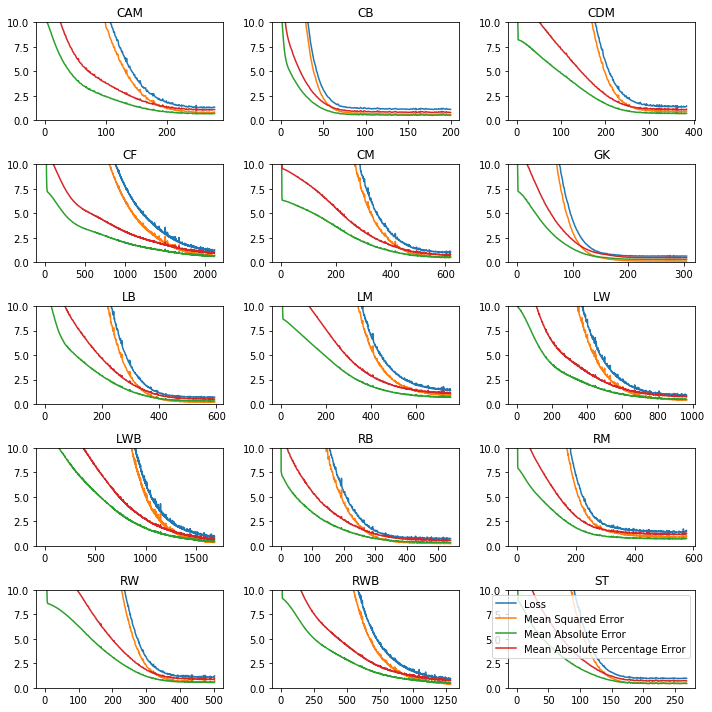

In [58]:
fig = plt.figure(figsize=(10,10))
for i in range(len(unq_positions)):
    ax = plt.subplot(5, 3, i+1)
    ax.plot(histories[i].history['loss'], label='Loss')
    ax.plot(histories[i].history['mean_squared_error'], label='Mean Squared Error')
    ax.plot(histories[i].history['mean_absolute_error'], label='Mean Absolute Error')
    ax.plot(histories[i].history['mean_absolute_percentage_error'], label='Mean Absolute Percentage Error')
    ax.set_ylim([0, 10])
    ax.set_title(unq_positions[i])
plt.ylim(0, 10)
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
predictions_arr = []
for i in range(len(unq_positions)):
    predictions_arr.append(models[i].predict(x=data_arr[i]))

In [60]:
predictions_arr[0].reshape(1, predictions_arr[0].shape[0])[0]

array([77.08231, 84.05088, 66.57405, ..., 58.06907, 66.82016, 62.1391 ],
      dtype=float32)

W0706 16:59:09.091410 22340 legend.py:1282] No handles with labels found to put in legend.


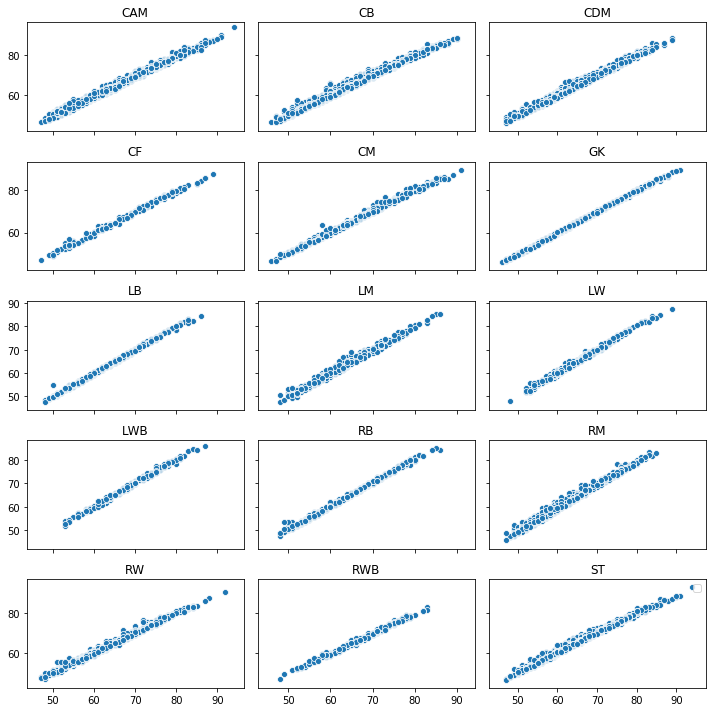

In [62]:
fig, axes = plt.subplots(5, 3, sharex='col', sharey='row', figsize=(10,10))
count = -1
for r in range(5):
    for c in range(3):
        count += 1
        ax = axes[r, c]
        sns.scatterplot(x=y_arr[count], y=predictions_arr[count].reshape(1, predictions_arr[count].shape[0])[0], ax=ax)
        ax.set_title(unq_positions[count])
plt.legend()
plt.tight_layout()
plt.show()

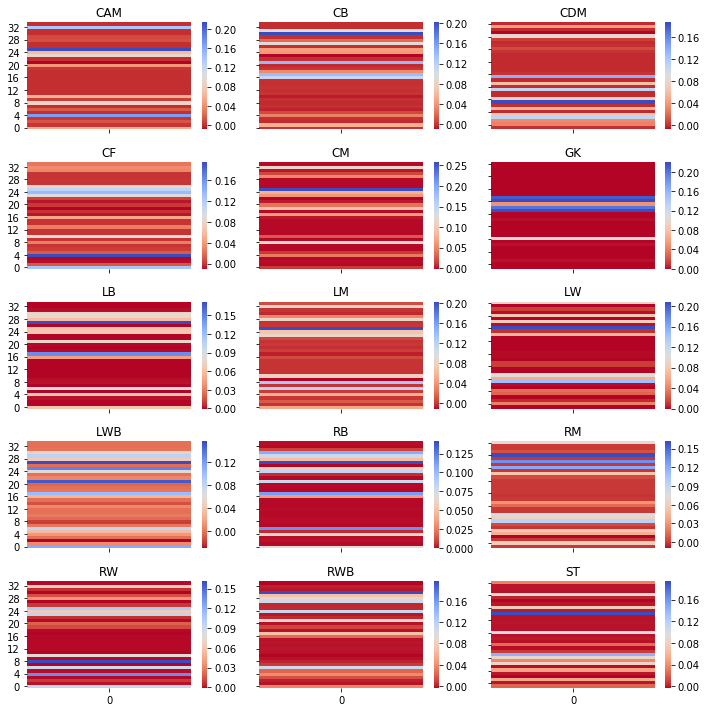

In [63]:
fig, axes = plt.subplots(5, 3, sharex='col', sharey='row', figsize=(10,10))
count = -1
for r in range(5):
    for c in range(3):
        count += 1
        ax = axes[r, c]
        sns.heatmap(data=models[count].get_weights()[0],cmap='coolwarm_r',ax=ax)
        ax.set_title(unq_positions[count])
plt.tight_layout()
plt.show()

In [71]:
cols = player_data.drop(columns=['Overall', 'Best Position', 'Positions']).columns
for i in range(len(models)):
    print (unq_positions[i] + ': ')
    weights = models[i].get_weights()[0]
    weightsum = np.sum(weights)
    for index, col in enumerate(cols):
        weight = weights[index][0]
        if(np.isclose(0, weight)):
            continue
        print ('{}: {:.3f}%'.format(col, (weights[index][0]/weightsum)*100))

CAM: 
Acceleration: 5.847%
Aggression: 0.226%
Agility: 1.431%
Balance: 0.283%
Ball Control: 17.235%
Composure: -0.025%
Crossing: 1.629%
Curve: -0.033%
Dribbling: 9.225%
FK Accuracy: 0.486%
Finishing: 6.244%
GK Diving: -0.011%
GK Handling: -0.028%
GK Kicking: -0.051%
GK Positioning: -0.037%
GK Reflexes: 0.017%
Heading Accuracy: 0.086%
Interceptions: -0.062%
Jumping: 0.016%
Long Passing: 0.257%
Long Shots: 4.512%
Marking: -0.946%
Penalties: 0.011%
Positioning: 9.170%
Reactions: 6.921%
Short Passing: 21.649%
Shot Power: -0.024%
Sliding Tackle: -0.039%
Sprint Speed: 1.088%
Stamina: 0.939%
Standing Tackle: -0.019%
Strength: -0.035%
Vision: 14.076%
Volleys: -0.035%
CB: 
Acceleration: 0.044%
Aggression: 5.487%
Agility: -0.132%
Balance: -0.019%
Ball Control: 3.140%
Composure: 0.853%
Crossing: -0.351%
Curve: -0.023%
Dribbling: -0.146%
FK Accuracy: -0.029%
Finishing: -0.488%
GK Diving: 0.044%
GK Handling: -0.035%
GK Kicking: 0.040%
GK Positioning: 0.022%
GK Reflexes: -0.016%
Heading Accuracy: 11

In [65]:
for i in range(len(models)):
    print (unq_positions[i], end=': ')
    print (np.sum(models[i].get_weights()))

CAM: 0.9918675
CB: 0.9986822
CDM: 1.0067754
CF: 1.0261326
CM: 1.0183275
GK: 1.0155842
LB: 1.0146312
LM: 1.010356
LW: 1.0108395
LWB: 1.0209113
RB: 1.0260956
RM: 0.99962753
RW: 1.0054722
RWB: 1.0081928
ST: 1.0110041


In [66]:
for i in range(len(models)):
    models[i].save_weights('./weights/' + unq_positions[i] + 'model')

In [33]:
cols = player_data.drop(columns=['Overall', 'Best Position', 'Positions']).columns
for i in range(len(data_arr)):
    pd.DataFrame(data_arr[i], columns=cols).to_csv('./databyposition/' + unq_positions[i] + '.csv', index=False)

In [128]:
# search which value gives closest to 100 average
avgsearch = np.linspace(start=0,stop=1,num=100)
best = 1000
bestval = 0
for val in avgsearch:
    avg = 0
    for ind, pos in enumerate(unq_positions):
        weightsum = np.sum(models[ind].get_weights())
        outs = []
        for index, weight in enumerate(np.array(models[ind].get_weights()).flatten()):
            weightweight = (weight/weightsum)*100
            out = weightweight
            if out < val:
                out = 0
            if out != 0:
                out = round(out)
                # print ('{}: {}'.format(cols[index],out))
                outs.append(out)
        avg += sum(outs)
    avg = avg/len(unq_positions)
    if(abs(100-avg) < best):
        best = abs(100-avg)
        bestval = val
print (bestval, best)

0.8282828282828284 0.0


In [124]:
from math import floor, ceil

In [129]:
avg = 0
for ind, pos in enumerate(unq_positions):
    print (pos)
    weightsum = np.sum(models[ind].get_weights())
    outs = []
    for index, weight in enumerate(np.array(models[ind].get_weights()).flatten()):
        weightweight = (weight/weightsum)*100
        out = weightweight
        if out < 0.8282828282828284:
            out = 0
        if out != 0:
            out = round(out)
            print ('{}: {}'.format(cols[index],out))
            outs.append(out)
    print (sum(outs))
    avg += sum(outs)
print (avg/len(unq_positions))

CAM
Acceleration: 6.0
Agility: 1.0
Ball Control: 17.0
Crossing: 2.0
Dribbling: 9.0
Finishing: 6.0
Long Shots: 5.0
Positioning: 9.0
Reactions: 7.0
Short Passing: 22.0
Sprint Speed: 1.0
Stamina: 1.0
Vision: 14.0
100.0
CB
Aggression: 5.0
Ball Control: 3.0
Composure: 1.0
Heading Accuracy: 11.0
Interceptions: 14.0
Jumping: 4.0
Marking: 14.0
Reactions: 4.0
Short Passing: 5.0
Sliding Tackle: 9.0
Sprint Speed: 2.0
Standing Tackle: 20.0
Strength: 10.0
102.0
CDM
Aggression: 4.0
Ball Control: 8.0
Dribbling: 1.0
Interceptions: 14.0
Long Passing: 6.0
Marking: 11.0
Reactions: 8.0
Short Passing: 19.0
Sliding Tackle: 6.0
Stamina: 7.0
Standing Tackle: 11.0
Strength: 3.0
Vision: 3.0
101.0
CF
Acceleration: 13.0
Aggression: 1.0
Ball Control: 19.0
Composure: 1.0
Dribbling: 3.0
Finishing: 9.0
GK Kicking: 3.0
Heading Accuracy: 5.0
Positioning: 9.0
Reactions: 13.0
Short Passing: 11.0
Shot Power: 8.0
Strength: 3.0
Vision: 3.0
Volleys: 2.0
103.0
CM
Acceleration: 1.0
Ball Control: 5.0
Composure: 1.0
Dribbling: 1